In [1]:
import numpy as np
import glob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pyemma
import msmbuilder
from msmbuilder.msm import MarkovStateModel
from msmbuilder.lumping import PCCAPlus

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [96]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm'

In [23]:
dtrajs = np.load('100.npy', encoding='bytes')
dtrajs = list(dtrajs)

In [24]:
len(dtrajs)

5019

In [6]:
its = pyemma.msm.its(dtrajs)

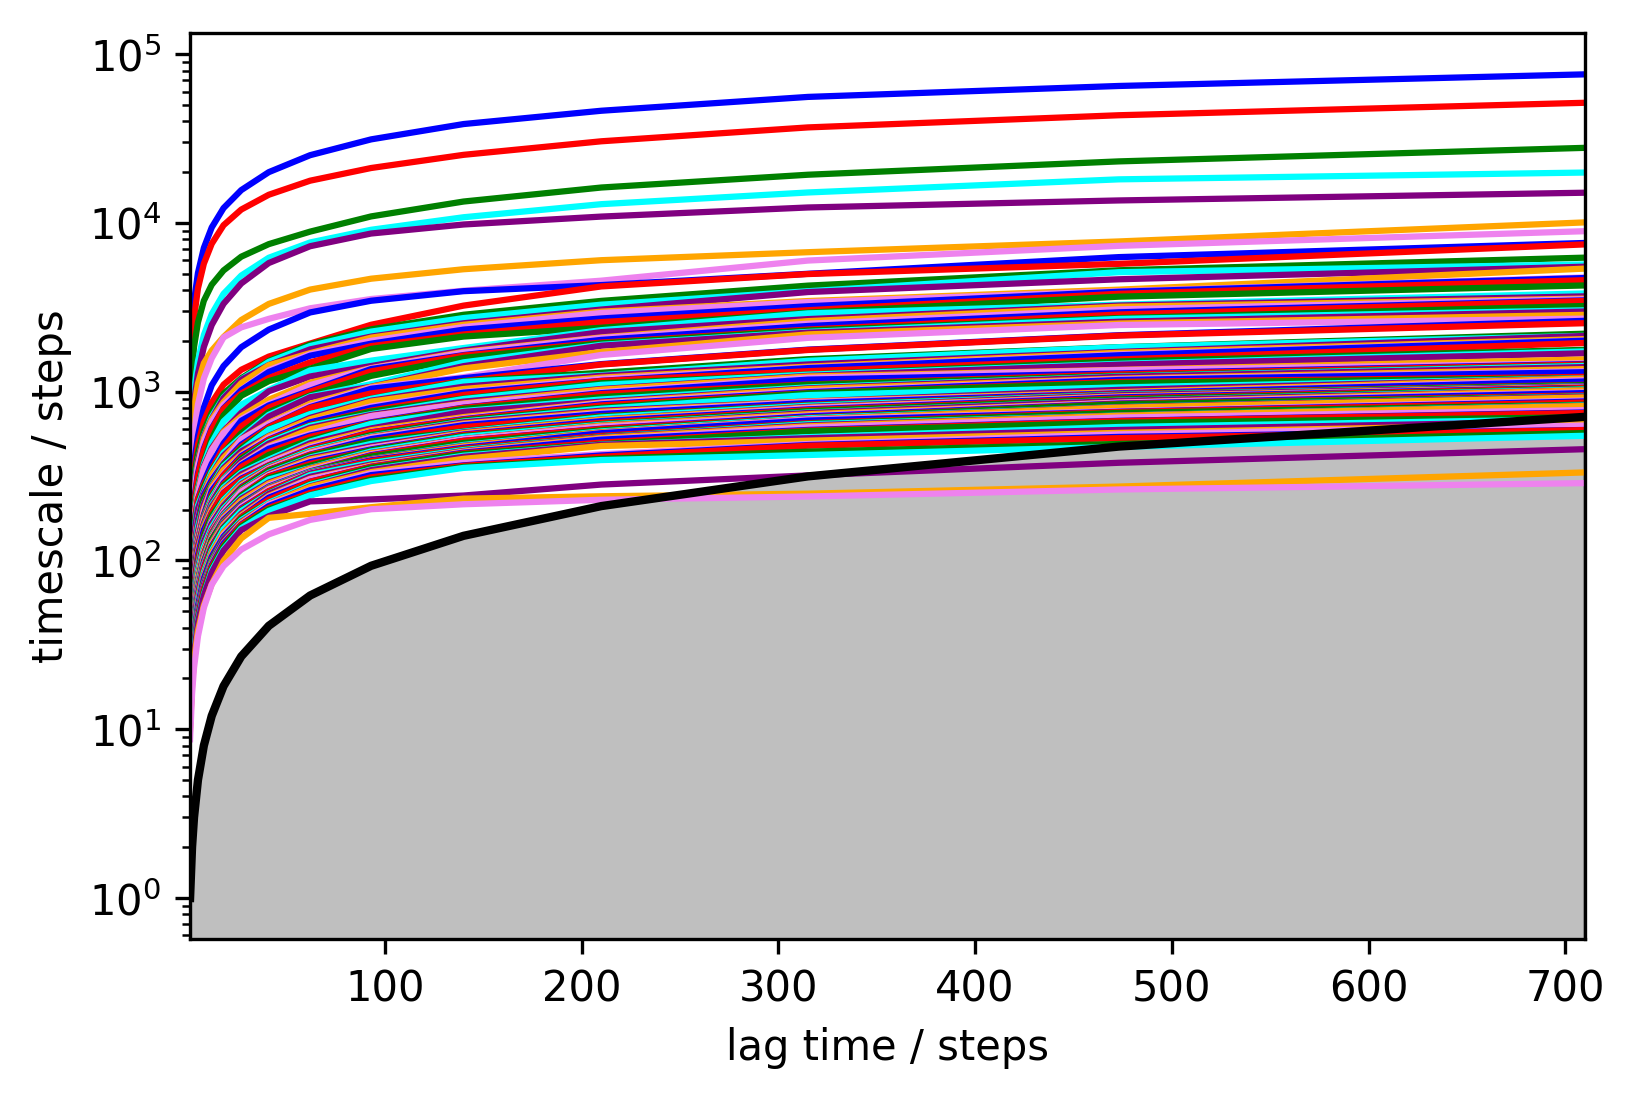

In [17]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)
plt.savefig('dih_100_its_log.png', dpi=300)
plt.show()

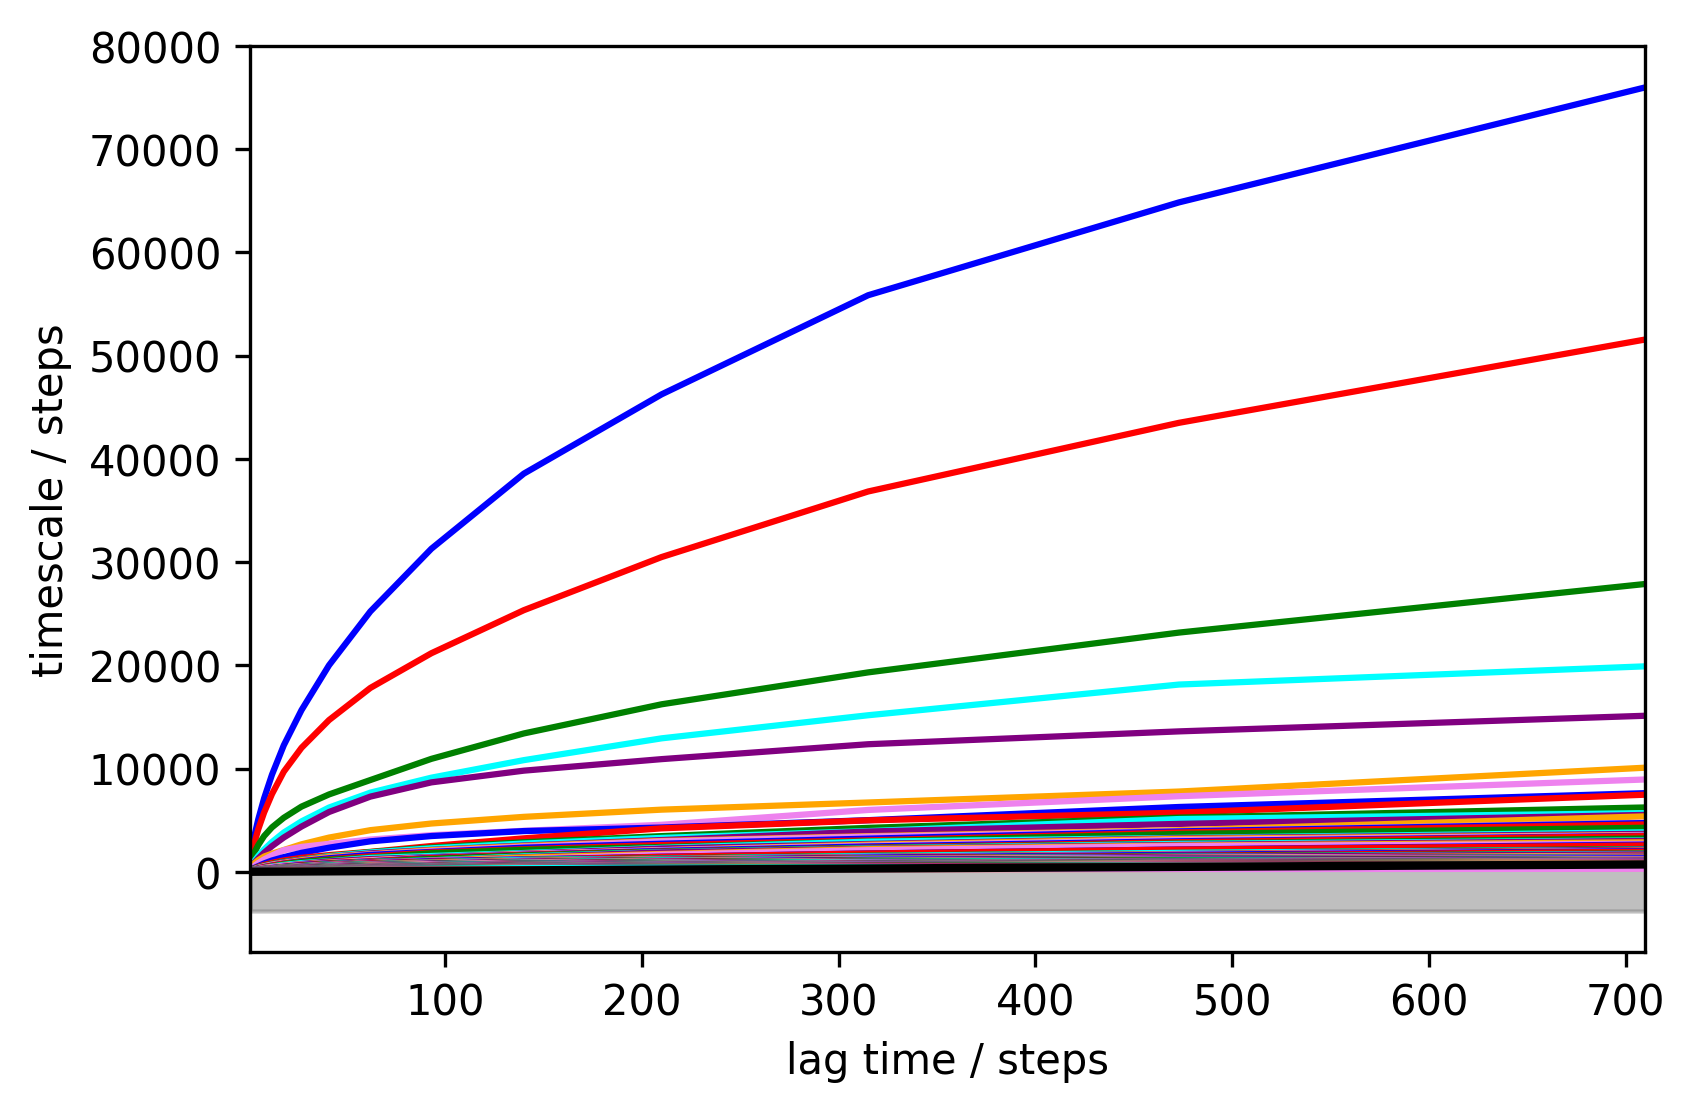

In [18]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=False)
plt.savefig('dih_100_its_lin.png', dpi=300)
plt.show()

In [4]:
msm = MarkovStateModel(lag_time=100)
msm.fit(dtrajs)

MSM contains 2 strongly connected components above weight=0.01. Component 1 selected, with population 99.980130%


MarkovStateModel(ergodic_cutoff='on', lag_time=100, n_timescales=None,
         prior_counts=0, reversible_type='mle', sliding_window=True,
         verbose=True)

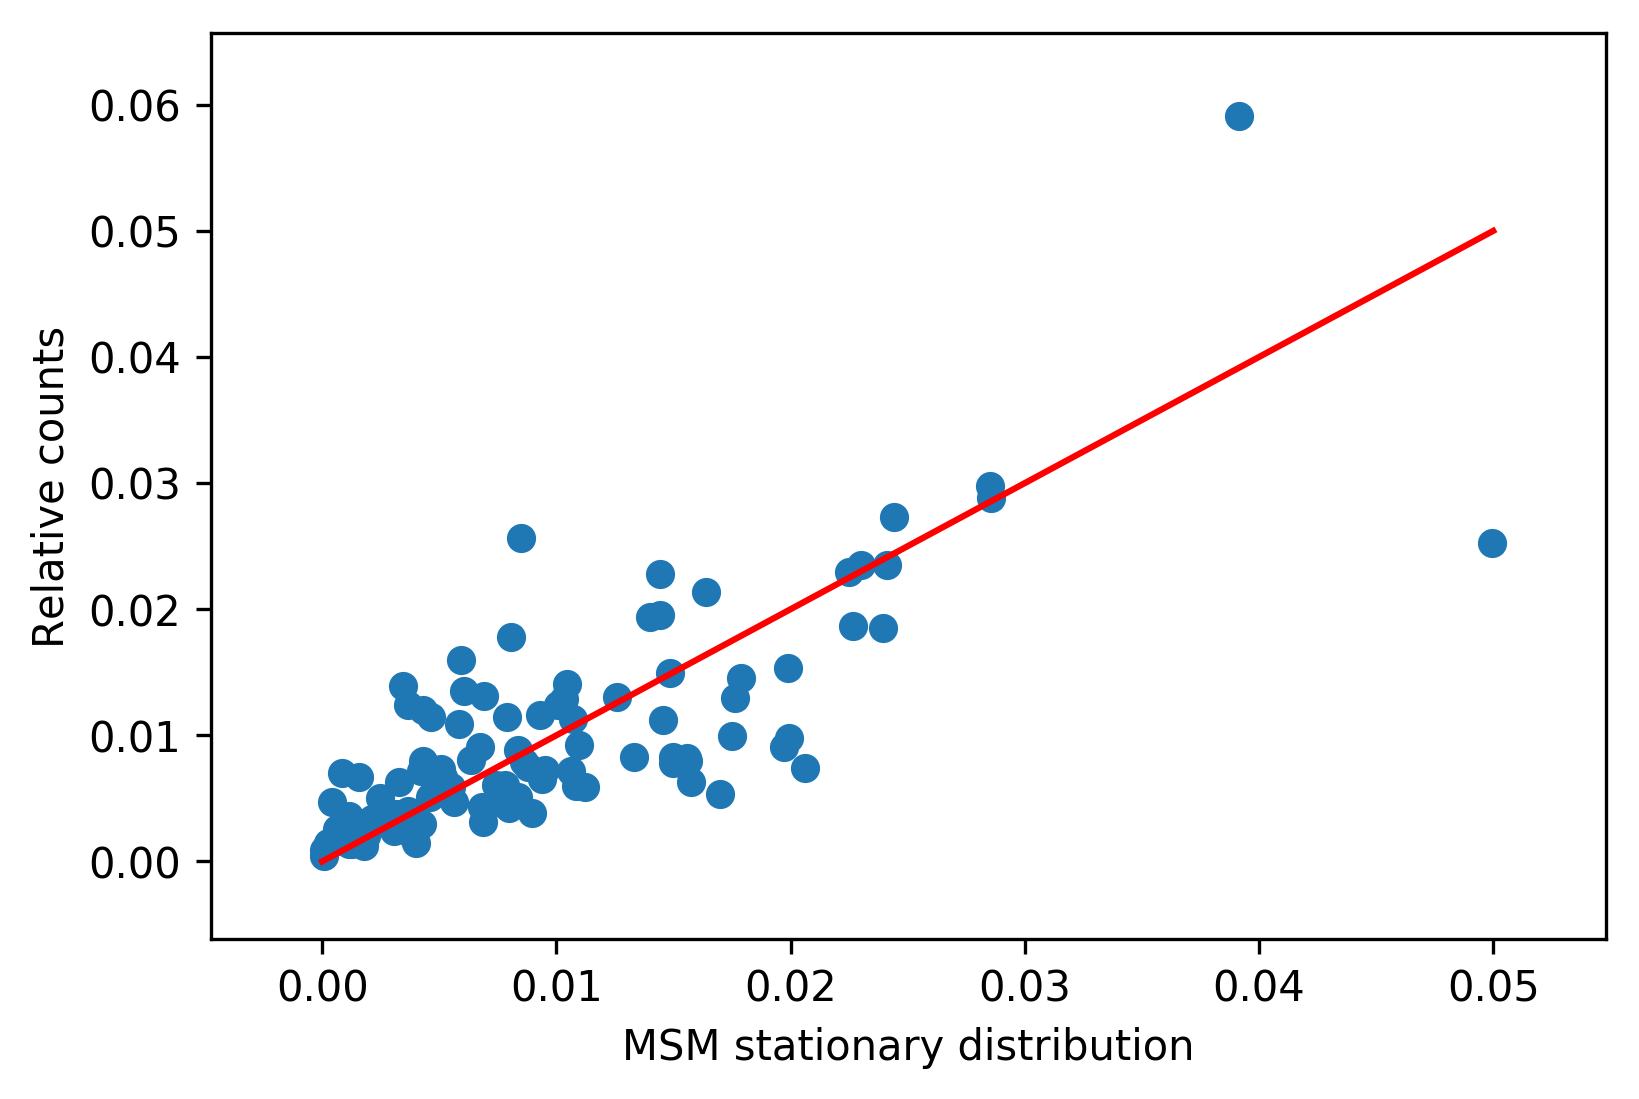

In [54]:
project = 'dih_100'

statdist = msm.populations_
relative_counts = msm.countsmat_.sum(0) / np.sum(msm.countsmat_)

plt.figure(dpi=300)
plt.scatter(statdist, relative_counts)
plt.xlabel('MSM stationary distribution')
plt.ylabel('Relative counts')
plt.plot(np.arange(0, 0.06, 0.01), np.arange(0, 0.06, 0.01), c='red')
plt.savefig('sanity_check_%s.png' %project, dpi=300)
plt.show()

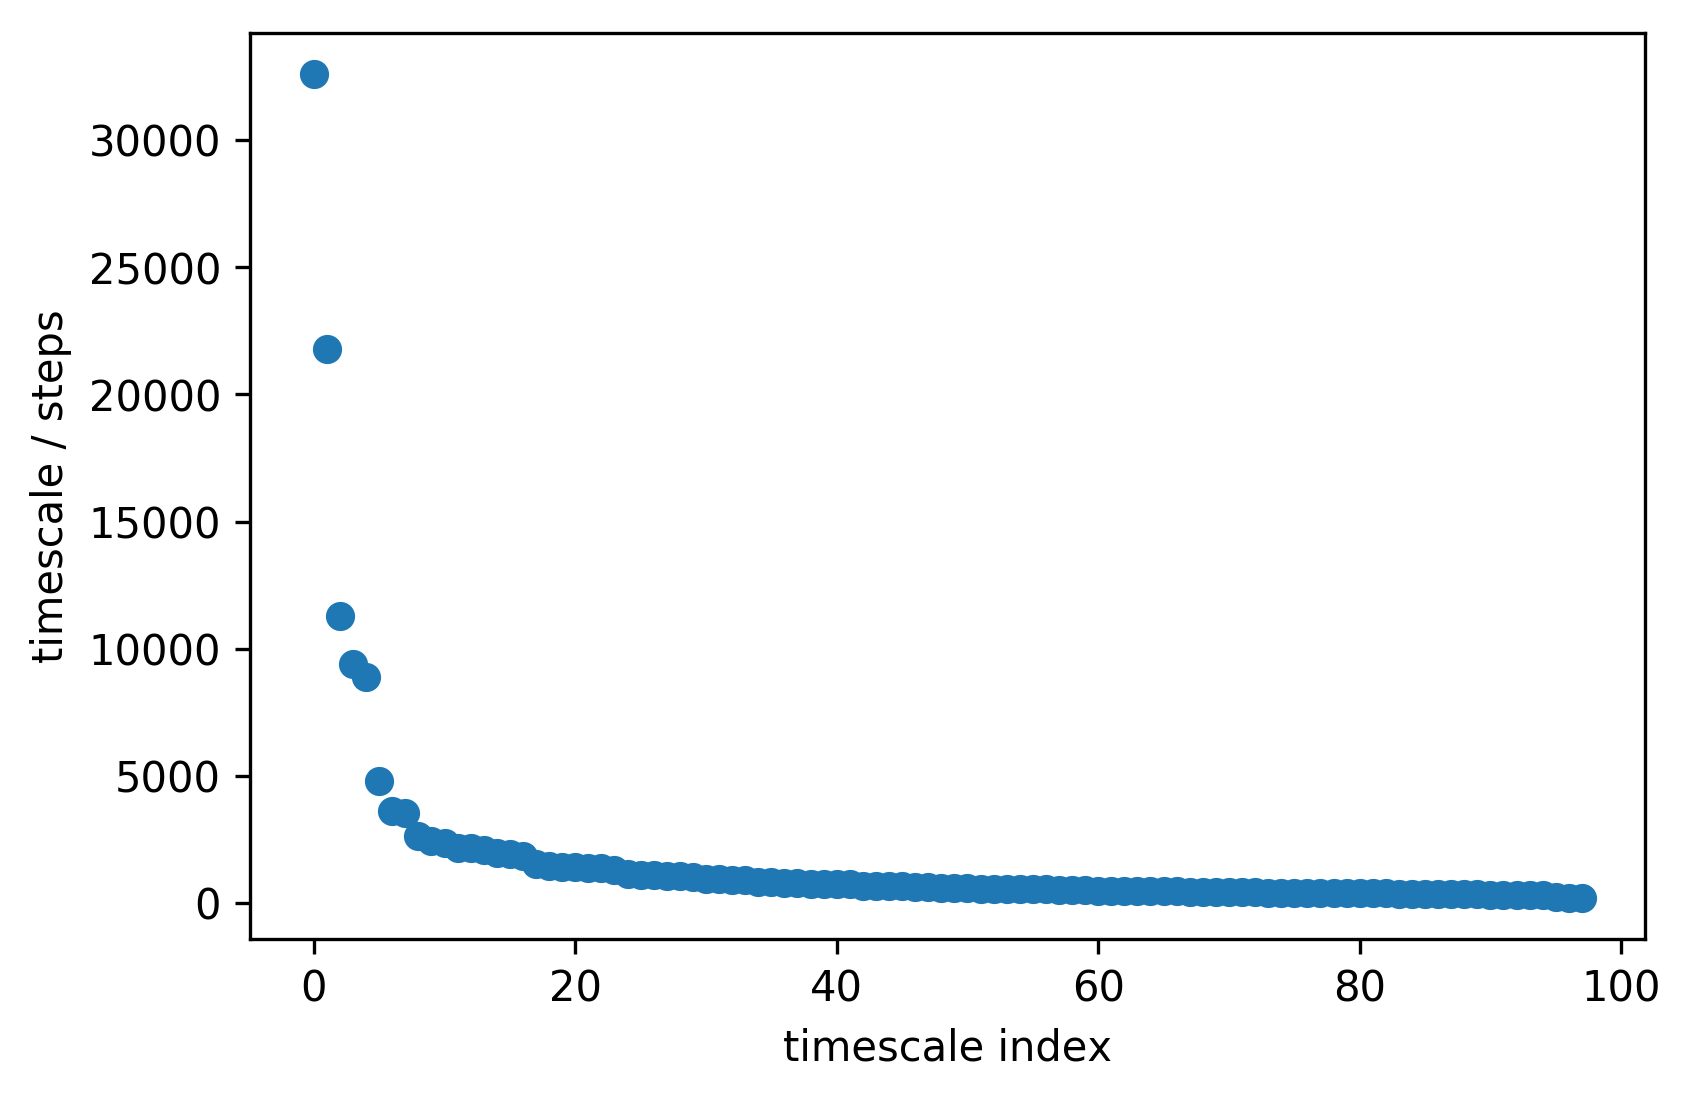

In [45]:
plt.figure(dpi=300)
plt.scatter(range(len(msm.timescales_)), msm.timescales_)
plt.xlabel('timescale index')
plt.ylabel('timescale / steps')
plt.savefig('dih_100_msm_timescales.png', dpi=300)
plt.show()

In [55]:
timescale_gaps = []

for i in range(len(msm.timescales_)-1):
    timescale_gaps.append(msm.timescales_[i] / msm.timescales_[i+1])

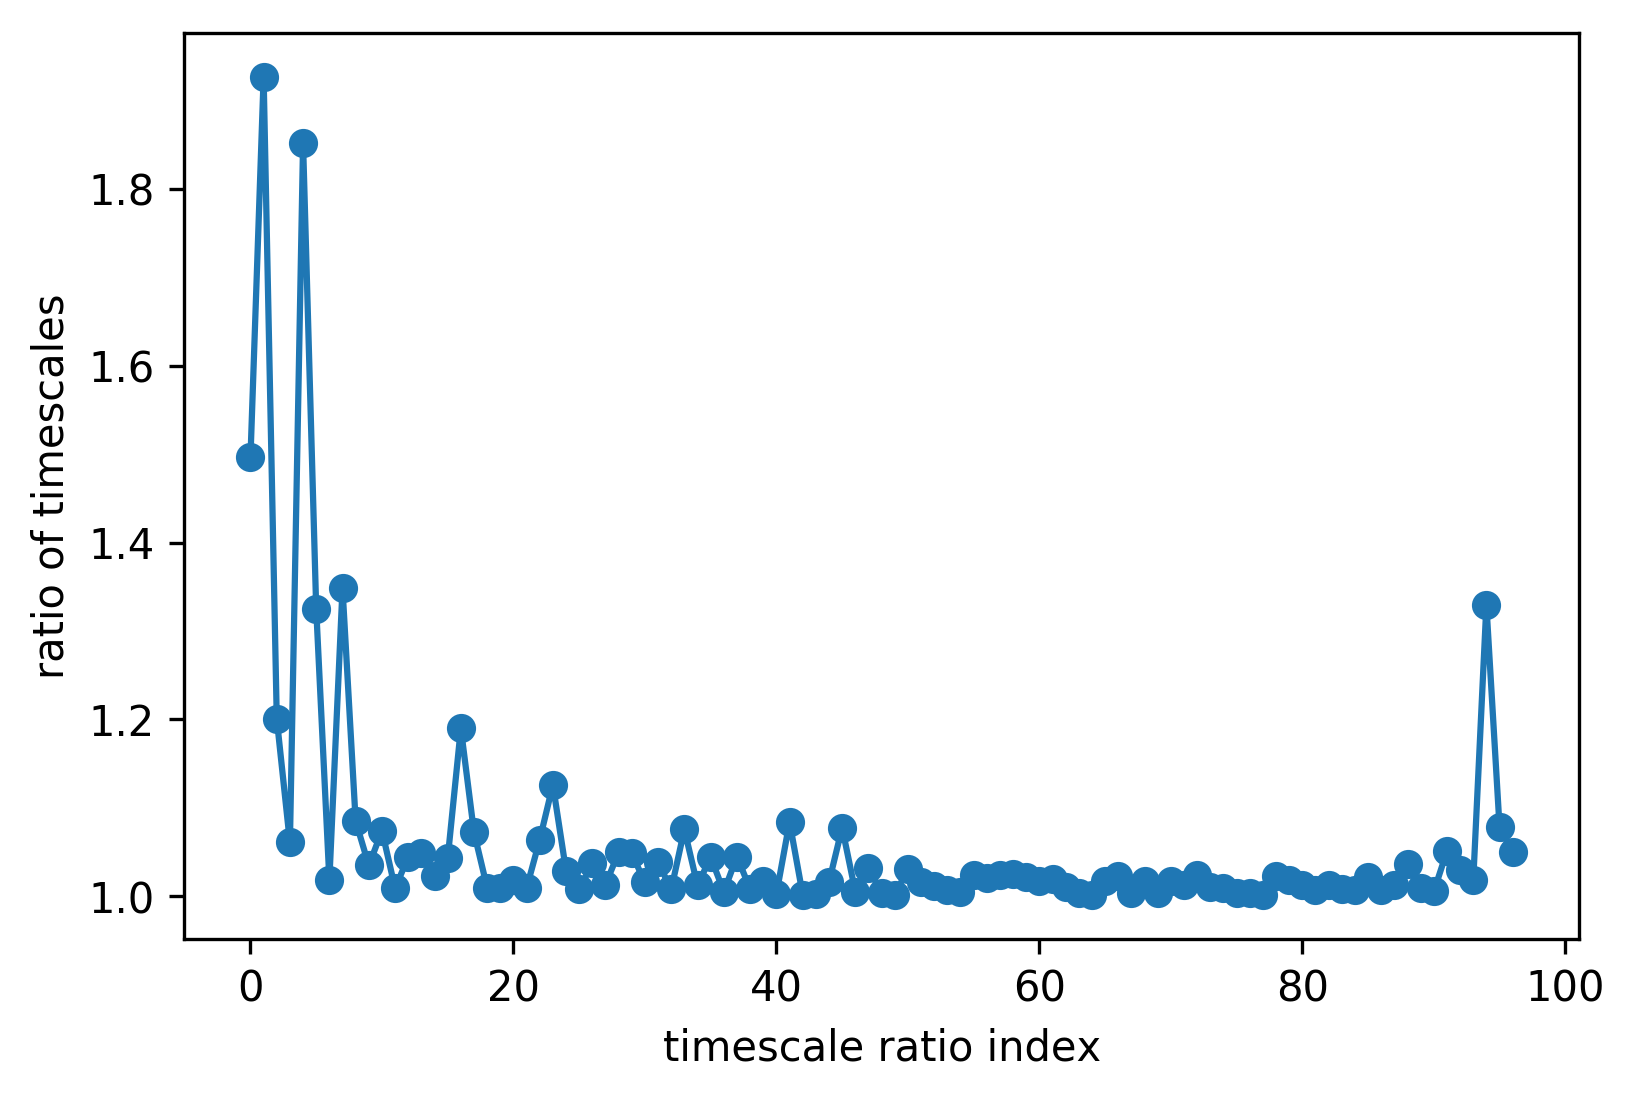

In [67]:
plt.figure(dpi=300)
plt.plot(range(len(timescale_gaps)), timescale_gaps)
plt.scatter(range(len(timescale_gaps)), timescale_gaps)
plt.xlabel('timescale ratio index')
plt.ylabel('ratio of timescales')
plt.savefig('dih_100_msm_timescales_ratios.png', dpi=300)
plt.show()

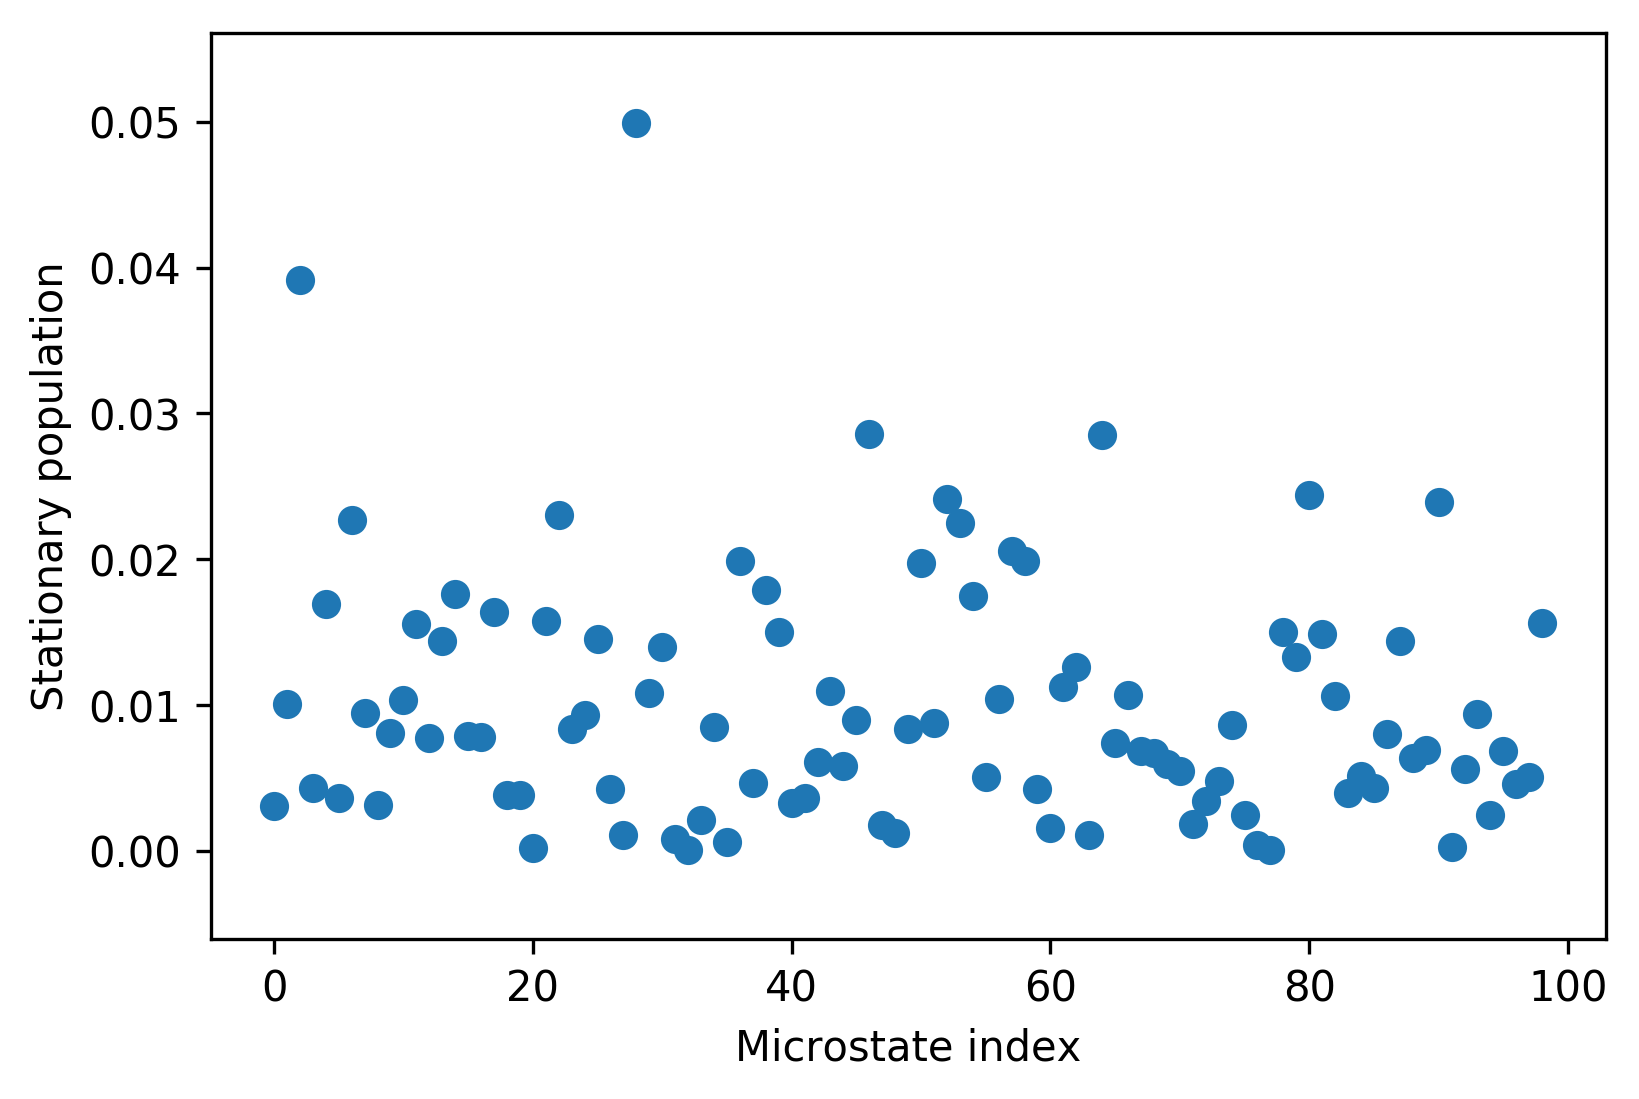

In [25]:
plt.figure(dpi=300)
plt.scatter(range(len(msm.populations_)), msm.populations_)
plt.xlabel('Microstate index')
plt.ylabel('Stationary population')
plt.savefig('dih_100_msm_populations.png', dpi=300)
plt.show()

In [32]:
msm.populations_

array([  3.06675329e-03,   1.00651225e-02,   3.91416717e-02,
         4.32279070e-03,   1.69726644e-02,   3.65533272e-03,
         2.26734388e-02,   9.49910403e-03,   3.17723706e-03,
         8.07786876e-03,   1.03335601e-02,   1.55799032e-02,
         7.78108114e-03,   1.44094981e-02,   1.76121237e-02,
         7.87486256e-03,   7.80897860e-03,   1.63801593e-02,
         3.81683234e-03,   3.87468399e-03,   2.01389906e-04,
         1.57506376e-02,   2.30181586e-02,   8.36399017e-03,
         9.30960164e-03,   1.45332980e-02,   4.26685605e-03,
         1.12931015e-03,   4.99407688e-02,   1.08457872e-02,
         1.40111591e-02,   8.55754163e-04,   9.46819042e-05,
         2.14298120e-03,   8.50756491e-03,   6.23020914e-04,
         1.99051010e-02,   4.66565345e-03,   1.78936719e-02,
         1.49956372e-02,   3.27259362e-03,   3.66040254e-03,
         6.07333302e-03,   1.09805496e-02,   5.84707617e-03,
         8.97499962e-03,   2.85622444e-02,   1.79791563e-03,
         1.25348127e-03,

In [7]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

In [9]:
pyemma_msm.connected_sets

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([69])]

In [10]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm'

In [6]:
pyemma_pcca = pyemma_msm.pcca(6)

In [7]:
pyemma_msm.metastable_sets

[array([ 5, 17, 40, 69, 82]),
 array([ 1, 10, 12, 24, 43, 48, 56, 75, 89]),
 array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
 array([ 4,  6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50,
        51, 54, 55, 59, 61, 63, 67, 77, 78, 79, 80, 85, 86, 88, 93, 96]),
 array([ 2, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 27, 32, 33, 37, 41, 42, 44, 57, 58, 60,
        62, 65, 66, 68, 71, 72, 73, 74, 81, 83, 84, 87, 92, 94, 95, 97])]

In [26]:
# calculate and plot populations of macrostates

In [30]:
macrostate_populations = []

for macrostate in pyemma_msm.metastable_sets:
    population = 0
    for microstate in macrostate:
        population += pyemma_msm.stationary_distribution[microstate]
    macrostate_populations.append(population)    

In [31]:
macrostate_populations

[0.039889952571695253,
 0.069521363851226411,
 0.11336361426700339,
 0.32357427460008709,
 0.20311382559100111,
 0.2505369691189866]

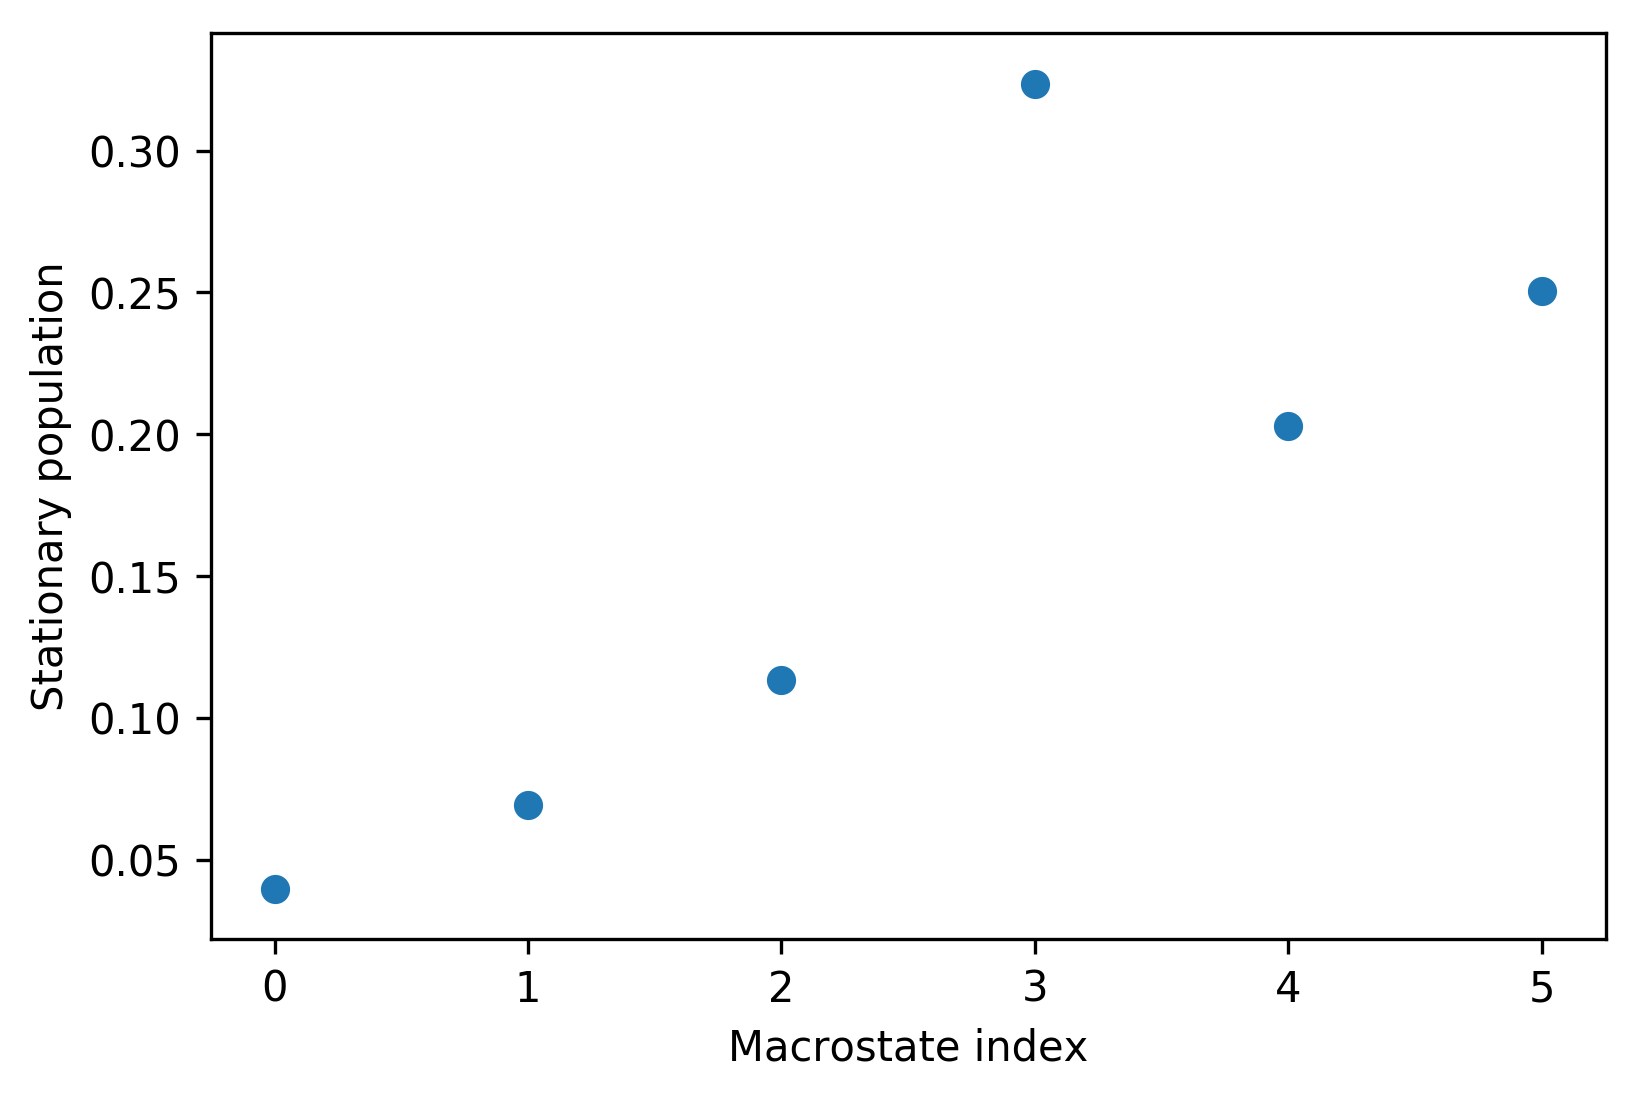

In [33]:
plt.figure(dpi=300)
plt.scatter(range(len(macrostate_populations)), macrostate_populations)
plt.xlabel('Macrostate index')
plt.ylabel('Stationary population')
plt.savefig('dih_100_msm_pcca6_macrostate_populations.png', dpi=300)
plt.show()

In [92]:
# plot the transition matrix

In [97]:
pyemma_msm.transition_matrix.shape

(99, 99)

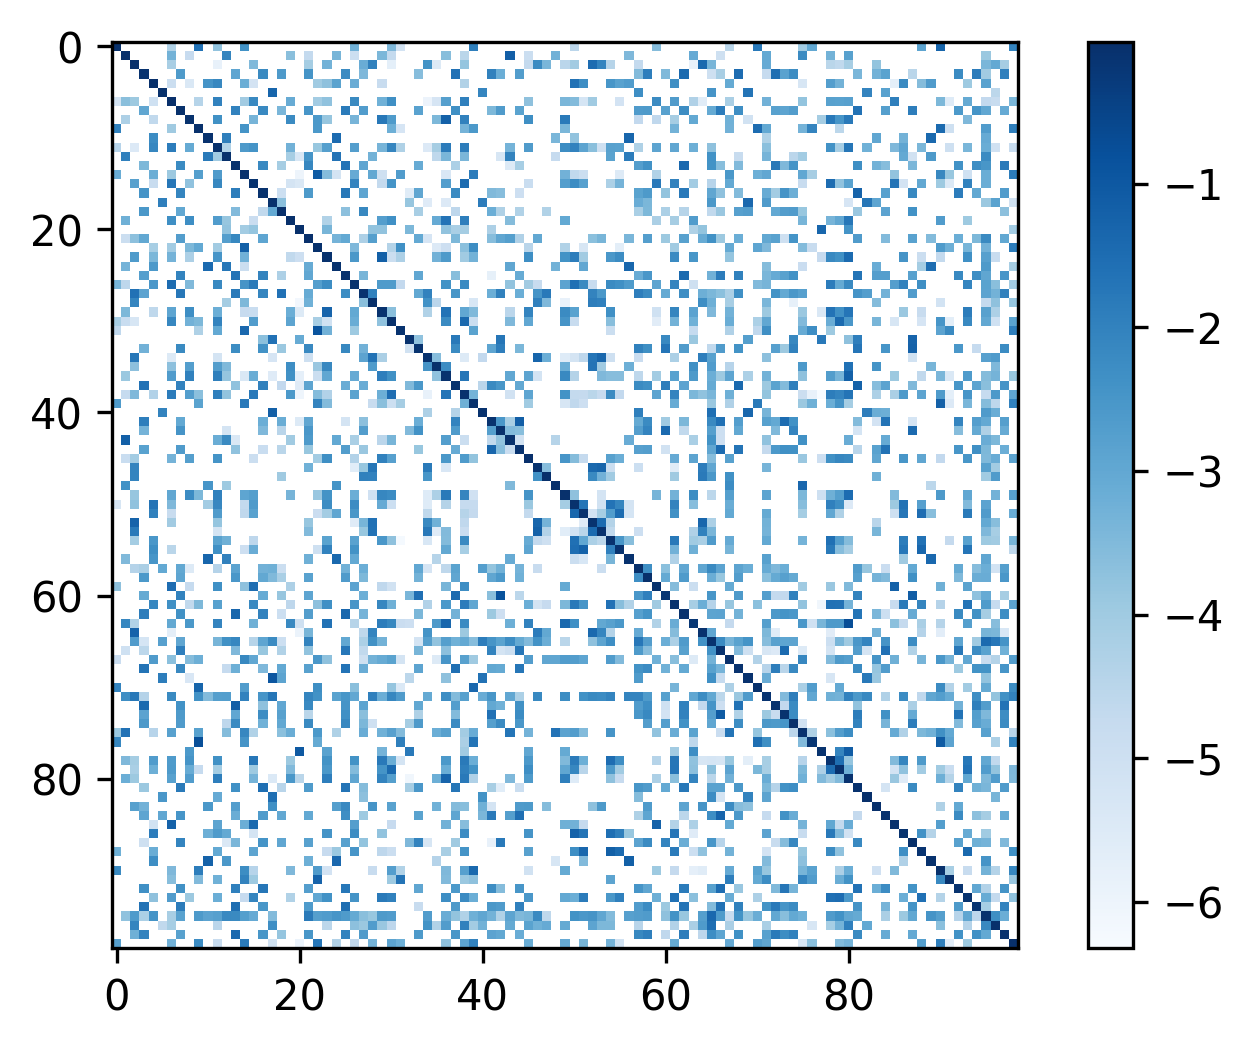

In [96]:
plt.figure(dpi=300)
plt.imshow(np.log10(pyemma_msm.transition_matrix), cmap='Blues')
plt.colorbar()

In [98]:
# now make a new transition matrix - which has the state labels changed so that microstate in one PCCA macrostate are 
# together

In [45]:
tm = np.zeros((99,99))

In [46]:
pyemma_msm.metastable_sets

[array([ 5, 17, 40, 69, 82]),
 array([ 1, 10, 12, 24, 43, 48, 56, 75, 89]),
 array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
 array([ 4,  6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50,
        51, 54, 55, 59, 61, 63, 67, 77, 78, 79, 80, 85, 86, 88, 93, 96]),
 array([ 2, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 27, 32, 33, 37, 41, 42, 44, 57, 58, 60,
        62, 65, 66, 68, 71, 72, 73, 74, 81, 83, 84, 87, 92, 94, 95, 97])]

In [47]:
new_old_dict = dict()

i = 0
for macrostate in pyemma_msm.metastable_sets:
    for microstate in macrostate:
        new_old_dict[i] = microstate
        i += 1

In [48]:
for i in range(99):
    for j in range(99):
        tm[i,j] = pyemma_msm.transition_matrix[new_old_dict[i], new_old_dict[j]]

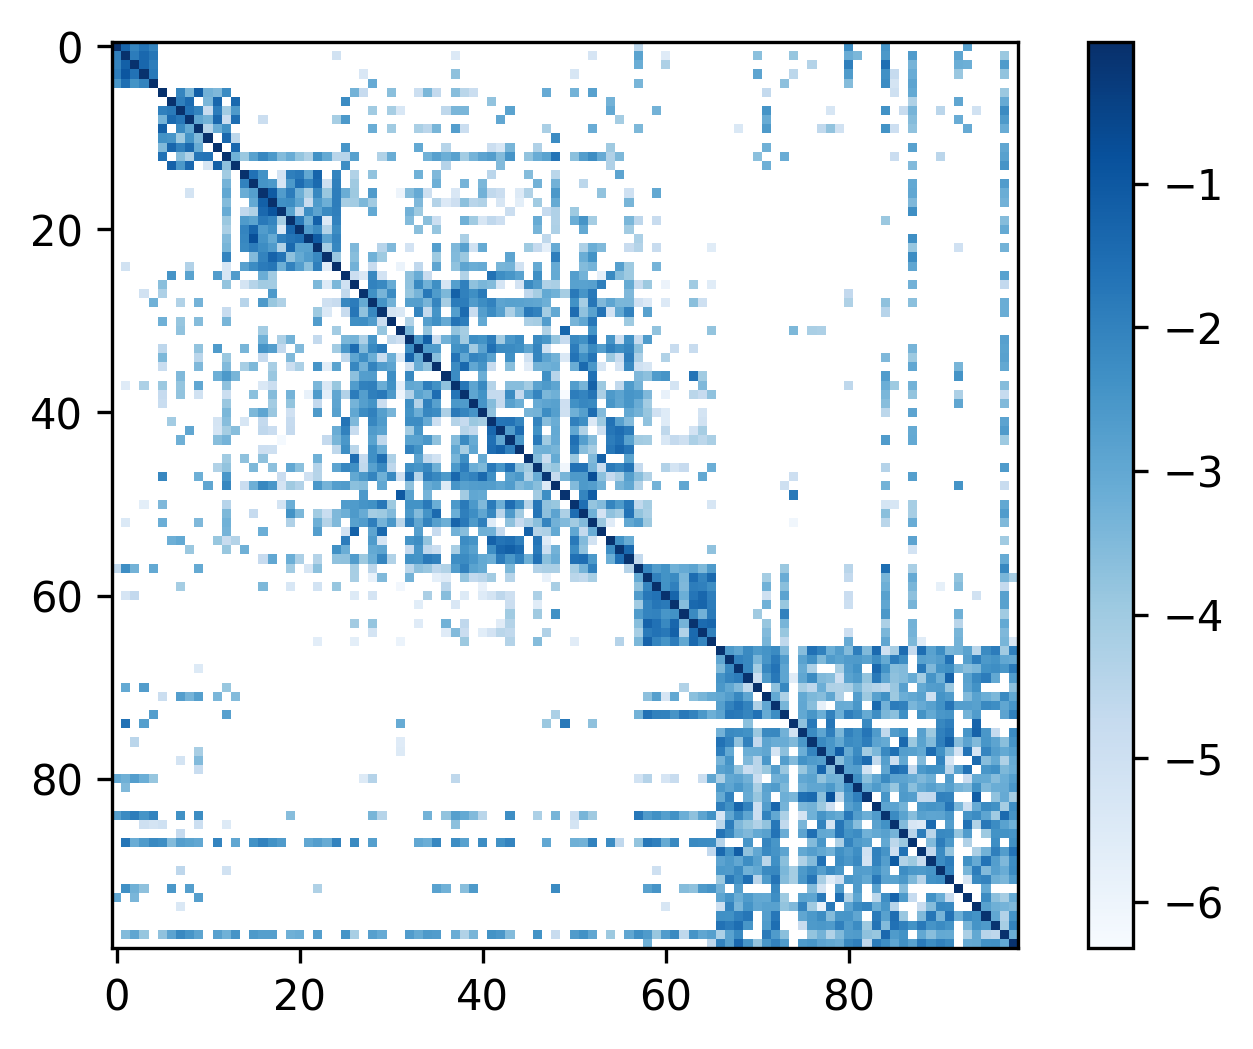

In [50]:
plt.figure(dpi=300)
plt.imshow(np.log10(tm), cmap='Blues')
plt.colorbar()
plt.savefig('dih_100_transmat_reshuffled_by_pcca6.png', dpi=300)
plt.show()

In [ ]:
# ck test

In [56]:
ck_test = pyemma_msm.cktest(6, mlags=None)

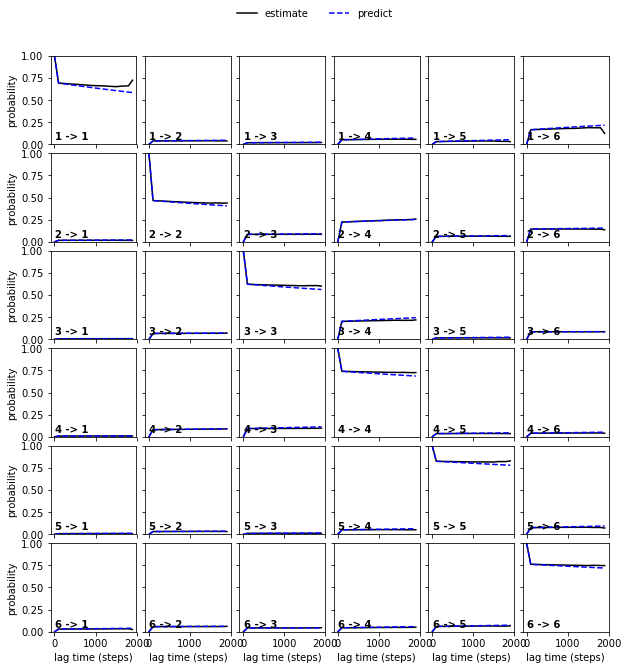

In [59]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(ck_test)
plt.savefig('dih_100_cktest.png', dpi=300)
plt.show()

In [62]:
# now do everything bayesian (implied timescales and ck test)

In [70]:
#its = pyemma.msm.its(dtrajs, errors='bayes', nsamples=2)

In [71]:
#plt.figure(dpi=300)
#pyemma.plots.plot_implied_timescales(its)
#plt.savefig('dih_100_its_log_bayes.png', dpi=300)
#plt.show()

In [72]:
#plt.figure(dpi=300)
#pyemma.plots.plot_implied_timescales(its, ylog=False)
#plt.savefig('dih_100_its_lin_bayes.png', dpi=300)
#plt.show()

In [76]:
#pyemma_msm_bayes = pyemma.msm.estimate_markov_model(dtrajs, lag=100, count_mode='effective')

In [77]:
#ck_test_bayes = pyemma_msm_bayes.cktest(6, mlags=None)

In [78]:
#plt.figure(dpi=300)
#pyemma.plots.plot_cktest(ck_test_bayes)
#plt.savefig('dih_100_cktest_bayes.png', dpi=300)
#plt.show()

In [63]:
##############################
# 1) plot cluster centers on TICA landscapes
# 2) 1) + color cluster centers by macrostate
# 3) show MSM populations - pyemma.plots.scatter_contour?

In [4]:
import glob
import numpy as np
#import msmexplorer
import itertools

In [8]:
tica_trajs = glob.glob('../tica/10_tics_trajs/*.npy')

In [9]:
tica_proj = []

for traj in tica_trajs:
    tica_proj.append(np.load(traj))
    
tica_proj_concat = np.concatenate(tica_proj)    

In [10]:
tica_proj_concat.shape

(9862657, 10)

In [11]:
cluster_centers = np.load('cluster_centers/100.npy')

In [90]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=[1/len(tica_proj_concat[:,i])]*len(tica_proj_concat[:,i]))
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    for center in cluster_centers:
        plt.scatter(center[i], center[j], marker='.', c='red')
    plt.savefig('landscapes_hist/tics_hist_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [91]:
# color by macrostate

In [12]:
set(range(100)) - set(pyemma_msm.active_set)

{69}

In [13]:
cluster_centers_ = cluster_centers[pyemma_msm.active_set]

In [94]:
cluster_centers_.shape

(99, 467)

In [51]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=[1/len(tica_proj_concat[:,i])]*len(tica_proj_concat[:,i]))
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('gist_rainbow', 6))
    plt.colorbar()
    plt.savefig('landscapes_hist_by_macrostate/tics_hist_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [144]:
# to show MSM populations - try msmexplorer plotting, passing the pi parameter

In [150]:
# 1) load TICA trajectories in the same order as dtrajs are (have glob used in kmeans from HAL)
# 2) state 69 is not in active set - we're gonna make a new populations array, with 0 for 69

In [151]:
#kmeans_glob = np.load('../kmeans_glob.npy')

In [154]:
#kmeans_glob_trajs = [x.split('/')[1] for x in kmeans_glob]

In [156]:
#tica_trajs = ['../tica/10_tics_trajs/' + x for x in kmeans_glob_trajs]

In [158]:
#tica_proj = []

#for traj in tica_trajs:
#    tica_proj.append(np.load(traj))
    
#tica_proj_concat = np.concatenate(tica_proj)    

In [166]:
#microstate_populations = list(pyemma_msm.stationary_distribution[:69]) + [0] + list(pyemma_msm.stationary_distribution[69:])

In [15]:
#microstate_populations[69]

In [16]:
#len(microstate_populations)

In [17]:
#pi_0 = np.array(microstate_populations)[np.concatenate(dtrajs, axis=0)]

In [18]:
#pi_0.shape

In [192]:
#i=0
#j=1

#plot_data = msmexplorer.plot_free_energy(tica_proj_concat[::10], obs=(i,j), cbar=True, return_data=True, pi=pi_0[::10])
#plt.close()

#fig = plt.figure(dpi=300)
#ax = fig.add_subplot(1,1,1)
#ax.grid(False)
#ax.set_xlabel('tIC0')
#ax.set_ylabel('tIC1')
#vmin = -1E-12
#vmax = np.percentile(plot_data[1][2], 50)
#n_levels = 20
#alpha = 0.5
#im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
#                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
#                             zorder=1, vmin=vmin, vmax=vmax)
#cbar = plt.colorbar(im)
#cbar.ax.set_ylabel('Free energy (kcal/mol)')

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
#plt.show()

In [193]:
# didn't work - let's try PyEMMA

In [19]:
#cluster_centers_.shape

In [20]:
#pyemma_msm.stationary_distribution.shape

In [200]:
#plt.figure(dpi=300)
#pyemma.plots.scatter_contour(cluster_centers_[:,0], cluster_centers_[:,1], pyemma_msm.stationary_distribution)
#plt.show()

In [ ]:
# also not great - let's just plot the cluster centers on the landscapes, colored by population
# then the same colored by population of macrostate

In [24]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=[1/len(tica_proj_concat[:,i])]*len(tica_proj_concat[:,i]))
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.stationary_distribution, cmap='Reds')
    plt.colorbar()
    plt.savefig('landscapes_hist_by_population/tics_hist_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [34]:
# now by macrostate

In [35]:
macrostate_populations

[0.039889952571695253,
 0.069521363851226411,
 0.11336361426700339,
 0.32357427460008709,
 0.20311382559100111,
 0.2505369691189866]

In [40]:
macrostate_populations_ = []

for microstate in range(len(pyemma_msm.stationary_distribution)):
    macrostate_populations_.append(macrostate_populations[pyemma_msm.metastable_assignments[microstate]])

In [42]:
len(macrostate_populations_)

99

In [43]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=[1/len(tica_proj_concat[:,i])]*len(tica_proj_concat[:,i]))
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()
    plt.savefig('landscapes_hist_by_macrostate_population/tics_hist_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [ ]:
# ok those last ones (colored by macrostate population) I'm happy with!!

In [68]:
# now do all these plots but on the 'free energy' landscapes - 
# we're gonna change the label from free energy to '-ln(sampling ratio) * kT`
# and we're gonna save the results for easier re-plotting

In [70]:
import msmexplorer

In [81]:
#combinations = itertools.combinations(range(10),2)
combinations = list(itertools.combinations(range(10),2))[15:]
for i,j in combinations:
    
    plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True)
    np.save('landscapes_plot_data/tics_%d_%d.npy' % (i,j), plot_data)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('-ln(sampling ratio) * kT (kcal/mol)')
    
    for center in cluster_centers:
        plt.scatter(center[i], center[j], marker='.', c='red')

    plt.savefig('landscapes/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('-ln(sampling ratio) * kT (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('gist_rainbow', 6))
    plt.colorbar()
    
    plt.savefig('landscapes_by_macrostate/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('-ln(sampling ratio) * kT (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.stationary_distribution, cmap='Reds')
    plt.colorbar()
    
    plt.savefig('landscapes_by_population/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('-ln(sampling ratio) * kT (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()
    
    plt.savefig('landscapes_by_macrostate_population/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [82]:
# also made pcca7 and pcca9 but overwrote another copy of this notebook with this one and that code was lost...

In [83]:
# do pcca7 and pcca9 again - histograms and free energy landscapes

In [84]:
# ok so succedded in making corrected histograms in dih_100_2, let's make all plots on those corrected histograms 
# then pcca7 and pcca9 on the corrected histograms and on the uncorrected free energy landscapes

In [85]:
# pcca6,7,9 - corrected histograms

In [8]:
kmeans_glob = np.load('../kmeans_glob.npy')
kmeans_glob_trajs = [x.split('/')[1] for x in kmeans_glob]
tica_trajs = ['../tica/10_tics_trajs/' + x for x in kmeans_glob_trajs]

tica_proj = []

for traj in tica_trajs:
    tica_proj.append(np.load(traj))
    
tica_proj_concat = np.concatenate(tica_proj)    

microstate_populations = list(pyemma_msm.stationary_distribution[:69]) + [0] + list(pyemma_msm.stationary_distribution[69:])

microstate_counts = dict()

for i in range(100):
    microstate_counts[i] = 0
    
for dtraj in dtrajs:
    for frame in dtraj:
        microstate_counts[frame] += 1
        
frame_in_states_populations = []

for i in range(100):
    frame_in_states_populations.append(microstate_counts[i])
    
frame_in_states_weights = [1/x for x in frame_in_states_populations]
                           
pi_0 = (np.array(microstate_populations)*np.array(frame_in_states_weights))[np.concatenate(dtrajs, axis=0)]
                           
np.sum(pi_0)                           

0.99999999999999978

In [ ]:
# pccax independent

In [6]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

cluster_centers = np.load('cluster_centers/100.npy')
cluster_centers_ = cluster_centers[pyemma_msm.active_set]

In [9]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.savefig('landscapes_hist_corrected/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    for center in cluster_centers:
        plt.scatter(center[i], center[j], marker='.', c='red')
    plt.savefig('landscapes_hist_corrected_microstates/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.stationary_distribution, cmap='Reds')
    plt.colorbar()
    plt.savefig('landscapes_hist_corrected_by_population/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [93]:
# pcca6

In [10]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
pyemma_pcca = pyemma_msm.pcca(6)

macrostate_populations = []

for macrostate in pyemma_msm.metastable_sets:
    population = 0
    for microstate in macrostate:
        population += pyemma_msm.stationary_distribution[microstate]
    macrostate_populations.append(population)    
    
macrostate_populations_ = []

for microstate in range(len(pyemma_msm.stationary_distribution)):
    macrostate_populations_.append(macrostate_populations[pyemma_msm.metastable_assignments[microstate]])

In [11]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('gist_rainbow', 6))
    plt.colorbar()
    plt.savefig('pcca6/landscapes_hist_corrected_by_macrostate/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()
    plt.savefig('pcca6/landscapes_hist_corrected_by_macrostate_population/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [88]:
# pcca 7

In [12]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
pyemma_pcca = pyemma_msm.pcca(7)

macrostate_populations = []

for macrostate in pyemma_msm.metastable_sets:
    population = 0
    for microstate in macrostate:
        population += pyemma_msm.stationary_distribution[microstate]
    macrostate_populations.append(population)    
    
macrostate_populations_ = []

for microstate in range(len(pyemma_msm.stationary_distribution)):
    macrostate_populations_.append(macrostate_populations[pyemma_msm.metastable_assignments[microstate]])

In [11]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
pyemma_pcca = pyemma_msm.pcca(7)

In [12]:
pyemma_pcca.metastable_sets

[array([ 1, 43, 48, 75]),
 array([10, 12, 24, 56, 89]),
 array([ 5, 17, 40, 69, 82]),
 array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
 array([ 4,  6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50,
        51, 54, 55, 59, 61, 63, 67, 77, 78, 79, 80, 85, 86, 88, 93, 96]),
 array([ 2, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 27, 32, 33, 37, 41, 42, 44, 57, 58, 60,
        62, 65, 66, 68, 71, 72, 73, 74, 81, 83, 84, 87, 92, 94, 95, 97])]

In [13]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('Set1', 7))
    plt.colorbar()
    plt.savefig('pcca7/landscapes_hist_corrected_by_macrostate/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()
    plt.savefig('pcca7/landscapes_hist_corrected_by_macrostate_population/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [ ]:
# pcca 9

In [14]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
pyemma_pcca = pyemma_msm.pcca(9)

macrostate_populations = []

for macrostate in pyemma_msm.metastable_sets:
    population = 0
    for microstate in macrostate:
        population += pyemma_msm.stationary_distribution[microstate]
    macrostate_populations.append(population)    
    
macrostate_populations_ = []

for microstate in range(len(pyemma_msm.stationary_distribution)):
    macrostate_populations_.append(macrostate_populations[pyemma_msm.metastable_assignments[microstate]])

In [15]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('Set1', 9))
    plt.colorbar()
    plt.savefig('pcca9/landscapes_hist_corrected_by_macrostate/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()
    plt.savefig('pcca9/landscapes_hist_corrected_by_macrostate_population/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [24]:
# ok next thing will be making corrected free energy landscapes
# and get data points closest to centroids of clusters

In [47]:
# try corrected free energy landscapes again - discovered problem with YOU GOTTA SPECIFY N_SAMPLES!!!
# this should work now - IT DOES

In [27]:
import msmexplorer

In [50]:
dtrajs = np.load('100.npy', encoding='bytes')
dtrajs = list(dtrajs)

In [51]:
kmeans_glob = np.load('../kmeans_glob.npy')
kmeans_glob_trajs = [x.split('/')[1] for x in kmeans_glob]
tica_trajs = ['../tica/10_tics_trajs/' + x for x in kmeans_glob_trajs]

tica_proj = []

for traj in tica_trajs:
    tica_proj.append(np.load(traj))
    
tica_proj_concat = np.concatenate(tica_proj)    

In [53]:
microstate_populations = list(pyemma_msm.stationary_distribution[:69]) + [0] + list(pyemma_msm.stationary_distribution[69:])
              
pi_0 = np.array(microstate_populations)[np.concatenate(dtrajs, axis=0)]                         

In [1]:
i=0
j=1

plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, pi=pi_0, n_samples=100000)
plt.close()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC0')
ax.set_ylabel('tIC1')
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Free energy (kcal/mol)')

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
plt.show()

NameError: name 'msmexplorer' is not defined

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


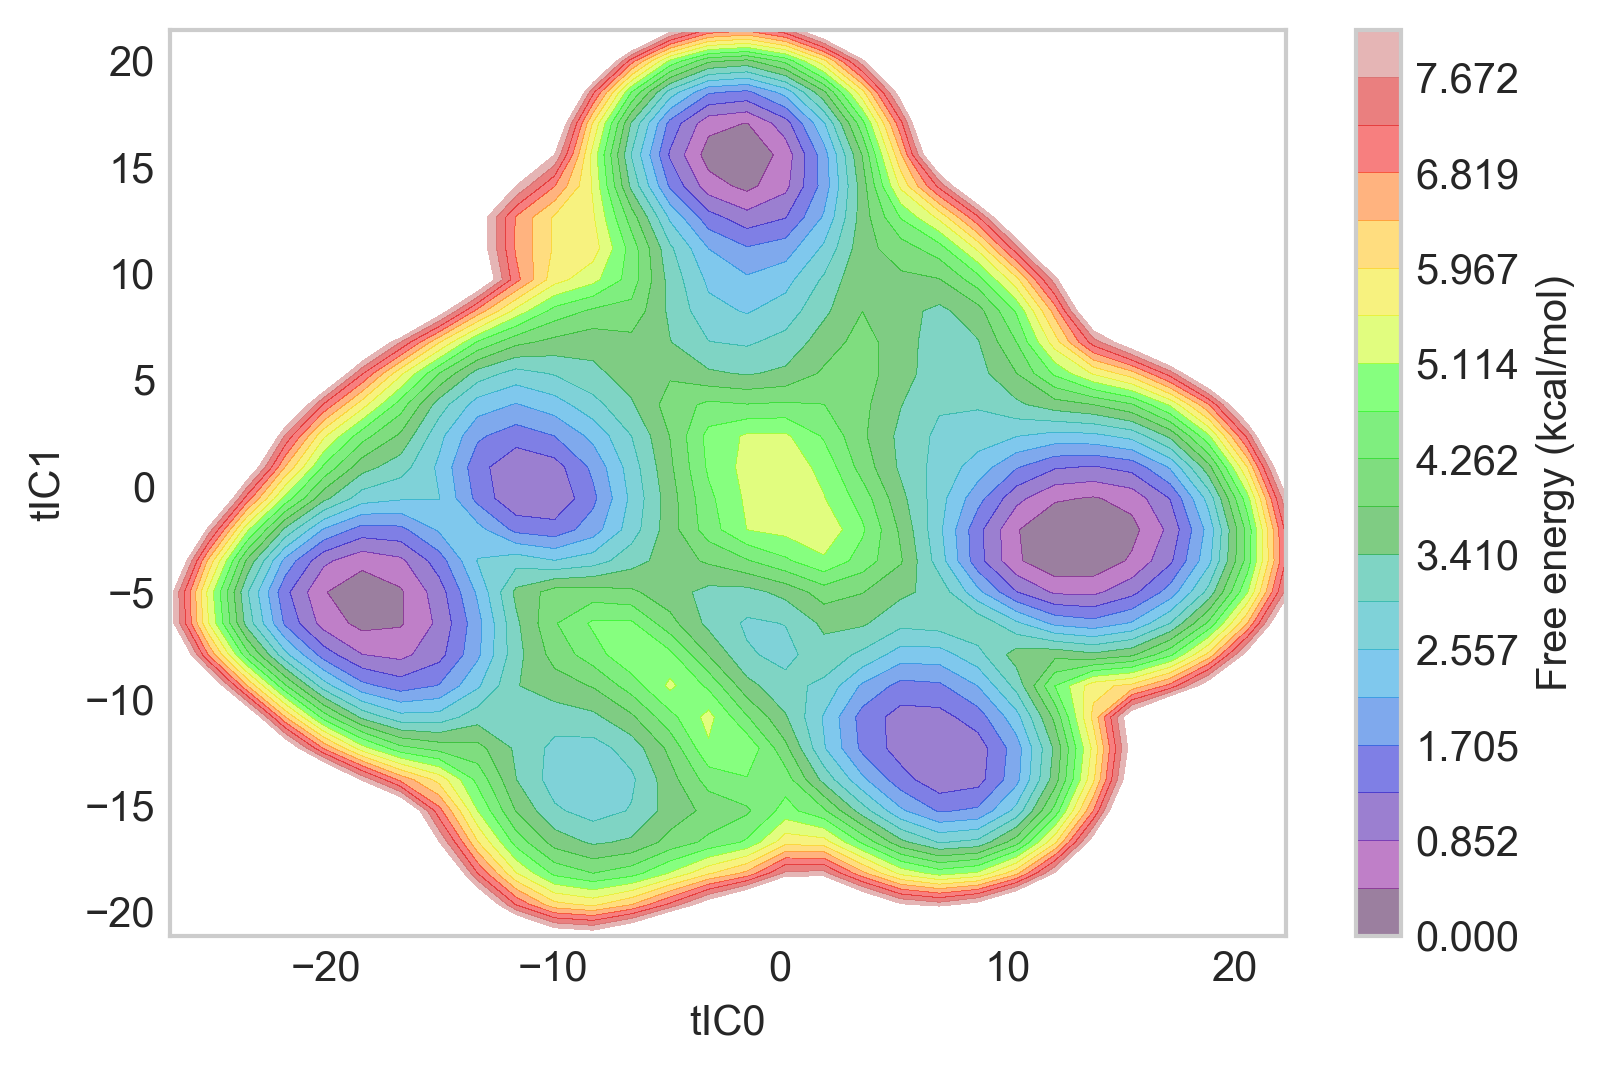

In [59]:
i=0
j=1

plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, n_samples=1000000)
plt.close()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC0')
ax.set_ylabel('tIC1')
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Free energy (kcal/mol)')

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
plt.show()

In [67]:
# ok this is it!!!
# Let's make all pcca-independent plots, then pcca-dependent stuff - all the same as I did for corrected histograms

In [72]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

cluster_centers = np.load('cluster_centers/100.npy')
cluster_centers_ = cluster_centers[pyemma_msm.active_set]

microstate_populations = list(pyemma_msm.stationary_distribution[:69]) + [0] + list(pyemma_msm.stationary_distribution[69:])
              
pi_0 = np.array(microstate_populations)[np.concatenate(dtrajs, axis=0)]

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


KeyboardInterrupt: 

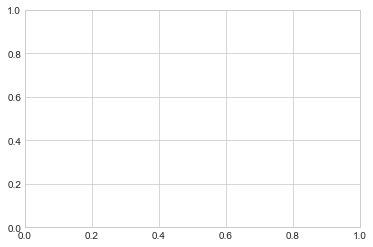

In [82]:
combinations = itertools.combinations(range(10),2)

for i,j in combinations:
    
    plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, pi=pi_0, n_samples=1000000)
    np.save('landscapes_plot_data/tics_%d_%d.npy' % (i,j), plot_data[1])
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')

    plt.savefig('landscapes/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    for center in cluster_centers:
        plt.scatter(center[i], center[j], marker='.', c='red')

    plt.savefig('landscapes_microstates/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.stationary_distribution, cmap='Reds')
    plt.colorbar()
    
    plt.savefig('landscapes_microstate_populations/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [69]:
# pcca 6

In [74]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
pyemma_pcca = pyemma_msm.pcca(6)

macrostate_populations = []

for macrostate in pyemma_msm.metastable_sets:
    population = 0
    for microstate in macrostate:
        population += pyemma_msm.stationary_distribution[microstate]
    macrostate_populations.append(population)    
    
macrostate_populations_ = []

for microstate in range(len(pyemma_msm.stationary_distribution)):
    macrostate_populations_.append(macrostate_populations[pyemma_msm.metastable_assignments[microstate]])

In [75]:
combinations = itertools.combinations(range(10),2)

for i,j in combinations:
    
    plot_data = np.load('landscapes_plot_data/tics_%d_%d.npy' % (i,j))
    plot_data = [[], plot_data]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('gist_rainbow', 6))
    plt.colorbar()

    plt.savefig('pcca6/landscapes_macrostates/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()

    plt.savefig('pcca6/landscapes_macrostate_populations/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [76]:
# pcca 7

In [77]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
pyemma_pcca = pyemma_msm.pcca(7)

macrostate_populations = []

for macrostate in pyemma_msm.metastable_sets:
    population = 0
    for microstate in macrostate:
        population += pyemma_msm.stationary_distribution[microstate]
    macrostate_populations.append(population)    
    
macrostate_populations_ = []

for microstate in range(len(pyemma_msm.stationary_distribution)):
    macrostate_populations_.append(macrostate_populations[pyemma_msm.metastable_assignments[microstate]])

In [78]:
combinations = itertools.combinations(range(10),2)

for i,j in combinations:
    
    plot_data = np.load('landscapes_plot_data/tics_%d_%d.npy' % (i,j))
    plot_data = [[], plot_data]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('Set1', 7))
    plt.colorbar()

    plt.savefig('pcca7/landscapes_macrostates/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()

    plt.savefig('pcca7/landscapes_macrostate_populations/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [79]:
# pcca 9

In [80]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
pyemma_pcca = pyemma_msm.pcca(9)

macrostate_populations = []

for macrostate in pyemma_msm.metastable_sets:
    population = 0
    for microstate in macrostate:
        population += pyemma_msm.stationary_distribution[microstate]
    macrostate_populations.append(population)    
    
macrostate_populations_ = []

for microstate in range(len(pyemma_msm.stationary_distribution)):
    macrostate_populations_.append(macrostate_populations[pyemma_msm.metastable_assignments[microstate]])

In [81]:
combinations = itertools.combinations(range(10),2)

for i,j in combinations:
    
    plot_data = np.load('landscapes_plot_data/tics_%d_%d.npy' % (i,j))
    plot_data = [[], plot_data]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('Set1', 9))
    plt.colorbar()

    plt.savefig('pcca9/landscapes_macrostates/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()

    plt.savefig('pcca9/landscapes_macrostate_populations/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [83]:
#### now finding top 10 frames closest to all cluster centers

In [84]:
# that's calculating on HAL, meanwhile let's make plots of each cluster on the landscapes

In [ ]:
# test on cluster 0

In [93]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

#cluster_centers = np.load('cluster_centers/100.npy')
#cluster_centers_ = cluster_centers[pyemma_msm.active_set]

# change to only cluster 0
#microstate_populations = list(pyemma_msm.stationary_distribution[:69]) + [0] + list(pyemma_msm.stationary_distribution[69:])
microstate_populations = [1] + 99 * [0]
pi_0 = np.array(microstate_populations)[np.concatenate(dtrajs, axis=0)]
pi_0 = pi_0 / np.sum(pi_0)

In [99]:
import os

In [100]:
for i in range(100):
    os.mkdir('landscapes_cluster_centers/%d' % i)

In [109]:
for k in range(len(cluster_centers)):
    
    center = cluster_centers[k]
    
    combinations = itertools.combinations(range(10),2)

    for i,j in combinations:
    
        # first do full landscape
        plot_data = np.load('landscapes_plot_data/tics_%d_%d.npy' % (i,j))
        plot_data = [[], plot_data]
    
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.grid(False)
        ax.set_xlabel('tIC%d' % i)
        ax.set_ylabel('tIC%d' % j)
        vmin = -1E-12
        vmax = np.percentile(plot_data[1][2], 50)
        n_levels = 20
        alpha = 0.5
        im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
        cbar = plt.colorbar(im)
        cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
        #xlim = ax.get_xlim()
        #ylim = ax.get_ylim()
    
        plt.scatter(center[i], center[j], marker='o', c='red')

        plt.savefig('landscapes_cluster_centers/%d/tics_%d_%d.png' % (k,i,j), dpi=300)
        #print('Saved in landscapes_cluster_centers/%d/tics_%d_%d.png' % (k,i,j))
        plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [ ]:
# then just the part of the cluster - with the same axis limits as 
#plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, pi=pi_0, n_samples=10000)
#plt.close()
    
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.grid(False)
#ax.set_xlabel('tIC%d' % i)
#ax.set_ylabel('tIC%d' % j)
#vmin = -1E-12
#vmax = np.percentile(plot_data[1][2], 50)
#n_levels = 20
#alpha = 0.5
#im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
#                         levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
#                         zorder=1, vmin=vmin, vmax=vmax)
#cbar = plt.colorbar(im)
#cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

#plt.savefig('landscapes_cluster_centers/tics_%d_%d.png' % (i,j), dpi=300)
#plt.close()

In [110]:
# alright we have the distances to cluster center now in cluster_distances_min - let's get the file names and frame 
# indices for top 10 frames for the 100 cluster centers

In [2]:
kmeans_glob = np.load('../kmeans_glob.npy')
kmeans_glob_trajs = [x.split('/')[1] for x in kmeans_glob]
cluster_dist_trajs = ['cluster_distances_min/' + x for x in kmeans_glob_trajs]

In [3]:
cluster_distances_min = []

for traj in cluster_dist_trajs:
    cluster_distances_min.append(np.load(traj))

In [7]:
# let's visualize the distributions

In [8]:
cluster_distances_min

[array([ 19.67052269,  18.98250771,  18.4078846 , ...,  22.85580826,
         21.93441772,  21.28808975], dtype=float32),
 array([ 17.77711105,  16.78998375,  17.08008957, ...,  29.99145126,
         30.15631104,  29.33325386], dtype=float32),
 array([ 19.2768383 ,  19.42701721,  19.0600071 , ...,  25.3266449 ,
         25.58471298,  26.05877304], dtype=float32),
 array([ 31.93382645,  30.38286018,  29.13700485, ...,  27.08919907,
         26.99537086,  26.93967056], dtype=float32),
 array([ 20.01595879,  20.41380119,  19.3870182 , ...,  23.53120804,
         23.72776031,  23.68943596], dtype=float32),
 array([ 25.72227097,  22.43468094,  22.36334991, ...,  33.40187836,
         31.93305397,  31.07544327], dtype=float32),
 array([ 28.44052124,  32.63614655,  29.08003998, ...,  21.55653763,
         21.88589859,  22.2246685 ], dtype=float32),
 array([ 18.49010086,  17.95101738,  17.96241379, ...,  29.76428413,
         28.58917236,  29.63100052], dtype=float32),
 array([ 19.55881119,  2

In [12]:
import seaborn as sns
sns.set_style('ticks')

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


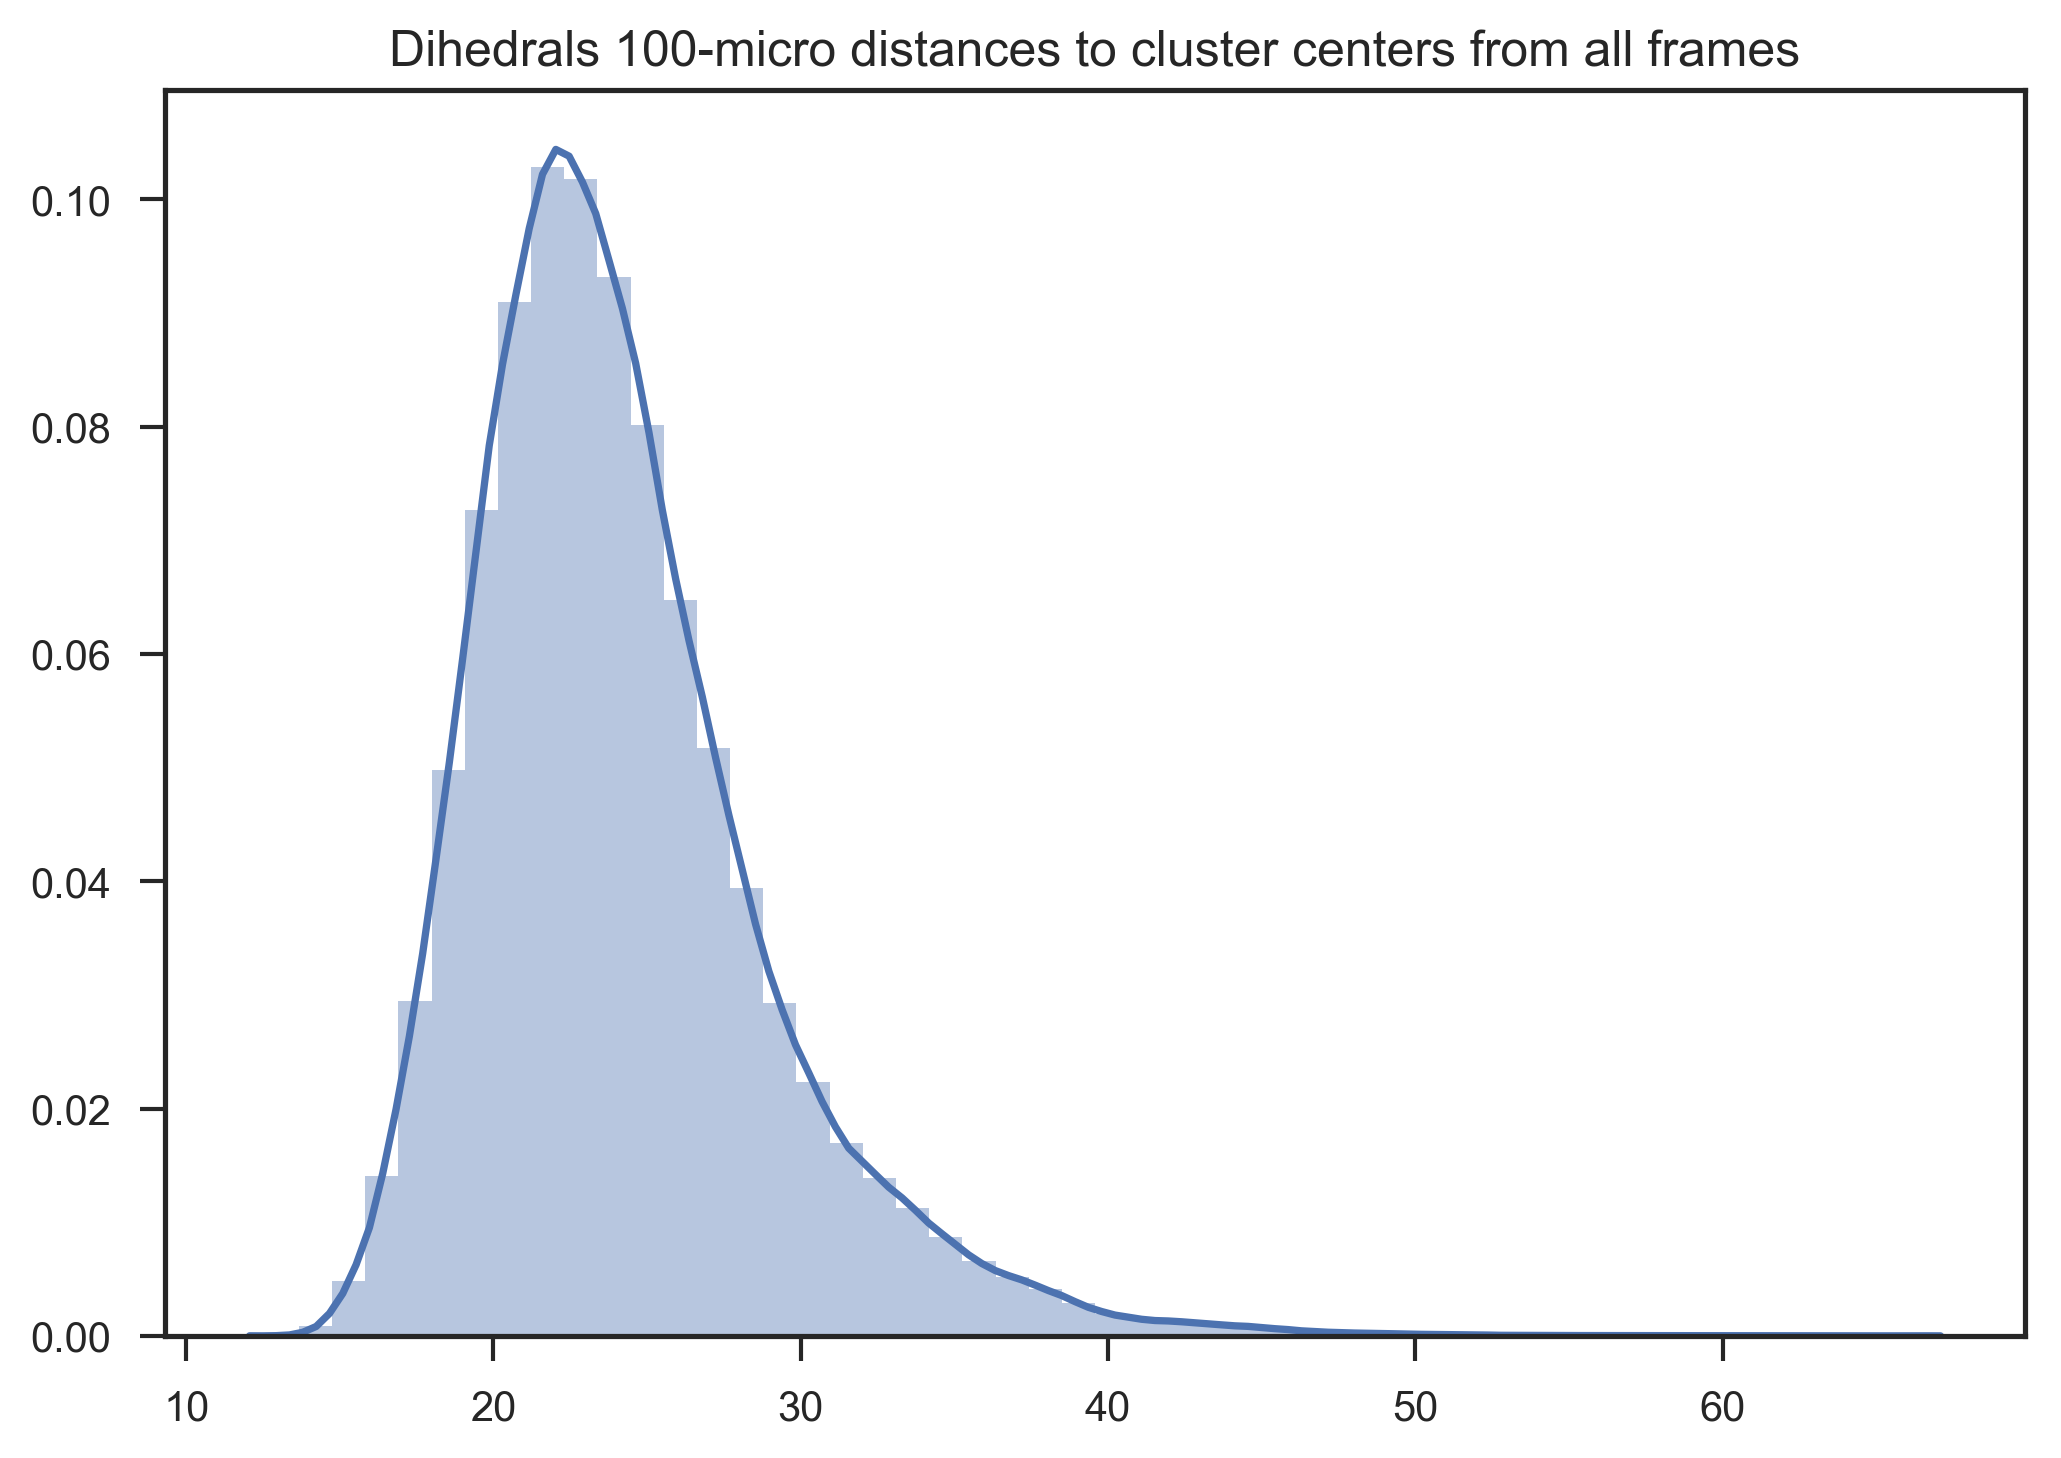

In [20]:
plt.figure(dpi=300)
sns.distplot(np.concatenate(cluster_distances_min))
plt.title('Dihedrals 100-micro distances to cluster centers from all frames')
plt.show()

In [21]:
# ok so now we have dtrajs which give microstate labels and cluster_distances_min which give distances to those, 
# so now for every cluster center let's make a dict of (traj, frame) and distances

In [25]:
cluster_distances_dicts = []

for i in range(100):
    cluster_distances_dicts.append(dict())
    for j in range(len(dtrajs)):
        dtraj = dtrajs[j]
        dtraj_ = (dtraj == i)
        for k in range(len(dtraj_)):
            microstate = dtraj_[k]
            if microstate == True:
                cluster_distances_dicts[-1][(j,k)] = cluster_distances_min[j][k]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [26]:
# now get top 10's

In [27]:
cluster_distances_dicts[0]

{(3457, 930): 28.788155,
 (70, 1225): 23.19232,
 (643, 931): 26.871454,
 (1821, 606): 29.752123,
 (2586, 1856): 25.023386,
 (2794, 563): 27.299843,
 (759, 727): 23.777081,
 (919, 1250): 31.50025,
 (3457, 1295): 31.445198,
 (4668, 1813): 32.597733,
 (781, 785): 30.857792,
 (2978, 1014): 23.20591,
 (3888, 1141): 27.319977,
 (2231, 826): 30.515875,
 (2794, 481): 26.212334,
 (643, 1252): 24.342932,
 (919, 647): 29.545162,
 (2978, 1437): 32.825058,
 (1474, 1614): 22.51112,
 (643, 833): 24.200016,
 (1821, 352): 26.991922,
 (3457, 1577): 31.009399,
 (4668, 1659): 31.619328,
 (781, 755): 29.010595,
 (1519, 1619): 29.135622,
 (2962, 693): 23.672247,
 (2231, 984): 30.235199,
 (919, 613): 28.290665,
 (2978, 1663): 24.292696,
 (3346, 1901): 34.60231,
 (3641, 913): 25.797508,
 (643, 639): 24.482489,
 (1821, 386): 28.720757,
 (2794, 329): 25.899601,
 (3457, 1739): 30.853514,
 (781, 469): 26.990559,
 (1519, 1841): 28.716608,
 (141, 1910): 31.577856,
 (4413, 818): 27.034985,
 (2833, 245): 24.830326,
 

In [28]:
sorted(cluster_distances_dicts[0].items(), key =lambda x: x[1])[:10]

[((388, 243), 18.293087),
 ((2415, 213), 18.512472),
 ((388, 157), 18.549698),
 ((388, 248), 18.552742),
 ((1724, 1109), 18.66452),
 ((2676, 24), 18.754818),
 ((2415, 221), 18.808044),
 ((1724, 1188), 18.838066),
 ((2415, 230), 18.850824),
 ((2415, 235), 18.860365)]

In [29]:
cluster_top_10 = []

for i in range(100):
    cluster_top_10.append(sorted(cluster_distances_dicts[i].items(), key = lambda x: x[1])[:10])

In [30]:
len(cluster_top_10)

100

In [31]:
# visualize the distribution and np.max - np.min in each microstate

In [36]:
np.concatenate(np.array(cluster_top_10)[:,:,1])

array([18.293087, 18.512472, 18.549698, 18.552742, 18.66452, 18.754818,
       18.808044, 18.838066, 18.850824, 18.860365, 12.997779, 13.020292,
       13.055424, 13.106146, 13.108044, 13.117081, 13.137591, 13.185005,
       13.204054, 13.208891, 13.316347, 13.389922, 13.64935, 13.695138,
       13.715422, 13.733521, 13.73988, 13.747602, 13.75128, 13.752841,
       15.793375, 15.856005, 15.992858, 16.026197, 16.079098, 16.122856,
       16.213955, 16.232262, 16.281532, 16.346451, 19.244732, 19.405252,
       19.409042, 19.567919, 19.625748, 19.630756, 19.661209, 19.682636,
       19.727034, 19.733103, 14.335697, 14.340976, 14.437272, 14.449167,
       14.458453, 14.49739, 14.558367, 14.600887, 14.650193, 14.653688,
       15.395713, 15.472172, 15.506751, 15.553278, 15.579007, 15.581213,
       15.584039, 15.609155, 15.609735, 15.623605, 17.650122, 17.670639,
       17.769291, 17.782137, 17.807987, 17.896975, 17.911573, 17.931974,
       17.932186, 17.943466, 14.634131, 14.81172, 14.823

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


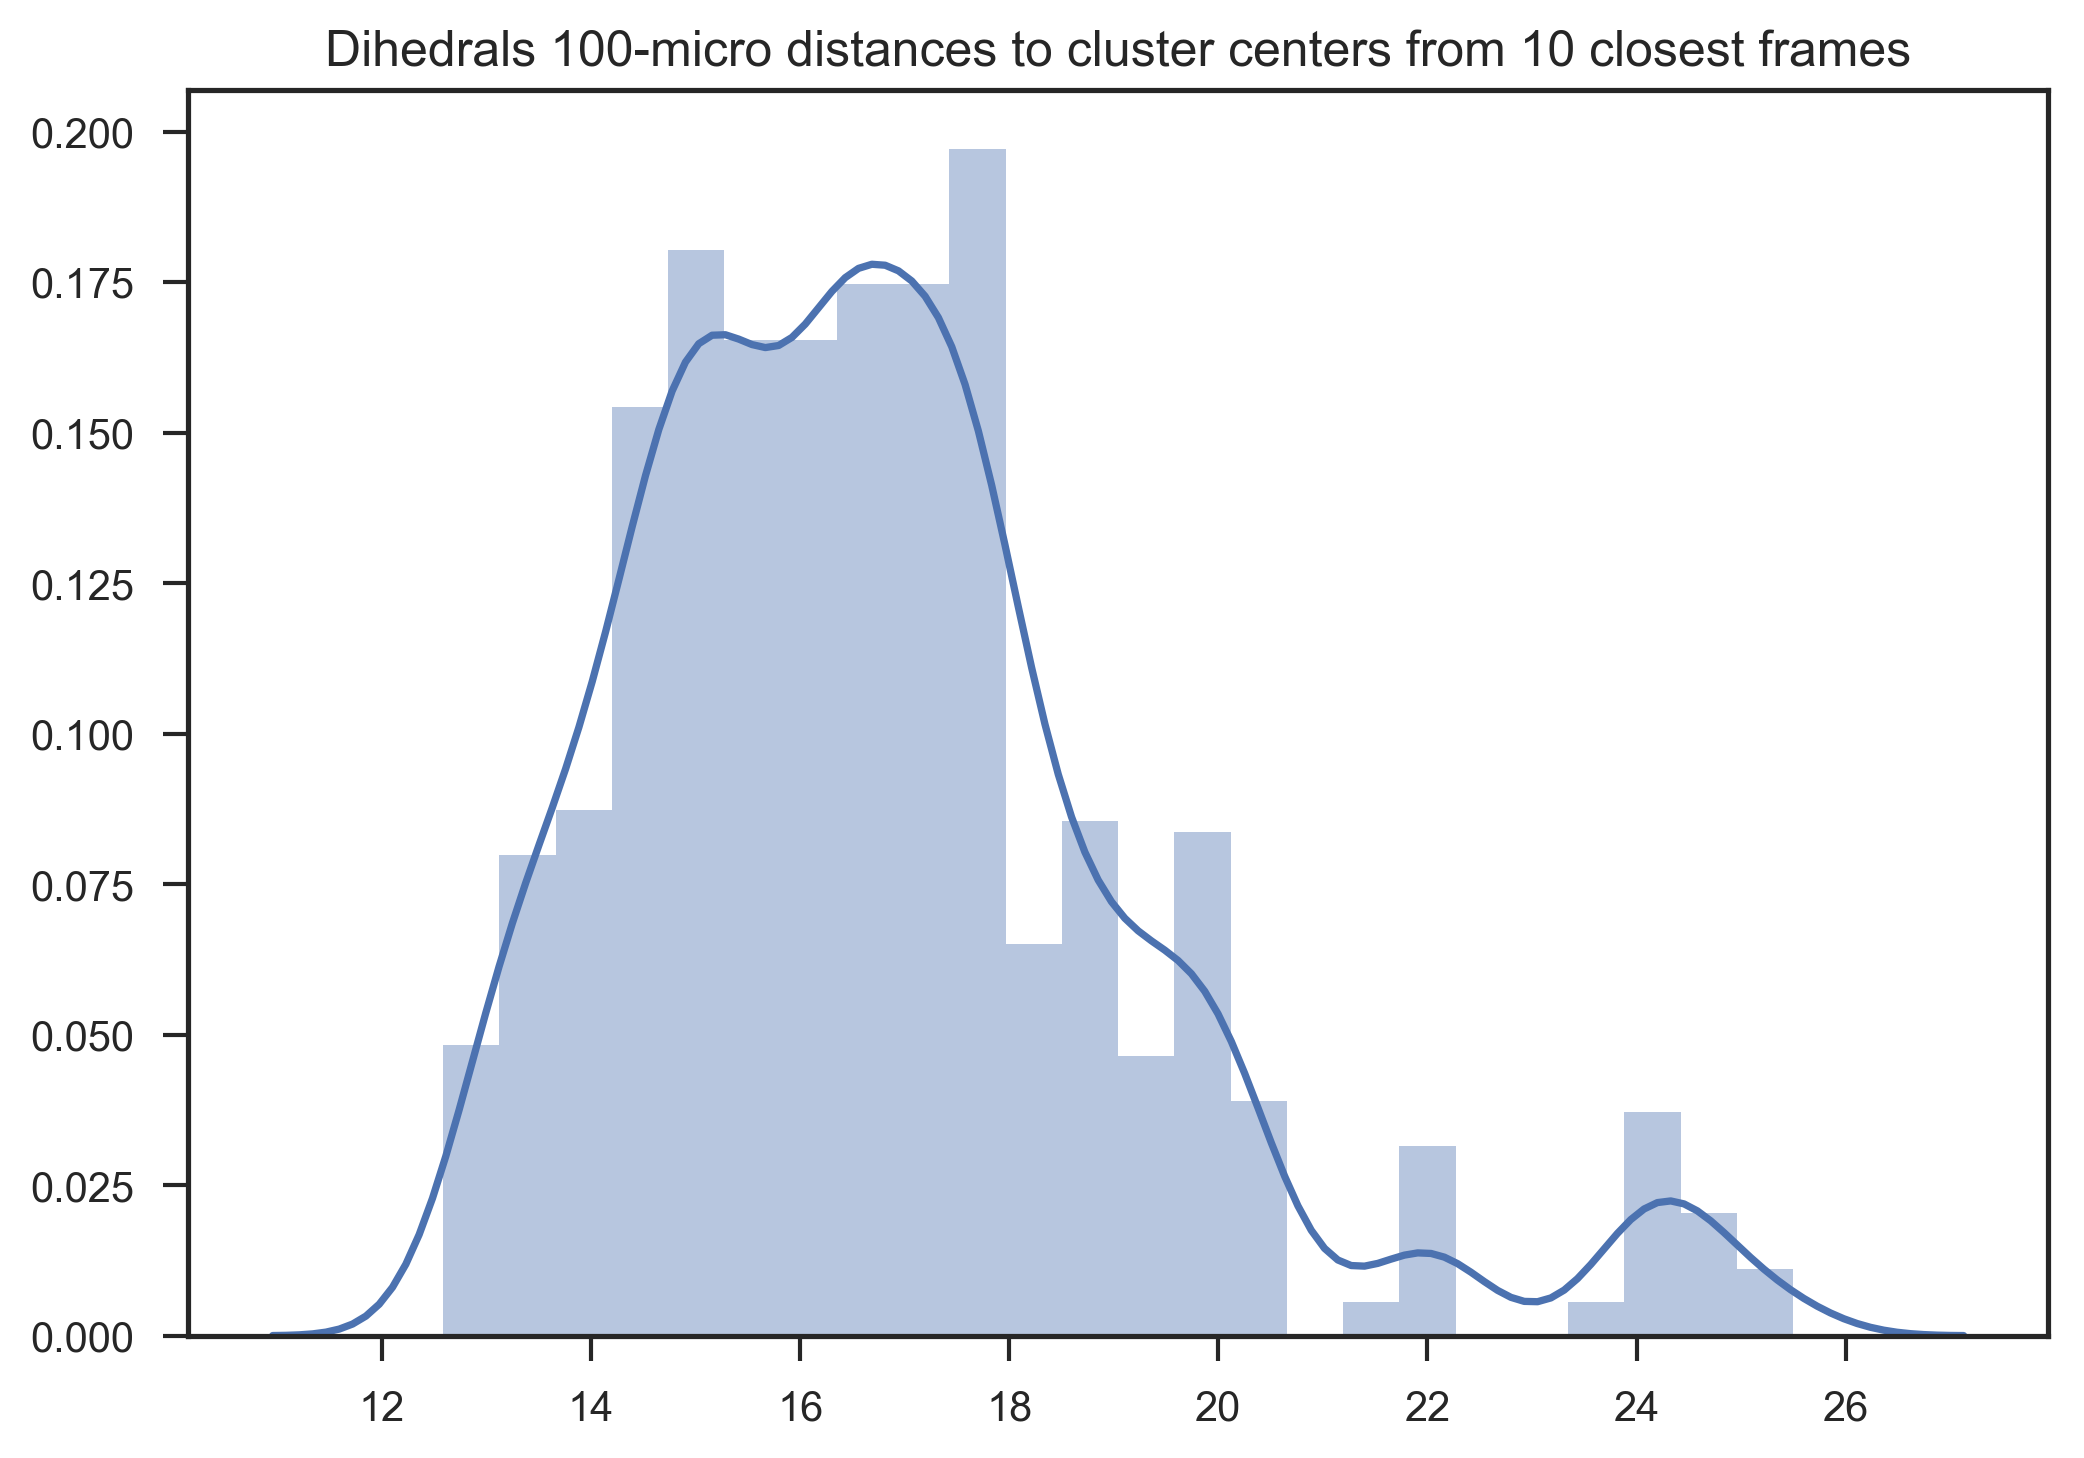

In [37]:
plt.figure(dpi=300)
sns.distplot(np.concatenate(np.array(cluster_top_10)[:,:,1]))
plt.title('Dihedrals 100-micro distances to cluster centers from 10 closest frames')
plt.show()

In [38]:
# np.max - np.min for each microstate
microstate_difs = []

for microstate in np.array(cluster_top_10)[:,:,1]:
    microstate_dif = np.max(microstate) - np.min(microstate)
    microstate_difs.append(microstate_dif)

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


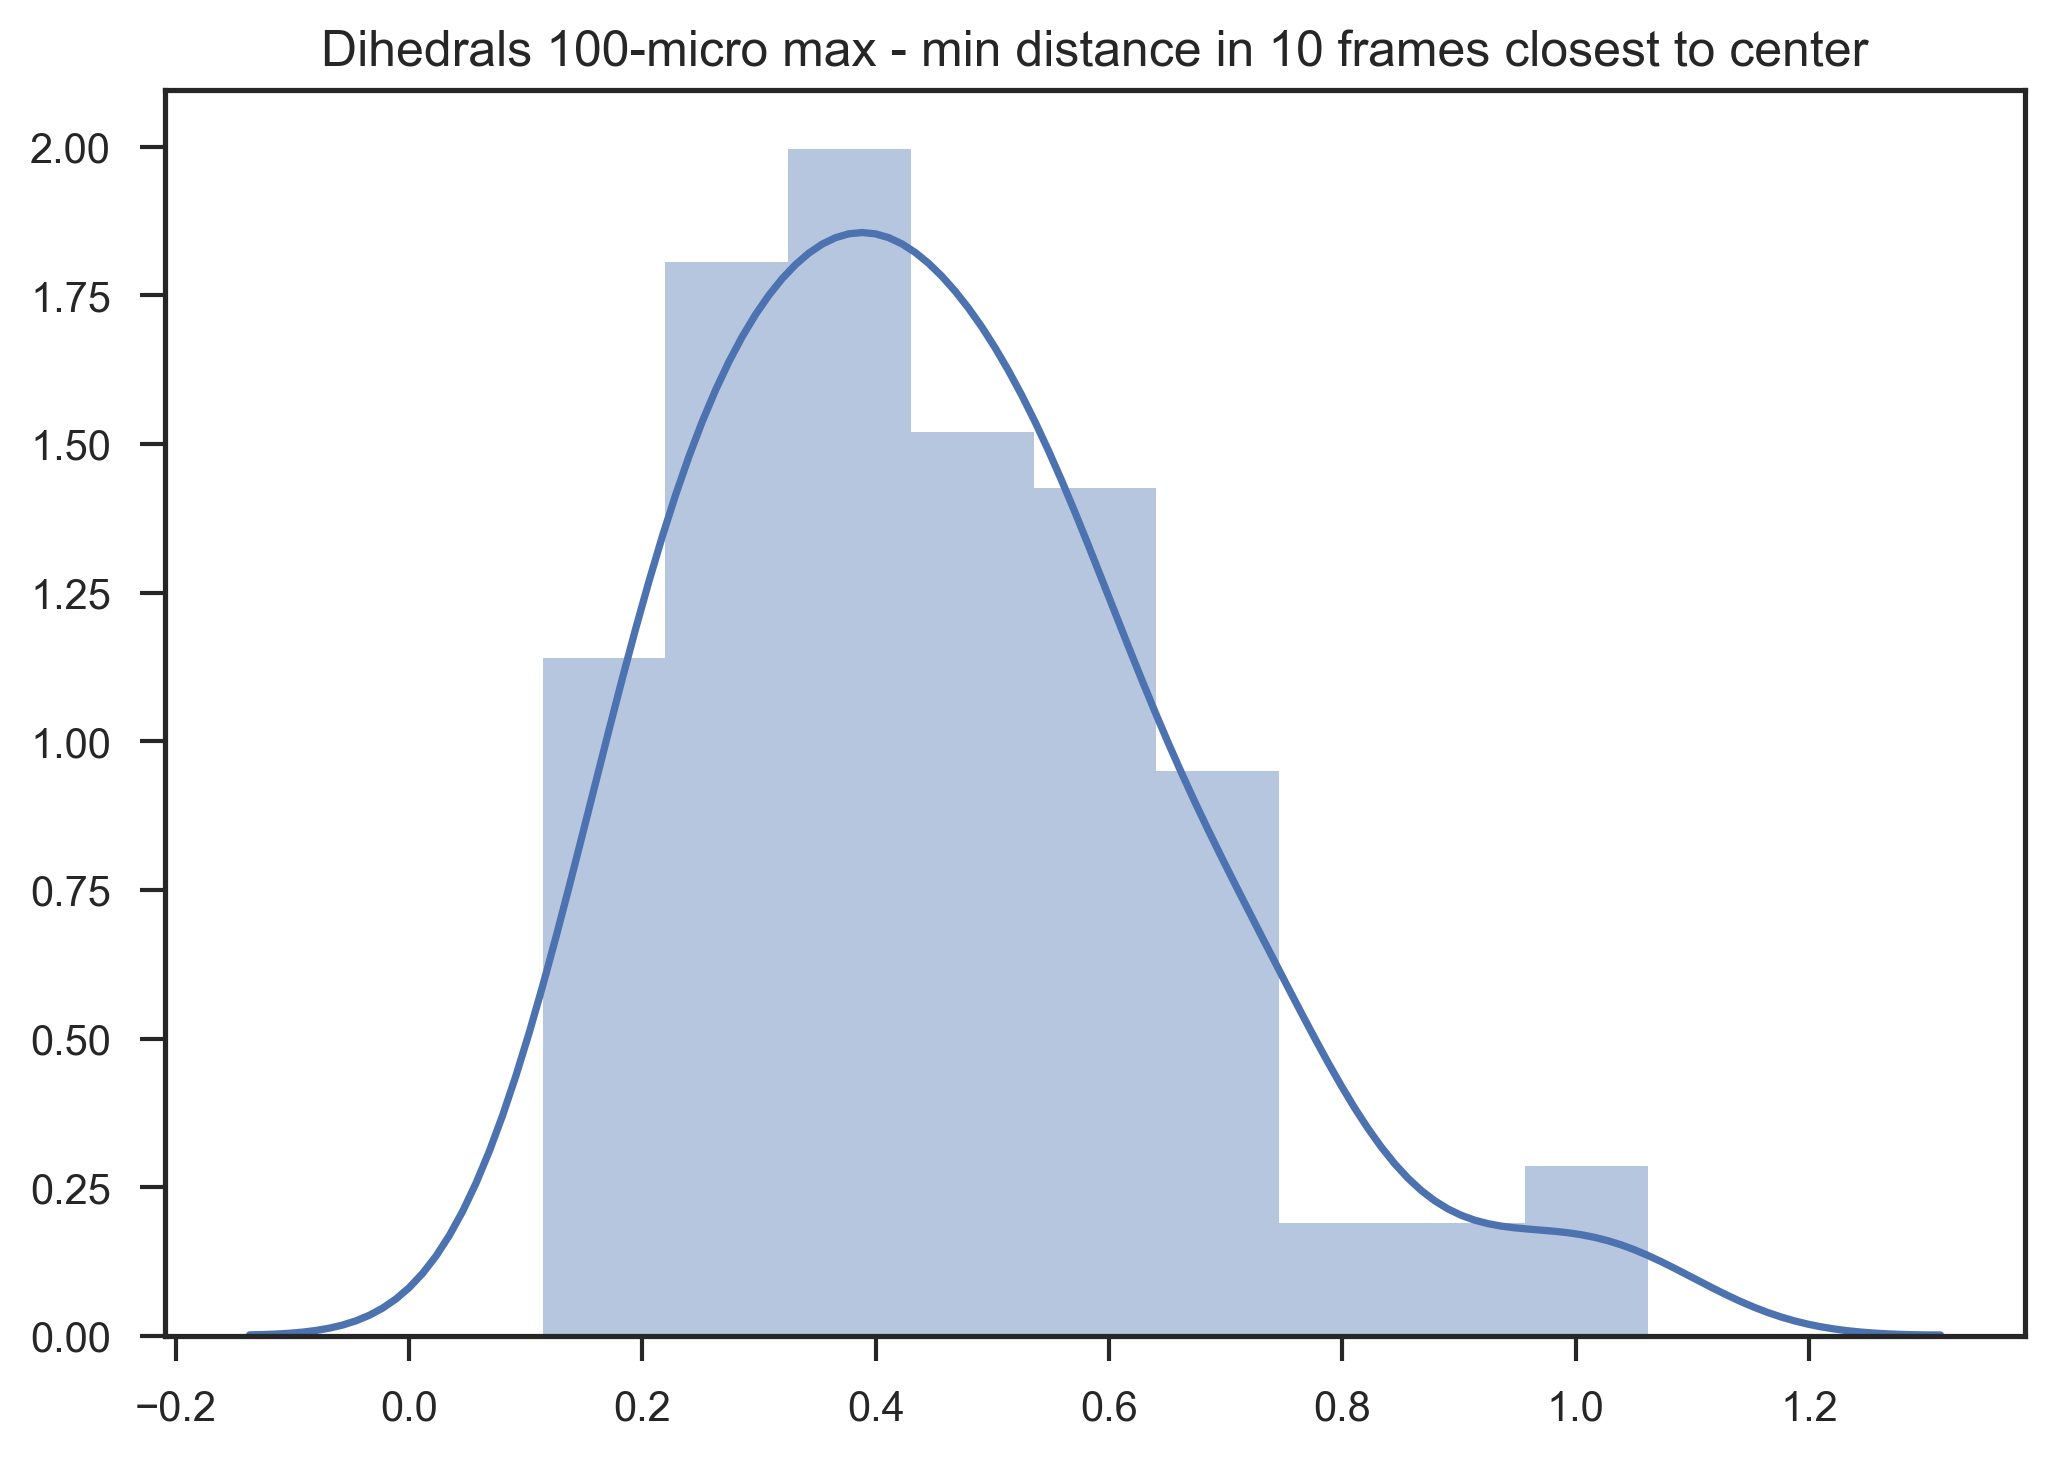

In [39]:
plt.figure(dpi=300)
sns.distplot(microstate_difs)
plt.title('Dihedrals 100-micro max - min distance in 10 frames closest to center')
plt.show()

In [41]:
# gotta normalize this to compare distances to dihedrals - divide by np.max in every cluster center

In [42]:
# np.max - np.min for each microstate
microstate_difs = []

for microstate in np.array(cluster_top_10)[:,:,1]:
    microstate_dif = (np.max(microstate) - np.min(microstate)) / np.max(microstate)
    microstate_difs.append(microstate_dif)

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


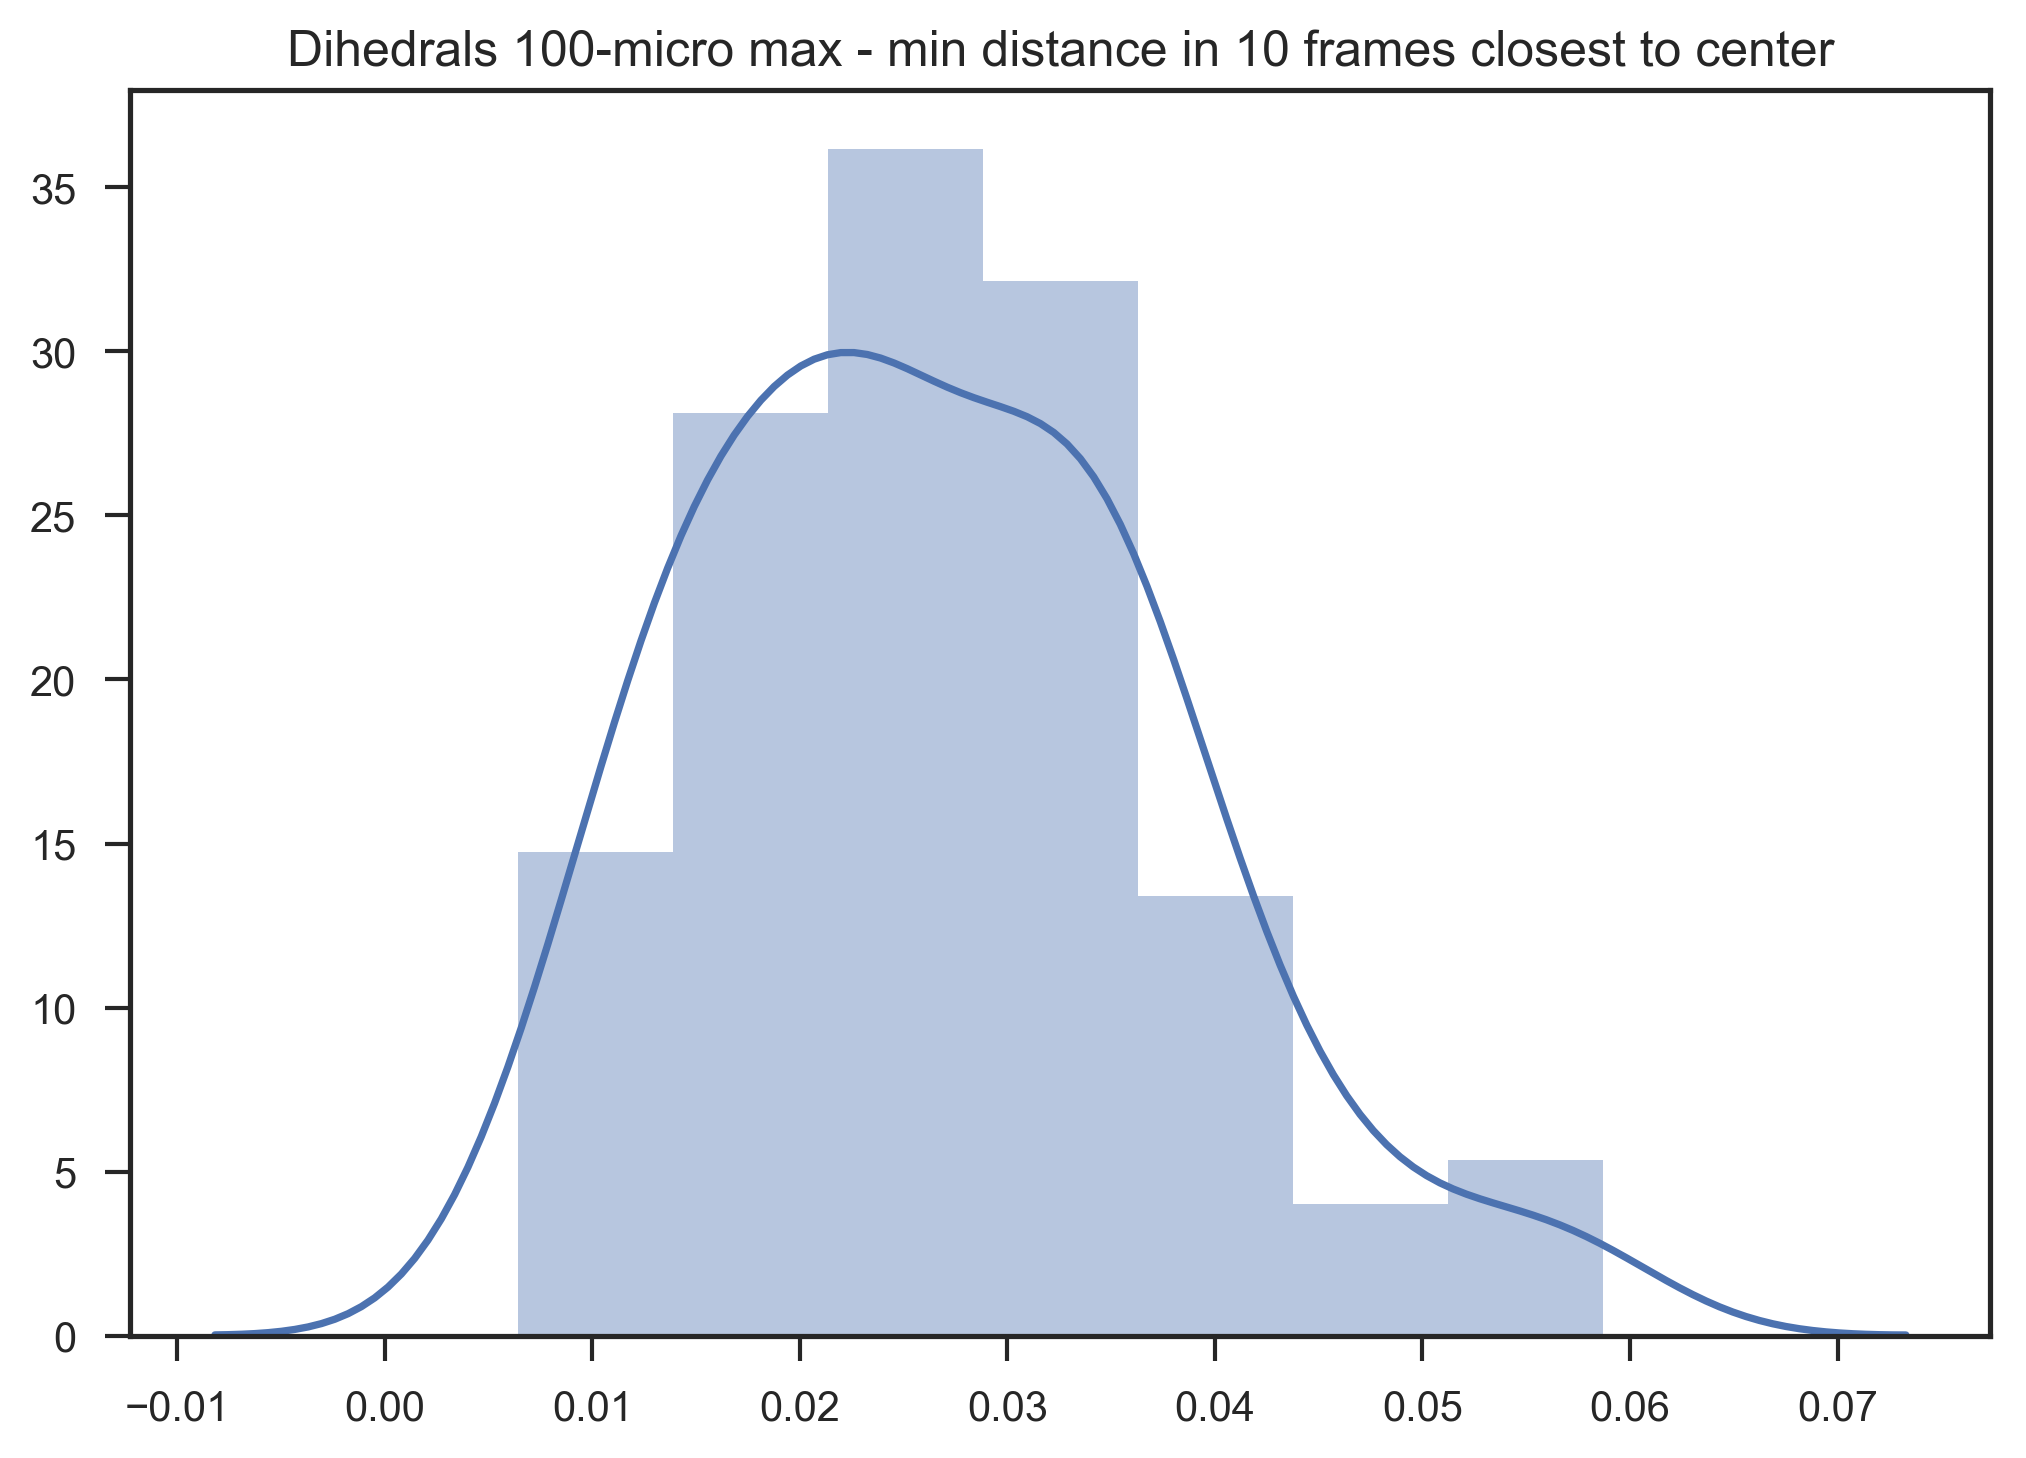

In [43]:
plt.figure(dpi=300)
sns.distplot(microstate_difs)
plt.title('Dihedrals 100-micro max - min distance in 10 frames closest to center')
plt.show()

In [138]:
# now we gotta translate this into file names, then go to HAL and extract as one .dcd per cluster center

In [139]:
kmeans_glob

array(['trajs_95/2842.npy', 'trajs_95/528.npy', 'trajs_95/529.npy', ...,
       'trajs_95/2700.npy', 'trajs_95/2681.npy', 'trajs_95/1314.npy'], 
      dtype='<U17')

In [86]:
dih_glob = np.load('../dih_glob.npy')

In [87]:
dih_glob

array(['data_cut_start_noH/11709/run0-clone0.h5',
       'data_cut_start_noH/11709/run0-clone100.h5',
       'data_cut_start_noH/11709/run0-clone101.h5', ...,
       'data_cut_start_noH/11707/run101-clone15.h5',
       'data_cut_start_noH/11707/run101-clone20.h5',
       'data_cut_start_noH/11707/run160-clone22.h5'], 
      dtype='<U42')

In [88]:
len(dih_glob)

5020

In [89]:
len(dtrajs)

5019

In [90]:
# ok so we have to translate the number from the dict, into traj number from kmeans_glob, and into traj name from dih_glob

In [91]:
len(kmeans_glob)

5019

In [92]:
cluster_top_10_filenames = []

for cluster in cluster_top_10:
    cluster_top_10_filenames.append([])
    for frame in cluster:
        traj_number = kmeans_glob[frame[0][0]].split('/')[1][:-4]
        name = dih_glob[int(traj_number)].split('/')[1] + '/' + dih_glob[int(traj_number)].split('/')[2]
        cluster_top_10_filenames[-1].append((name, frame[0][1]))

In [93]:
dih_glob[2842]

'data_cut_start_noH/11707/run59-clone29.h5'

In [48]:
cluster_top_10

[[((388, 243), 18.293087),
  ((2415, 213), 18.512472),
  ((388, 157), 18.549698),
  ((388, 248), 18.552742),
  ((1724, 1109), 18.66452),
  ((2676, 24), 18.754818),
  ((2415, 221), 18.808044),
  ((1724, 1188), 18.838066),
  ((2415, 230), 18.850824),
  ((2415, 235), 18.860365)],
 [((4316, 1648), 12.997779),
  ((4316, 1581), 13.020292),
  ((4316, 1644), 13.055424),
  ((648, 86), 13.106146),
  ((4316, 1572), 13.108044),
  ((4316, 1570), 13.117081),
  ((4316, 1680), 13.137591),
  ((4316, 1573), 13.185005),
  ((4316, 1607), 13.204054),
  ((648, 89), 13.208891)],
 [((4154, 26), 13.316347),
  ((4752, 390), 13.389922),
  ((381, 81), 13.64935),
  ((381, 160), 13.695138),
  ((3863, 135), 13.715422),
  ((2563, 252), 13.733521),
  ((4154, 50), 13.73988),
  ((2563, 251), 13.747602),
  ((4154, 24), 13.75128),
  ((381, 85), 13.752841)],
 [((633, 311), 15.793375),
  ((633, 286), 15.856005),
  ((633, 313), 15.992858),
  ((633, 316), 16.026197),
  ((4181, 958), 16.079098),
  ((1308, 294), 16.122856),
  (

In [94]:
cluster_top_10_filenames

[[('11707/run29-clone3.h5', 243),
  ('11707/run29-clone14.h5', 213),
  ('11707/run29-clone3.h5', 157),
  ('11707/run29-clone3.h5', 248),
  ('11707/run73-clone13.h5', 1109),
  ('11707/run29-clone6.h5', 24),
  ('11707/run29-clone14.h5', 221),
  ('11707/run73-clone13.h5', 1188),
  ('11707/run29-clone14.h5', 230),
  ('11707/run29-clone14.h5', 235)],
 [('11707/run18-clone26.h5', 1648),
  ('11707/run18-clone26.h5', 1581),
  ('11707/run18-clone26.h5', 1644),
  ('11707/run134-clone23.h5', 86),
  ('11707/run18-clone26.h5', 1572),
  ('11707/run18-clone26.h5', 1570),
  ('11707/run18-clone26.h5', 1680),
  ('11707/run18-clone26.h5', 1573),
  ('11707/run18-clone26.h5', 1607),
  ('11707/run134-clone23.h5', 89)],
 [('11707/run92-clone7.h5', 26),
  ('11707/run92-clone12.h5', 390),
  ('11707/run96-clone11.h5', 81),
  ('11707/run96-clone11.h5', 160),
  ('11707/run85-clone15.h5', 135),
  ('11707/run94-clone15.h5', 252),
  ('11707/run92-clone7.h5', 50),
  ('11707/run94-clone15.h5', 251),
  ('11707/run92-cl

In [50]:
# let's make sure that nothing has gone wrong here - check the lengths of dtrajs vs lengths of the trajectories we 
# translated those into

In [84]:
top10_dtrajs_lens = []

for microstate in cluster_top_10:
    top10_dtrajs_lens.append([])
    for frame in microstate:
        top10_dtrajs_lens[-1].append(len(dtrajs[frame[0][0]]))

In [85]:
top10_dtrajs_lens

[[1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [2050, 2050, 2050, 1960, 2050, 2050, 2050, 2050, 2050, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 2050, 1960, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050],
 [2050, 1960, 2050, 2050, 1960, 2050, 2050, 2050, 2050, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
 [1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,

In [55]:
len(top10_dtrajs_lens)

100

In [56]:
# now making an analogical list on the raw data on HAL

In [70]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm'

In [68]:
len(cluster_top_10_filenames)

100

In [95]:
np.save('cluster_top_10.npy', cluster_top_10_filenames)

In [5]:
# calc an hmm

In [116]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
hmm = pyemma_msm.hmm(7)

16-08-17 15:10:12 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[19] WARNING  Requested coarse-grained model with 7 metastable states at lag=100.The ratio of relaxation timescales between 7 and 8 states is only 1.32467467183 while we recommend at least 1.5. It is possible that the resulting HMM is inaccurate. Handle with caution.


In [17]:
hmm.nstates

7

In [18]:
hmm.nstates_obs

99

In [20]:
hmm.observation_probabilities.shape

(7, 99)

In [85]:
for i in range(len(hmm.observation_probabilities)):
    plt.figure(dpi=300)
    plt.scatter(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
    plt.plot(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
    plt.savefig('hmm/observation_probabilities/%s.png' % i)
    plt.close()

In [24]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm'

In [28]:
hmm.lifetimes

array([  6871.87753246,  34842.2563058 ,  15561.05268578,  38236.50073327,
        27114.76674348,  49051.94332683,  22286.76654704])

In [41]:
#plt.figure(dpi=300)
#plt.imshow(np.log10(hmm.P), cmap='Blues')
#plt.colorbar()

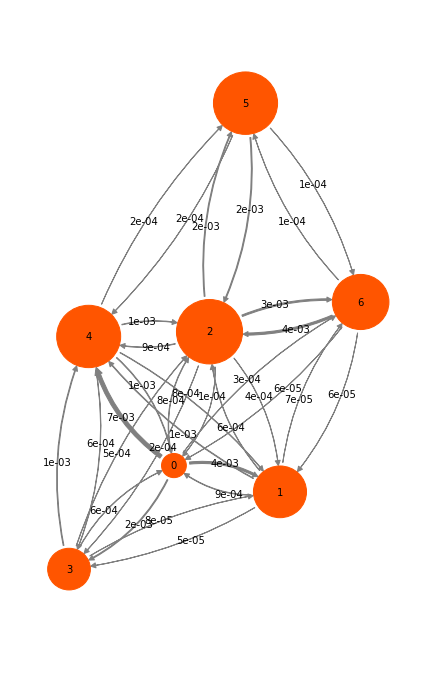

In [88]:
plt.figure()
pyemma.plots.plot_markov_model(hmm.P)
plt.savefig('dih_100_hmm.png', dpi=300)
plt.show()

In [44]:
hmm.pi

array([ 0.02925806,  0.13386785,  0.20784378,  0.08688227,  0.19459793,
        0.1954011 ,  0.15214902])

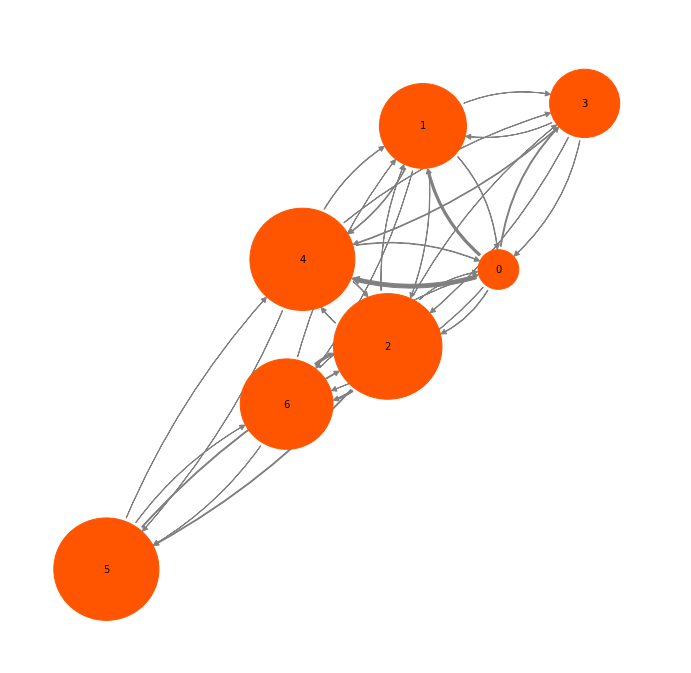

In [121]:
plt.figure()
pyemma.plots.plot_markov_model(hmm.P, arrow_labels=None)
plt.savefig('dih_100_hmm_nolabels.png', dpi=300)
plt.show()

In [50]:
# small side thing - rearrange the all cluster centers on all landscapes into same landscapes in one folder, 100 files
# in there for each cluster

In [57]:
import itertools
import os
import shutil

In [58]:
combinations = itertools.combinations(range(10),2)

for i,j in combinations:
    os.mkdir('landscapes_cluster_centers_/tics_%d_%d' % (i,j))
    for k in range(99):
        shutil.copy('landscapes_cluster_centers/%d/tics_%d_%d.png' % (k,i,j), 'landscapes_cluster_centers_/tics_%d_%d/%d.png' % (i,j,k))

In [61]:
# ok back to the hmm - let's print out which microstates go with what macrostates to complement the 
# observation probabilities plots

In [62]:
# then we'll also do a 6 state hmm

In [77]:
#metastable_sets = []

#for i in range(len(hmm.observation_probabilities)):
#    metastable_sets.append([])
#    macrostate = hmm.observation_probabilities[i]
#    for j in range(len(macrostate)):
#        if macrostate[j] > 0.01:
#            metastable_sets[-1].append(j)

In [75]:
hmm.metastable_sets

[array([ 1, 43, 48, 67, 75]),
 array([ 4, 10, 12, 24, 56, 89]),
 array([ 5, 17, 32, 40, 57, 65, 69, 71, 82, 83, 95, 96]),
 array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
 array([ 6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50, 51,
        54, 55, 59, 61, 63, 77, 78, 79, 80, 85, 86, 88, 93]),
 array([ 2, 27, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 33, 37, 41, 42, 44, 58, 60, 62, 66, 68,
        72, 73, 74, 81, 84, 87, 92, 94, 97])]

In [76]:
# plot hmm.metastable_memberships

In [83]:
len(hmm.metastable_memberships)

99

In [ ]:
#for i in range(len(hmm.observation_probabilities)):
#    plt.figure(dpi=300)
#    plt.scatter(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
#    plt.plot(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
#    plt.savefig('hmm/observation_probabilities/%s.png' % i)
#    plt.close()

In [86]:
for i in range(len(hmm.metastable_memberships)):
    plt.figure(dpi=300)
    plt.plot(range(len(hmm.metastable_memberships[i])), hmm.metastable_memberships[i])
    plt.scatter(range(len(hmm.metastable_memberships[i])), hmm.metastable_memberships[i])
    plt.savefig('hmm/metastable_memberships/%s.png' % i)
    plt.close()

In [89]:
# ck test

In [92]:
cktest = hmm.cktest()

16-08-17 14:26:32 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[1] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
16-08-17 14:26:32 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[2] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
16-08-17 14:26:34 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[3] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
16-08-17 14:26:35 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[4] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
16-08-17 14:26:37 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[5] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
16-08-17 14:26:39 pyemma.msm.e

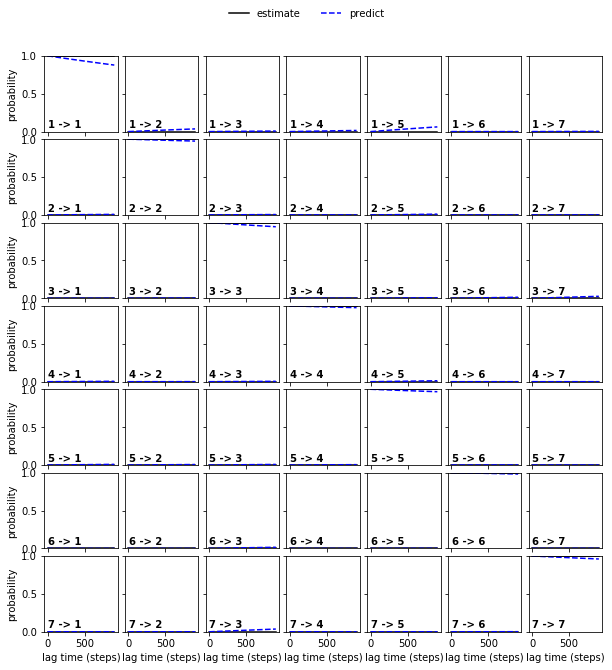

In [97]:
plt.figure()
pyemma.plots.plot_cktest(cktest)
plt.savefig('hmm/hmm7_cktest.png', dpi=300)
plt.show()

In [95]:
cktest_msm = pyemma_msm.cktest(7)

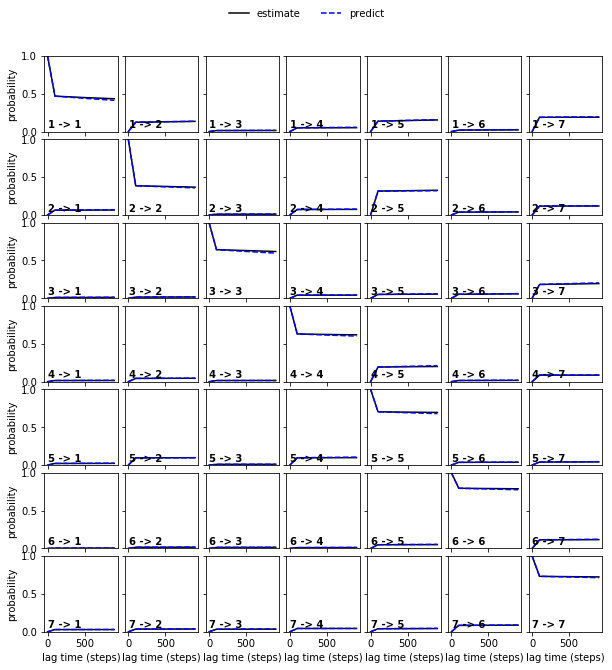

In [96]:
plt.figure()
pyemma.plots.plot_cktest(cktest_msm)
plt.show()

In [98]:
# ok looks like the hmm cktest is not up to scratch - will clarify later

In [103]:
pyemma_msm.connected_sets

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([69])]

In [99]:
# now 6 macrostate HMM

In [101]:
len(dtrajs)

5019

In [4]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
hmm = pyemma_msm.hmm(6)

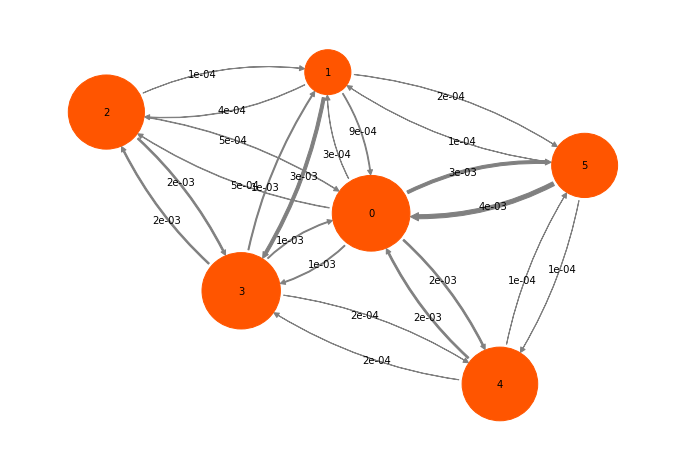

In [104]:
plt.figure()
pyemma.plots.plot_markov_model(hmm.P)
plt.savefig('hmm6/dih_100_hmm6.png', dpi=300)
plt.show()

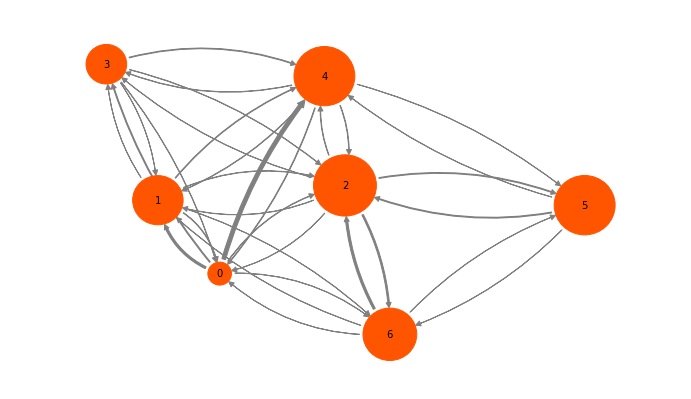

In [119]:
plt.figure()
pyemma.plots.plot_markov_model(hmm.P, arrow_labels=None)
plt.savefig('hmm6/dih_100_hmm6_nolabels.png', dpi=300)
plt.show()

In [106]:
hmm.metastable_sets

[array([ 5, 17, 32, 40, 57, 65, 69, 71, 82, 83, 95, 96]),
 array([ 1,  4, 10, 12, 24, 43, 48, 56, 75, 89]),
 array([ 0,  9, 14, 22, 31, 39, 67, 70, 76, 90, 91, 98]),
 array([ 6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50, 51,
        54, 55, 59, 61, 63, 77, 78, 79, 80, 85, 86, 88, 93]),
 array([ 2, 27, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 33, 37, 41, 42, 44, 58, 60, 62, 66, 68,
        72, 73, 74, 81, 84, 87, 92, 94, 97])]

In [108]:
hmm.pi

array([ 0.20005155,  0.07045811,  0.19207372,  0.20371734,  0.18958825,
        0.14411103])

In [109]:
hmm.lifetimes

array([ 15456.46900069,  21673.35109367,  44605.03702807,  26879.43912015,
        49045.08445439,  22283.50874878])

In [111]:
for i in range(len(hmm.observation_probabilities)):
    plt.figure(dpi=300)
    plt.scatter(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
    plt.plot(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
    plt.savefig('hmm6/observation_probabilities/%s.png' % i)
    plt.close()

In [112]:
for i in range(len(hmm.metastable_memberships)):
    plt.figure(dpi=300)
    plt.plot(range(len(hmm.metastable_memberships[i])), hmm.metastable_memberships[i])
    plt.scatter(range(len(hmm.metastable_memberships[i])), hmm.metastable_memberships[i])
    plt.savefig('hmm6/metastable_memberships/%s.png' % i)
    plt.close()

In [113]:
# ck test

In [5]:
cktest = hmm.cktest(mlags=None)

19-08-17 19:43:51 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[0] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
19-08-17 19:43:52 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[1] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
19-08-17 19:43:53 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[2] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
19-08-17 19:43:54 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[3] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
19-08-17 19:43:55 pyemma.msm.estimators.maximum_likelihood_hmsm.MaximumLikelihoodHMSM[4] WARNING  Ignored error during estimation: 'MaximumLikelihoodMSM' object has no attribute '_is_estimated'
19-08-17 19:43:57 pyemma.msm.e

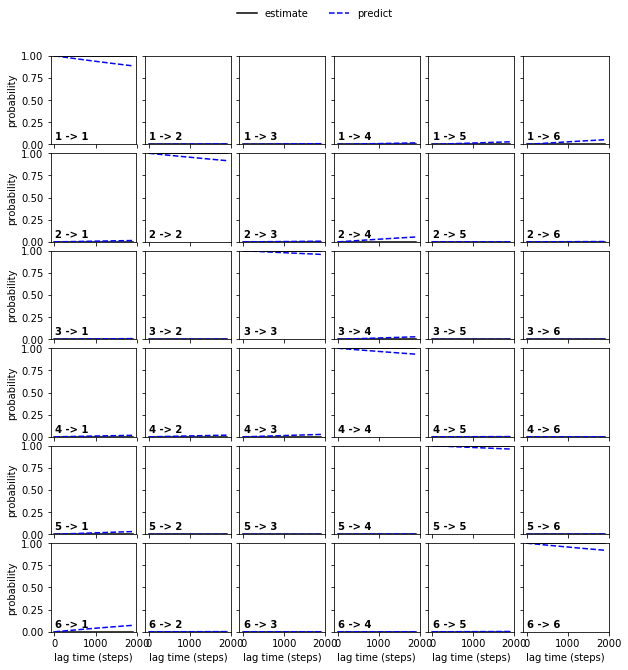

In [6]:
plt.figure()
pyemma.plots.plot_cktest(cktest)
plt.savefig('hmm6/hmm6_cktest.png', dpi=300)
plt.show()

In [ ]:
# try HMM through estimate_hidden_markov_model

In [125]:
hmm6 = pyemma.msm.estimate_hidden_markov_model(dtrajs, 6, 100)

In [ ]:
cktest = hmm6.cktest()

In [ ]:
plt.figure()
pyemma.plots.plot_cktest(cktest)
#plt.savefig('hmm6/hmm6_cktest.png', dpi=300)
plt.show()

In [13]:
# now plots cluster centers on the corrected TICA landscapes, by HMM macrostates

In [14]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

cluster_centers = np.load('cluster_centers/100.npy')
cluster_centers_ = cluster_centers[pyemma_msm.active_set]

In [15]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm'

In [36]:
metastable_sets = [np.array([ 5, 17, 32, 40, 57, 65, 69, 71, 82, 83, 95, 96]),
 np.array([ 1,  4, 10, 12, 24, 43, 48, 56, 75, 89]),
 np.array([ 0,  9, 14, 22, 31, 39, 67, 70, 76, 90, 91, 98]),
 np.array([ 6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50, 51,
        54, 55, 59, 61, 63, 77, 78, 79, 80, 85, 86, 88, 93]),
 np.array([ 2, 27, 28, 34, 46, 47, 52, 53, 64]),
 np.array([ 3,  7, 13, 16, 18, 21, 25, 33, 37, 41, 42, 44, 58, 60, 62, 66, 68,
        72, 73, 74, 81, 84, 87, 92, 94, 97])]

In [37]:
metastable_assignments = np.zeros(len(pyemma_msm.active_set))

In [38]:
for i in range(len(metastable_sets)):
    macrostate = metastable_sets[i]
    for microstate in macrostate:
        metastable_assignments[microstate] = i

In [39]:
metastable_assignments

array([ 2.,  1.,  4.,  5.,  1.,  0.,  3.,  5.,  3.,  2.,  1.,  3.,  1.,
        5.,  2.,  3.,  5.,  0.,  5.,  3.,  3.,  5.,  2.,  3.,  1.,  5.,
        3.,  4.,  4.,  3.,  3.,  2.,  0.,  5.,  4.,  3.,  3.,  5.,  3.,
        2.,  0.,  5.,  5.,  1.,  5.,  3.,  4.,  4.,  1.,  3.,  3.,  3.,
        4.,  4.,  3.,  3.,  1.,  0.,  5.,  3.,  5.,  3.,  5.,  3.,  4.,
        0.,  5.,  2.,  5.,  0.,  2.,  0.,  5.,  5.,  5.,  1.,  2.,  3.,
        3.,  3.,  3.,  5.,  0.,  0.,  5.,  3.,  3.,  5.,  3.,  1.,  2.,
        2.,  5.,  3.,  5.,  0.,  0.,  5.,  2.])

In [27]:
import itertools

In [40]:
combinations = itertools.combinations(range(10),2)

for i,j in combinations:
    
    plot_data = np.load('landscapes_plot_data/tics_%d_%d.npy' % (i,j))
    plot_data = [[], plot_data]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=metastable_assignments, cmap=matplotlib.cm.get_cmap('gist_rainbow', 6))
    plt.colorbar()

    plt.savefig('hmm6/landscapes_macrostates/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [ ]:
# and hmm7

In [30]:
metastable_sets = [np.array([ 1, 43, 48, 67, 75]),
 np.array([ 4, 10, 12, 24, 56, 89]),
 np.array([ 5, 17, 32, 40, 57, 65, 69, 71, 82, 83, 95, 96]),
 np.array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
 np.array([ 6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50, 51,
        54, 55, 59, 61, 63, 77, 78, 79, 80, 85, 86, 88, 93]),
 np.array([ 2, 27, 28, 34, 46, 47, 52, 53, 64]),
 np.array([ 3,  7, 13, 16, 18, 21, 25, 33, 37, 41, 42, 44, 58, 60, 62, 66, 68,
        72, 73, 74, 81, 84, 87, 92, 94, 97])]

In [31]:
metastable_assignments = np.zeros(len(pyemma_msm.active_set))

In [32]:
for i in range(len(metastable_sets)):
    macrostate = metastable_sets[i]
    for microstate in macrostate:
        metastable_assignments[microstate] = i

In [33]:
metastable_assignments

array([ 3.,  0.,  5.,  6.,  1.,  2.,  4.,  6.,  4.,  3.,  1.,  4.,  1.,
        6.,  3.,  4.,  6.,  2.,  6.,  4.,  4.,  6.,  3.,  4.,  1.,  6.,
        4.,  5.,  5.,  4.,  4.,  3.,  2.,  6.,  5.,  4.,  4.,  6.,  4.,
        3.,  2.,  6.,  6.,  0.,  6.,  4.,  5.,  5.,  0.,  4.,  4.,  4.,
        5.,  5.,  4.,  4.,  1.,  2.,  6.,  4.,  6.,  4.,  6.,  4.,  5.,
        2.,  6.,  0.,  6.,  2.,  3.,  2.,  6.,  6.,  6.,  0.,  3.,  4.,
        4.,  4.,  4.,  6.,  2.,  2.,  6.,  4.,  4.,  6.,  4.,  1.,  3.,
        3.,  6.,  4.,  6.,  2.,  2.,  6.,  3.])

In [34]:
import itertools

In [35]:
combinations = itertools.combinations(range(10),2)

for i,j in combinations:
    
    plot_data = np.load('landscapes_plot_data/tics_%d_%d.npy' % (i,j))
    plot_data = [[], plot_data]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=metastable_assignments, cmap=matplotlib.cm.get_cmap('Set1', 7))
    plt.colorbar()

    plt.savefig('hmm7/landscapes_macrostates/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [1]:
######################

In [2]:
# now looking at the slowest processes in the MSM

In [3]:
import numpy as np
import glob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pyemma
import msmbuilder
from msmbuilder.msm import MarkovStateModel
from msmbuilder.lumping import PCCAPlus

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
dtrajs = np.load('100.npy', encoding='bytes')
dtrajs = list(dtrajs)

In [4]:
len(dtrajs)

5019

In [4]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

In [7]:
pyemma_msm.active_count_fraction

0.9998017775534523

In [12]:
pyemma_msm.connected_sets

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([69])]

In [16]:
pyemma_msm.eigenvectors_right(k=1).shape

(99, 1)

In [26]:
pyemma_msm.eigenvectors_right()[:,0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [22]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm'

In [82]:
#plt.figure(dpi=300)
#plt.plot(pyemma_msm.eigenvectors_right()[:,1])
#plt.show()

In [83]:
#plt.figure(dpi=300)
#plt.plot(pyemma_msm.eigenvectors_left()[1,:])
#plt.show()

In [84]:
for i in range(10):
    plt.figure(dpi=300)
    plt.plot(pyemma_msm.eigenvectors_right()[:,i])
    plt.savefig('right_eigenvectors/%d.png' % i, dpi=300)
    plt.close()

In [85]:
for i in range(10):
    plt.figure(dpi=300)
    plt.plot(pyemma_msm.eigenvectors_left()[i,:])
    plt.savefig('left_eigenvectors/%d.png' % i, dpi=300)
    plt.close()

In [86]:
# before I analyze the timescales - let's see how the timescales drop out with increasing ergodic cutoff

In [135]:
for i in np.arange(1,1002,50):
    msmb_msm = MarkovStateModel(lag_time=100, ergodic_cutoff=i/100)
    msmb_msm.fit(dtrajs)
    plt.figure(dpi=300)
    plt.scatter(range(len(msmb_msm.timescales_)), msmb_msm.timescales_)
    plt.xlabel('Timescale index')
    plt.ylabel('Timescales (frames, 0.5 ns/frame)')
    plt.title('Ergodic cutoff: %d counts' % i)
    plt.savefig('ergodicity_timescales/%d.png' % i, dpi=300)
    plt.close()

MSM contains 2 strongly connected components above weight=0.01. Component 1 selected, with population 99.980130%
MSM contains 2 strongly connected components above weight=0.51. Component 0 selected, with population 99.980130%
MSM contains 2 strongly connected components above weight=1.01. Component 0 selected, with population 99.980130%
MSM contains 2 strongly connected components above weight=1.51. Component 0 selected, with population 99.980130%
MSM contains 7 strongly connected components above weight=2.01. Component 3 selected, with population 99.248939%
MSM contains 7 strongly connected components above weight=2.51. Component 1 selected, with population 99.248939%
MSM contains 12 strongly connected components above weight=3.01. Component 3 selected, with population 78.998557%
MSM contains 16 strongly connected components above weight=3.51. Component 4 selected, with population 78.539556%
MSM contains 19 strongly connected components above weight=4.01. Component 4 selected, with po

In [134]:
########
# back to analyzing the top timescales

In [136]:
# 1st eigenvector (as in index 1, index 0 is the constant eigenvector)

In [139]:
# the right eigenvector is a mess, look at the left eigenvector

In [141]:
# take 3 most positive macrostates, and 3 most negative - positive check over 0.02, negative below - 0.02

In [144]:
#np.where(pyemma_msm.eigenvectors_left()[1,:] > 0.02)

(array([ 2, 28, 46, 52, 53, 57, 58, 64]),)

In [145]:
# 3 most positive: states 28, 2, 46, (64)

In [146]:
# translate to original indexes

In [158]:
#pyemma_msm.active_set[28], pyemma_msm.active_set[2], pyemma_msm.active_set[46], pyemma_msm.active_set[64]

(28, 2, 46, 64)

In [151]:
#np.where(pyemma_msm.eigenvectors_left()[1,:] < -0.02)

(array([ 6, 14, 22, 80, 90]),)

In [152]:
# 3 most negative: states 90, 22, 6, (80)

In [159]:
#pyemma_msm.active_set[90], pyemma_msm.active_set[22], pyemma_msm.active_set[6], pyemma_msm.active_set[80]

(91, 22, 6, 81)

In [160]:
# this is SET-I motion between apo (+ve) and TS (-ve), C-flank in apo in all 4 +ve and 3 -ve, in intermediate in 4th -ve

In [162]:
# 2nd eigenvector - using the left eigenvector

In [163]:
# take all +ve above 0.02 and all -ve below -0.15

In [175]:
#####################################
#####################################
# taking the left eigenvector is actually not a good idea - you end up with the same structure as the stationary_distribution

In [176]:
# right eigenvectors only

In [177]:
# 1st eigenvector (index 1)

In [178]:
# +ve take all > 1, -ve all < -1

In [183]:
np.where(pyemma_msm.eigenvectors_right()[:,1] > 1)

(array([ 2,  3,  7, 13, 16, 18, 25, 27, 28, 33, 34, 37, 41, 42, 44, 46, 52,
        53, 58, 60, 62, 64, 66, 68, 72, 73, 74, 81, 84, 87, 92, 94, 97]),)

In [186]:
pyemma_msm.active_set[69]

70

In [190]:
np.where(pyemma_msm.eigenvectors_right()[:,1] < -1)

(array([ 0,  6,  8,  9, 14, 15, 19, 22, 26, 30, 31, 39, 49, 55, 59, 70, 76,
        78, 79, 85, 88, 90, 91, 93, 98]),)

In [ ]:
# this is SET-I motion apo (+ve) - TS (-ve)

In [192]:
# 2nd eigenvector - over 1 and under -1

In [194]:
np.where(pyemma_msm.eigenvectors_right()[:,2] > 1)

(array([ 2, 28, 34, 46, 47, 52, 53, 64]),)

In [197]:
np.where(pyemma_msm.eigenvectors_right()[:,2] < -1)

(array([ 3,  7, 13, 16, 18, 25, 32, 33, 37, 41, 42, 44, 57, 58, 60, 62, 66,
        68, 72, 73, 74, 81, 84, 87, 92, 94, 97]),)

In [198]:
# this seems to be movement of C-flank apo (all +ve) to TS (SOME -ve, some are still in apo)

In [199]:
# 3rd eigenvector - again over 1 and below -1 

In [200]:
np.where(pyemma_msm.eigenvectors_right()[:,3] > 1)

(array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),)

In [201]:
np.where(pyemma_msm.eigenvectors_right()[:,3] < -1)

(array([ 1, 10, 12, 24, 43, 56, 89]),)

In [202]:
# this seems to be movement of the 'front' part of the SET-I (the loop) from TS (MOST but not all +ve) towards SAM/apo 
# while the 'back' part of the SET-I stays in TS

In [203]:
# 4th eigenvector - over 1 and below -0.5

In [204]:
np.where(pyemma_msm.eigenvectors_right()[:,4] > 1)

(array([ 5, 17, 40, 69, 82]),)

In [206]:
np.where(pyemma_msm.eigenvectors_right()[:,4] < -0.5)

(array([ 3,  7, 10, 12, 13, 16, 21, 24, 25, 33, 37, 41, 42, 44, 56, 58, 60,
        62, 66, 68, 72, 73, 74, 81, 84, 87, 89, 92, 94, 97]),)

In [ ]:
# this is movement of C-flank into TS (+ve) from Apo and intermediates (-ve)

In [207]:
# 5th eigenvector - over 1.5 and below -1

In [208]:
np.where(pyemma_msm.eigenvectors_right()[:,5] > 1.5)

(array([ 1, 10, 12, 24, 43, 48, 56, 89]),)

In [217]:
np.where(pyemma_msm.eigenvectors_right()[:,5] < -1)

(array([ 6, 15, 20, 59, 77, 85]),)

In [218]:
# this seems to be the same as eigenvector 3

In [219]:
# 6th eigenvector - over 1, below -1

In [220]:
np.where(pyemma_msm.eigenvectors_right()[:,6] > 1)

(array([ 1, 43, 48, 75]),)

In [221]:
np.where(pyemma_msm.eigenvectors_right()[:,6] < -1)

(array([10, 24, 56, 89]),)

In [222]:
# C-flank - into intermediates closer to TS (+ve), from intermediates closer to apo (-ve)

In [225]:
# 7th eigenvector - this is essentially flat around 0 and only negatives - so we say this is from the negatives into
# everything else - take negatives below -1

In [226]:
np.where(pyemma_msm.eigenvectors_right()[:,7] < -1)

(array([20, 32, 77]),)

In [227]:
# those 3 have that in common that C-flank is intermediate between apo and TS - SET-I floppy between apo and SET-I

In [228]:
# 8th eigenvector - also nearly all negatives and flat around 0 - negatives < -1

In [229]:
np.where(pyemma_msm.eigenvectors_right()[:,8] < -1)

(array([18, 27]),)

In [230]:
# also C-flank in intermediate but perhaps closer to Apo than 7th eigenvector

In [238]:
# 9th eigenvector - over 1 and below -0.9

In [232]:
np.where(pyemma_msm.eigenvectors_right()[:,9] > 1)

(array([18, 57, 58]),)

In [237]:
np.where(pyemma_msm.eigenvectors_right()[:,9] < -0.9)

(array([21, 25, 41, 44, 66, 82, 83, 84]),)

In [ ]:
# this also seems to be C-flank - intermediates 'out' (Inh2 like?) (+ve) to closer to TS (-ve)

In [239]:
######################
# now look at HMM's - 1) HMM ITS, 2) HMM CK-test, 3) HMMs from 6 to 20 macrostates - see hierarchically what is 
# being cut out

In [ ]:
############# aside

In [ ]:
#timescales_hmsm = pyemma.msm.timescales_hmsm(dtrajs, 6, connectivity='largest')
#timescales_hmsm = pyemma.msm.timescales_hmsm(dtrajs, 6, connectivity='largest', n_jobs=8)

In [22]:
#pyemma_msm.timescales()

In [23]:
#plt.figure(dpi=300)
#plt.scatter(range(len(pyemma_msm.timescales())), pyemma_msm.timescales(), s=1)

In [24]:
#pyemma_msm.timescales()[16]

In [25]:
#pyemma_msm.timescales()[17]

In [26]:
#pyemma_msm.timescales()[15]

In [27]:
#pyemma_msm.timescales()[18]

In [28]:
#pyemma_msm.timescales()[15] / pyemma_msm.timescales()[16]

In [29]:
#pyemma_msm.timescales()[16] / pyemma_msm.timescales()[17]

In [30]:
#pyemma_msm.timescales()[17] / pyemma_msm.timescales()[18]

In [31]:
#pyemma_msm.timescales()[23] / pyemma_msm.timescales()[24]

In [32]:
#pyemma_msm.timescales()[22] / pyemma_msm.timescales()[23]

In [33]:
#pyemma_msm.timescales()[24] / pyemma_msm.timescales()[25]

In [ ]:
########### end aside

In [4]:
# do hmm's with 18 and 25 macrostates

In [35]:
hmm_18 = pyemma.msm.estimate_hidden_markov_model(dtrajs, 18, 100, connectivity='largest')

KeyboardInterrupt: 

In [6]:
hmm_18

MaximumLikelihoodHMSM(accuracy=0.001, connectivity=None, dt_traj='1 step',
           lag=100, maxit=1000, mincount_connectivity=0.05555555555555555,
           msm_init='largest-strong', nstates=18, observe_nonempty=True,
           reversible=True, separate=None, stationary=False, stride=1)

In [ ]:
#plt.figure()
#pyemma.plots.plot_markov_model(hmm.P)
#plt.savefig('hmm6/dih_100_hmm6.png', dpi=300)
#plt.show()

#hmm.metastable_sets

#hmm.pi

#hmm.lifetimes

for i in range(len(hmm.observation_probabilities)):
    plt.figure(dpi=300)
    plt.scatter(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
    plt.plot(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
    plt.savefig('hmm6/observation_probabilities/%s.png' % i)
    plt.close()

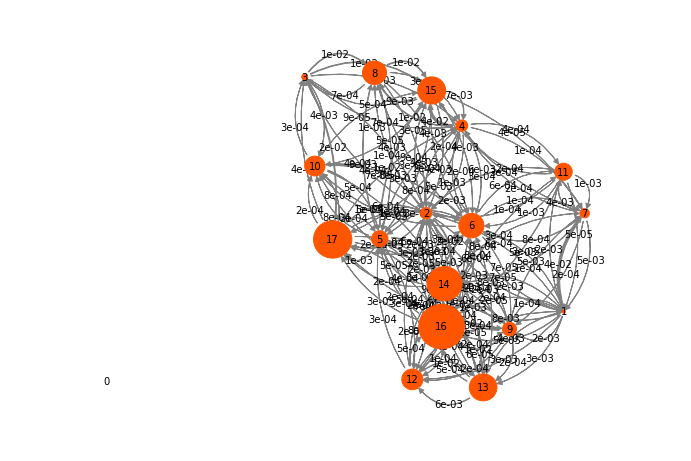

In [8]:
plt.figure()
pyemma.plots.plot_markov_model(hmm_18.P)
plt.savefig('hmm18/dih_100_hmm18.png', dpi=300)
plt.show()

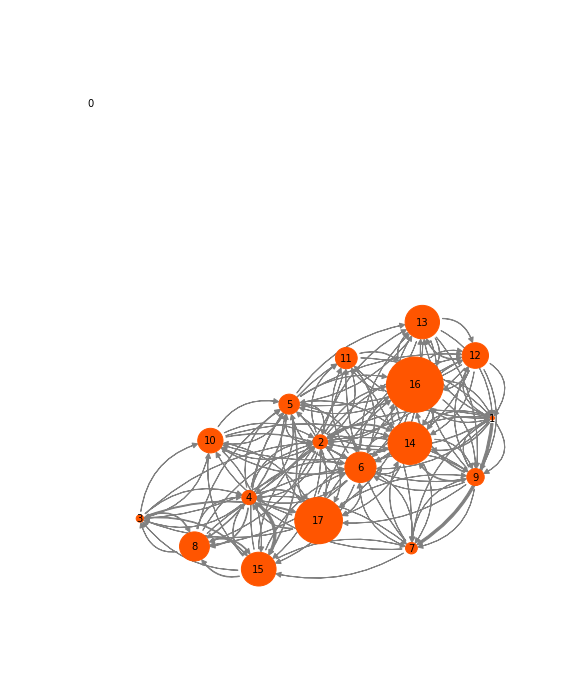

In [9]:
plt.figure()
pyemma.plots.plot_markov_model(hmm_18.P, arrow_labels=None)
plt.savefig('hmm18/dih_100_hmm18_nolabels.png', dpi=300)
plt.show()

In [29]:
hmm_18.metastable_sets

[array([20, 32, 78]),
 array([48, 76]),
 array([35, 47, 67, 84]),
 array([18, 27]),
 array([13, 21, 73, 98]),
 array([58, 69, 72]),
 array([57, 65, 96]),
 array([ 1, 43]),
 array([ 7, 16, 33, 37, 42, 60, 75, 82, 88]),
 array([ 6, 15, 59, 86]),
 array([ 5, 17, 40, 70, 83, 97]),
 array([10, 12, 24, 56, 90]),
 array([ 0,  9, 39, 71, 77, 91]),
 array([14, 22, 31, 92, 99]),
 array([ 8, 11, 19, 23, 29, 30, 36, 38, 45, 49, 63, 81]),
 array([ 3, 25, 41, 44, 62, 66, 68, 74, 85, 93, 95]),
 array([ 4, 26, 50, 51, 54, 55, 61, 79, 80, 87, 89, 94]),
 array([ 2, 28, 34, 46, 52, 53, 64])]

In [26]:
hmm_18.pi

array([ 0.        ,  0.00111025,  0.01406994,  0.00375863,  0.01436465,
        0.02836854,  0.06574408,  0.00937546,  0.06023741,  0.02048558,
        0.04303233,  0.03204755,  0.04668012,  0.07973565,  0.12853892,
        0.08116307,  0.21775369,  0.15353414])

In [27]:
hmm_18.lifetimes

array([  2154.31480201,   1345.19546192,   2602.20556379,   2105.19737413,
         1503.02952132,   2830.69826506,   4377.24401749,   6483.83136424,
         4111.93317916,   3675.96595685,   9409.03186412,  12457.09094292,
         7838.99267465,  12045.98298837,   5342.65635123,   4033.654384  ,
         9179.37940845,  35943.0849267 ])

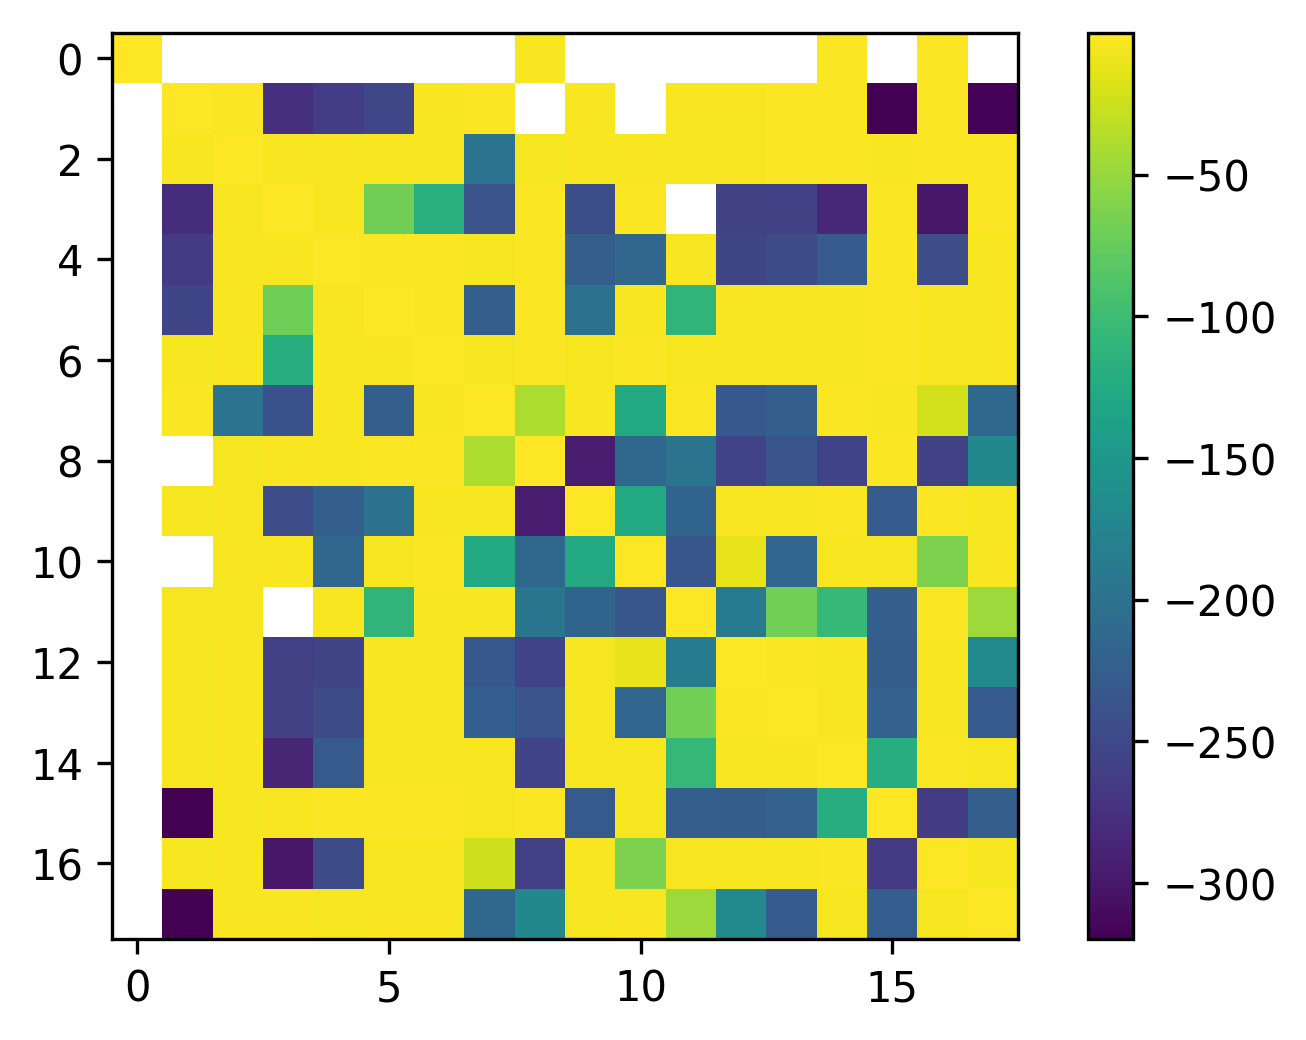

In [34]:
plt.figure(dpi=300)
plt.imshow(np.log10(hmm_18.P))
plt.colorbar()

In [36]:
# ok back to looking at CK-test - let's look at hmm 6

In [5]:
hmm_6 = pyemma.msm.estimate_hidden_markov_model(dtrajs, 6, 100, connectivity='largest')

In [40]:
# old data - hmm6 metastable sets

In [45]:
#metastable_sets = [array([ 5, 17, 32, 40, 57, 65, 69, 71, 82, 83, 95, 96]),
# array([ 1,  4, 10, 12, 24, 43, 48, 56, 75, 89]),
# array([ 0,  9, 14, 22, 31, 39, 67, 70, 76, 90, 91, 98]),
# array([ 6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50, 51,
#        54, 55, 59, 61, 63, 77, 78, 79, 80, 85, 86, 88, 93]),
# array([ 2, 27, 28, 34, 46, 47, 52, 53, 64]),
# array([ 3,  7, 13, 16, 18, 21, 25, 33, 37, 41, 42, 44, 58, 60, 62, 66, 68,
#        72, 73, 74, 81, 84, 87, 92, 94, 97])]

In [42]:
# hmm7 metastable sets

In [46]:
#metastable_sets = [np.array([ 1, 43, 48, 67, 75]),
# np.array([ 4, 10, 12, 24, 56, 89]),
# np.array([ 5, 17, 32, 40, 57, 65, 69, 71, 82, 83, 95, 96]),
# np.array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
# np.array([ 6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50, 51,
#        54, 55, 59, 61, 63, 77, 78, 79, 80, 85, 86, 88, 93]),
# np.array([ 2, 27, 28, 34, 46, 47, 52, 53, 64]),
# np.array([ 3,  7, 13, 16, 18, 21, 25, 33, 37, 41, 42, 44, 58, 60, 62, 66, 68,
#        72, 73, 74, 81, 84, 87, 92, 94, 97])]

In [47]:
# ok so the 'new hmm6' has all 100 states in the observable states - including 69 - let's do all outputs

In [49]:
#plt.figure()
#pyemma.plots.plot_markov_model(hmm.P)
#plt.savefig('hmm6/dih_100_hmm6.png', dpi=300)
#plt.show()

#hmm.metastable_sets

#hmm.pi

#hmm.lifetimes

#for i in range(len(hmm.observation_probabilities)):
#    plt.figure(dpi=300)
#    plt.scatter(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
#    plt.plot(range(len(hmm.observation_probabilities[i])), hmm.observation_probabilities[i])
#    plt.savefig('hmm6/observation_probabilities/%s.png' % i)
#    plt.close()

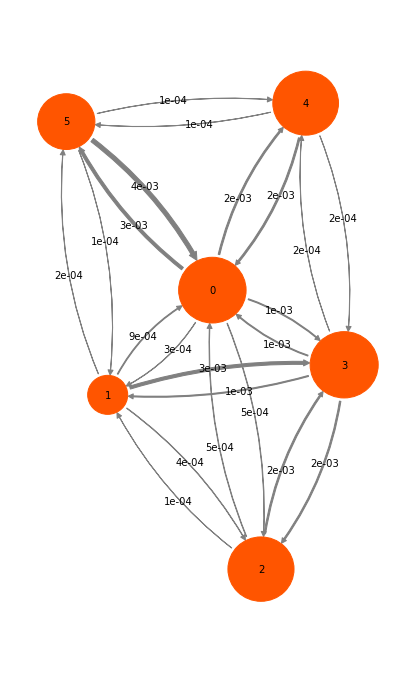

In [51]:
plt.figure()
pyemma.plots.plot_markov_model(hmm_6.P)
plt.savefig('hmm6_new/dih_100_hmm6.png', dpi=300)
plt.show()

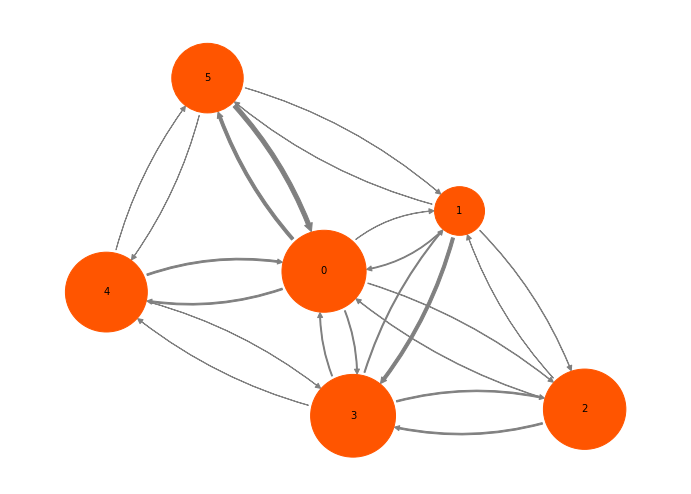

In [105]:
plt.figure()
pyemma.plots.plot_markov_model(hmm_6.P, arrow_labels=None)
plt.savefig('hmm6_new/dih_100_hmm6_nolabels.png', dpi=300)
plt.show()

In [52]:
hmm_6.metastable_sets

[array([ 5, 17, 32, 40, 57, 65, 70, 72, 83, 84, 96, 97]),
 array([ 1,  4, 10, 12, 24, 43, 48, 56, 76, 90]),
 array([ 0,  9, 14, 22, 31, 39, 67, 71, 77, 91, 92, 99]),
 array([ 6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50, 51,
        54, 55, 59, 61, 63, 69, 78, 79, 80, 81, 86, 87, 89, 94]),
 array([ 2, 27, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 33, 37, 41, 42, 44, 58, 60, 62, 66, 68,
        73, 74, 75, 82, 85, 88, 93, 95, 98])]

In [54]:
hmm_6.pi

array([ 0.20005155,  0.07045811,  0.19207372,  0.20371734,  0.18958825,
        0.14411103])

In [55]:
hmm_6.lifetimes

array([ 15456.46900069,  21673.35109367,  44605.03702807,  26879.43912015,
        49045.08445439,  22283.50874878])

In [56]:
for i in range(len(hmm_6.observation_probabilities)):
    plt.figure(dpi=300)
    plt.scatter(range(len(hmm_6.observation_probabilities[i])), hmm_6.observation_probabilities[i])
    plt.plot(range(len(hmm_6.observation_probabilities[i])), hmm_6.observation_probabilities[i])
    plt.savefig('hmm6_new/observation_probabilities/%s.png' % i)
    plt.close()

In [65]:
for i in range(len(hmm_6.metastable_memberships)):
    plt.figure(dpi=300)
    plt.scatter(range(len(hmm_6.metastable_memberships[i])), hmm_6.metastable_memberships[i])
    plt.plot(range(len(hmm_6.metastable_memberships[i])), hmm_6.metastable_memberships[i])
    plt.savefig('hmm6_new/metastable_memberships/%s.png' % i)
    plt.close()

In [66]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

In [67]:
hmm_6_from_msm = pyemma_msm.hmm(6)

In [70]:
len(hmm_6_from_msm.observable_set)

99

In [75]:
# ok so we got a difference between an HMM estimated straight from dtrajs and from an MSM - decide which one to use

In [76]:
# code for hal

In [ ]:
#for i in range(len(hmm_18.observation_probabilities)):
#    plt.figure(dpi=300)
#    plt.scatter(range(len(hmm_18.observation_probabilities[i])), hmm_18.observation_probabilities[i])
#    plt.plot(range(len(hmm_18.observation_probabilities[i])), hmm_18.observation_probabilities[i])
#    plt.savefig('observation_probabilities/%s.png' % i)
#    plt.close()

#for i in range(len(hmm_18.metastable_memberships)):
#    plt.figure(dpi=300)
#    plt.scatter(range(len(hmm_18.metastable_memberships[i])), hmm_18.metastable_memberships[i])
#    plt.plot(range(len(hmm_18.metastable_memberships[i])), hmm_18.metastable_memberships[i])
#    plt.savefig('metastable_memberships/%s.png' % i)
#    plt.close()

In [77]:
# hmm_18 results in hmm_18 (copied from hal)

In [78]:
hmm_18_metastable_sets = np.load('hmm_18/hmm_18_metastable_sets.npy')

In [81]:
hmm_18_metastable_sets

array([array([48, 76]), array([35, 47, 67, 84]), array([18, 27]),
       array([13, 21, 73, 98]), array([58, 69, 72]), array([57, 65, 96]),
       array([ 1, 43]), array([ 7, 16, 32, 33, 37, 42, 60, 75, 82, 88]),
       array([ 6, 15, 20, 59, 86]), array([ 5, 17, 40, 70, 83, 97]),
       array([10, 12, 24, 56, 90]), array([ 0,  9, 39, 71, 77, 91]),
       array([14, 22, 31, 92, 99]),
       array([ 8, 11, 19, 23, 29, 30, 36, 38, 45, 49, 63, 78, 81]),
       array([ 3, 25, 41, 44, 62, 66, 68, 74, 85, 93, 95]),
       array([ 4, 26, 50, 51, 54, 55, 61, 79, 80, 87, 89, 94]),
       array([ 2, 28, 34, 46, 52, 53, 64])], dtype=object)

In [82]:
total_len = 0

for x in hmm_18_metastable_sets:
    total_len += len(x)

In [83]:
total_len

100

In [100]:
hmm_18_pi = np.load('hmm_18/hmm_18_pi.npy')

In [101]:
hmm_18_pi

array([ 0.00111025,  0.01406994,  0.00375863,  0.01436465,  0.02836854,
        0.06574408,  0.00937546,  0.06023741,  0.02048558,  0.04303233,
        0.03204755,  0.04668012,  0.07973565,  0.12853892,  0.08116307,
        0.21775369,  0.15353414])

In [102]:
hmm_18_lifetimes = np.load('hmm_18/hmm_18_lifetimes.npy')

In [103]:
hmm_18_lifetimes

array([  1345.19546192,   2602.20556379,   2105.19737413,   1503.02952132,
         2830.69826506,   4377.24401749,   6483.83136424,   4111.93317916,
         3675.96595685,   9409.03186412,  12457.09094292,   7838.99267465,
        12045.98298837,   5342.65635123,   4033.654384  ,   9179.37940845,
        35943.0849267 ])

In [84]:
# now hmm_25 (also copied from hal)

In [ ]:
#for i in range(len(hmm_25.observation_probabilities)):
#    plt.figure(dpi=300)
#    plt.scatter(range(len(hmm_25.observation_probabilities[i])), hmm_25.observation_probabilities[i])
#    plt.plot(range(len(hmm_25.observation_probabilities[i])), hmm_25.observation_probabilities[i])
#    plt.savefig('observation_probabilities/%s.png' % i)
#    plt.close()

#for i in range(len(hmm_25.metastable_memberships)):
#    plt.figure(dpi=300)
#    plt.scatter(range(len(hmm_25.metastable_memberships[i])), hmm_25.metastable_memberships[i])
#    plt.plot(range(len(hmm_25.metastable_memberships[i])), hmm_25.metastable_memberships[i])
#    plt.savefig('metastable_memberships/%s.png' % i)
#    plt.close()

In [92]:
## let's look at CK test

In [91]:
len(hmm_6.observable_set)

100

In [93]:
hmm_25_metastable_sets = np.load('hmm_25/hmm_25_metastable_sets.npy')

In [94]:
hmm_25_metastable_sets

array([array([48, 76]), array([47, 97]), array([18, 27]), array([35, 84]),
       array([67]), array([23, 29, 45]), array([65, 72, 83]),
       array([ 5, 17, 32, 40, 70]), array([21, 96]), array([58]),
       array([ 4, 69]), array([ 1, 43]), array([57]),
       array([41, 44, 66, 74, 85, 93]), array([33, 42, 60, 75, 88]),
       array([ 6, 15, 59, 86]),
       array([ 8, 11, 19, 30, 36, 38, 49, 63, 78, 81]),
       array([10, 12, 24, 56, 90]), array([ 0,  9, 39, 71, 77, 91]),
       array([14, 22, 31, 92, 99]), array([20, 28]),
       array([ 3,  7, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98]),
       array([26, 50, 51, 54, 55, 61, 79, 80, 87, 89, 94]),
       array([ 2, 34, 46, 52, 53, 64])], dtype=object)

In [96]:
hmm_25_pi = np.load('hmm_25/hmm_25_pi.npy')

In [97]:
hmm_25_pi

array([ 0.00105077,  0.0051363 ,  0.0020471 ,  0.00220495,  0.01169832,
        0.05048181,  0.01927978,  0.00757199,  0.04101867,  0.02262377,
        0.09255956,  0.01049348,  0.0392371 ,  0.01223937,  0.01574518,
        0.01639077,  0.07889671,  0.06907401,  0.04380633,  0.07716905,
        0.06001096,  0.04814268,  0.19208593,  0.08103538])

In [98]:
hmm_25_lifetimes = np.load('hmm_25/hmm_25_lifetimes.npy')

In [99]:
hmm_25_lifetimes

array([  1380.13832636,   2674.68490066,   2059.91574371,   1826.74701501,
         2984.78247879,   3313.2358321 ,   2515.04106   ,   4710.23310736,
         4438.06311482,   5087.0777449 ,   9310.7626506 ,   6465.34521139,
        10672.14665921,   3757.81604708,   3667.26476322,   3640.14384623,
         3357.25228178,  12286.40946218,   7852.6159643 ,  11924.16283862,
         5376.34882668,   4299.96079238,   7135.78897358,   6183.45692837])

In [1]:
# ok CK test

In [7]:
# ready

In [13]:
cktest = hmm_6.cktest(mlags=2)

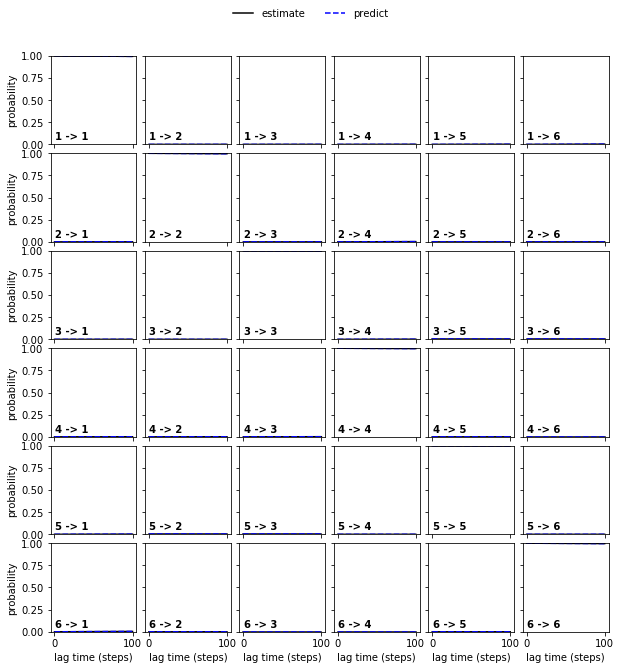

In [14]:
pyemma.plots.plot_cktest(cktest)
plt.show()

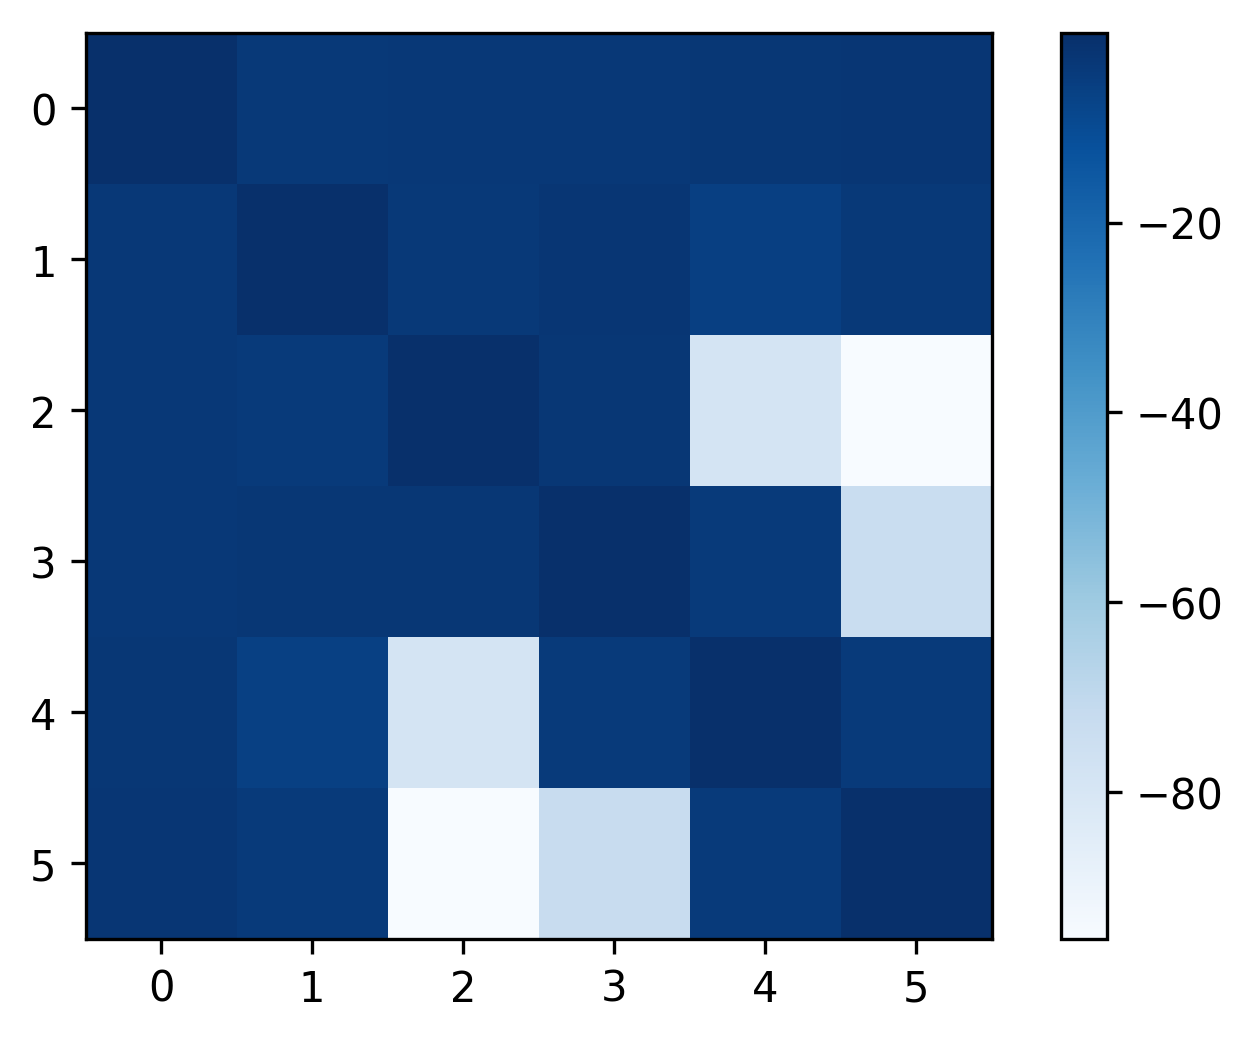

In [25]:
plt.figure(dpi=300)
plt.imshow(np.log10(hmm_6.P), cmap='Blues')
plt.colorbar()
plt.show()

In [27]:
hmm_6.timescales()

array([ 76227.20272019,  34311.0468245 ,  27985.16237674,  16022.51614371,
        10465.77297998])

In [28]:
hmm_6.P

array([[  9.93551101e-01,   3.01547830e-04,   4.66843082e-04,
          9.75366494e-04,   1.66479660e-03,   3.04034499e-03],
       [  8.56184055e-04,   9.95396667e-01,   3.92040185e-04,
          3.13308455e-03,   1.59505687e-06,   2.20429341e-04],
       [  4.86233530e-04,   1.43811506e-04,   9.97760612e-01,
          1.60934306e-03,   9.72150400e-80,   3.52463108e-96],
       [  9.57815286e-04,   1.08361528e-03,   1.51735984e-03,
          9.96286596e-01,   1.54613524e-04,   6.62531018e-74],
       [  1.75667605e-03,   5.92783008e-07,   9.84895116e-80,
          1.66136114e-04,   9.97963137e-01,   1.13458143e-04],
       [  4.22053574e-03,   1.07771317e-04,   4.69769057e-96,
          9.36563009e-74,   1.49262216e-04,   9.95522431e-01]])

In [29]:
hmm_6.observe_nonempty

True

In [37]:
hmm_6.mfpt(1,2)

196255.00686022127

In [38]:
msm = pyemma.msm.estimate_markov_model(dtrajs, 100)

In [41]:
cktest = msm.cktest(nsets=6)

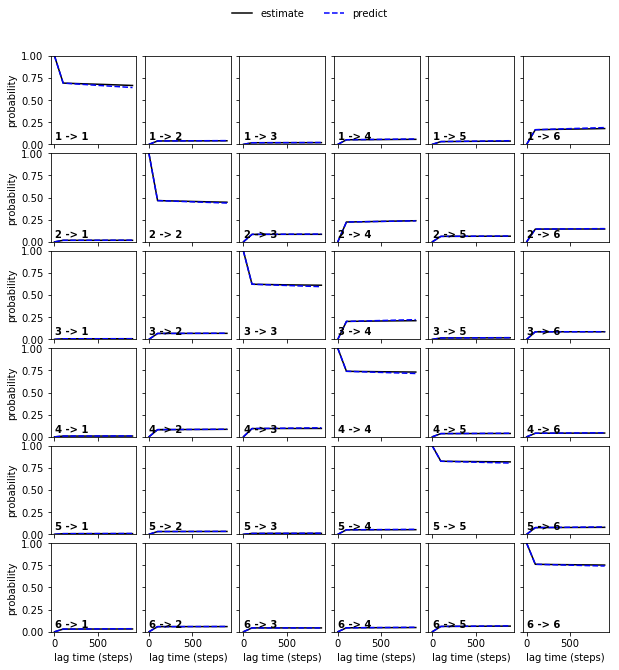

In [42]:
pyemma.plots.plot_cktest(cktest)
plt.show()

In [47]:
cktest.estimates[1]

array([[ 0.69208032,  0.03898689,  0.01887845,  0.0524703 ,  0.03188651,
         0.16569753],
       [ 0.01778922,  0.46636432,  0.08501531,  0.22420334,  0.0622772 ,
         0.14435061],
       [ 0.0067702 ,  0.06681814,  0.62217354,  0.20259801,  0.01582926,
         0.08581085],
       [ 0.00866341,  0.08112958,  0.09327713,  0.73990591,  0.03650931,
         0.04051465],
       [ 0.00733497,  0.03139656,  0.01015351,  0.05086504,  0.82461501,
         0.07563491],
       [ 0.03045491,  0.05814623,  0.04397927,  0.04510014,  0.06043275,
         0.76188671]])

In [50]:
cktest = msm.cktest(nsets=6, mlags=2)

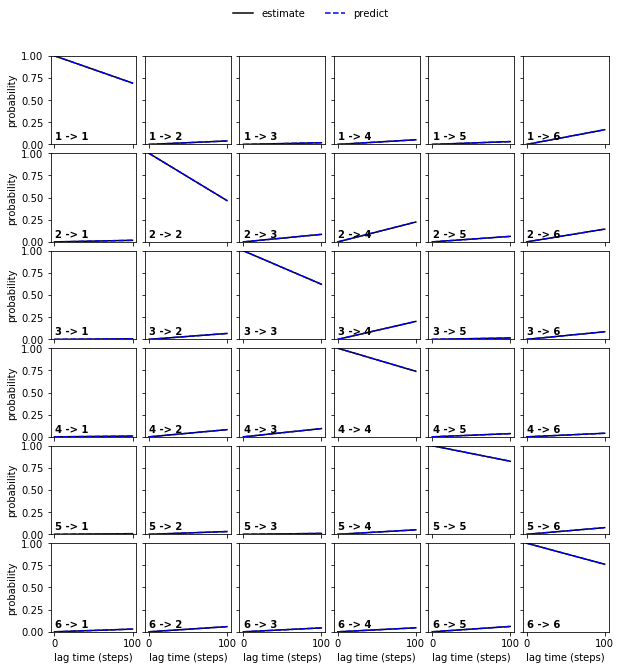

In [51]:
pyemma.plots.plot_cktest(cktest)
plt.show()

In [59]:
cktest3 = hmm_6.cktest(mlags=3)

In [66]:
cktest3.estimates

array([[[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.00000000e+00]],

       [[  9.93551101e-01,   3.01547830e-04,   4.66843081e-04,
           9.75366494e-04,   1.66479660e-03,   3.04034499e-03],
        [  8.56184055e-04,   9.95396667e-01,   3.92040185e-04,
           3.13308455e-03,   1.59505646e-06,  

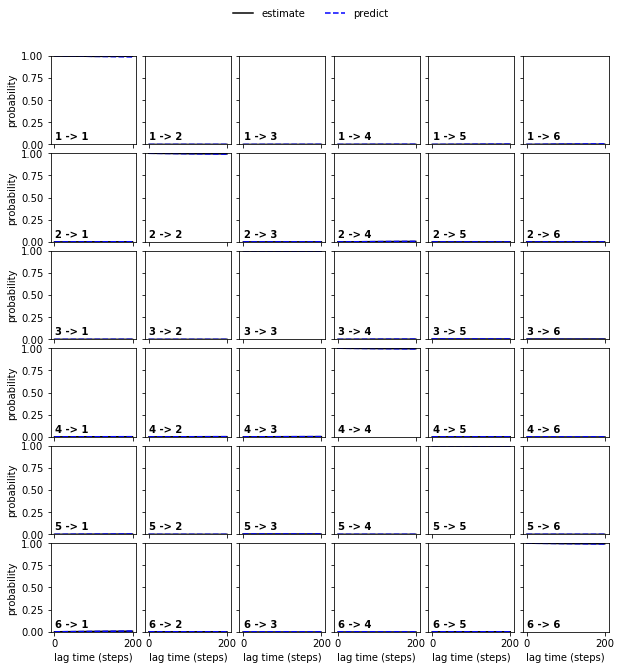

In [67]:
pyemma.plots.plot_cktest(cktest3)
plt.show()

In [70]:
#cktest_none = hmm_6.cktest(mlags=None, n_jobs=4)

In [54]:
hmm_6.propagate([1,0,0,0,0,0],20)

NameError: name 'hmm_6' is not defined

In [101]:
msm.pcca(6)

In [105]:
msm.stationary_distribution

array([  3.06673420e-03,   1.00650954e-02,   3.91417984e-02,
         4.32281711e-03,   1.69725965e-02,   3.65534808e-03,
         2.26733345e-02,   9.49916167e-03,   3.17722329e-03,
         8.07781839e-03,   1.03335340e-02,   1.55798363e-02,
         7.78106575e-03,   1.44095842e-02,   1.76120187e-02,
         7.87482746e-03,   7.80902602e-03,   1.63802259e-02,
         3.81685487e-03,   3.87466711e-03,   2.01389497e-04,
         1.57507068e-02,   2.30180181e-02,   8.36395610e-03,
         9.30957856e-03,   1.45333856e-02,   4.26683737e-03,
         1.12931567e-03,   4.99409319e-02,   1.08457419e-02,
         1.40110969e-02,   8.55748782e-04,   9.46822842e-05,
         2.14299441e-03,   8.50759304e-03,   6.23019826e-04,
         1.99050180e-02,   4.66568213e-03,   1.78935951e-02,
         1.49955460e-02,   3.27260691e-03,   3.66042476e-03,
         6.07337090e-03,   1.09805233e-02,   5.84711182e-03,
         8.97496174e-03,   2.85623386e-02,   1.79792141e-03,
         1.25347655e-03,

In [2]:
msm = pyemma.msm.estimate_markov_model(dtrajs, 100)

NameError: name 'pyemma' is not defined

In [6]:
msm.pcca(6)

In [7]:
msm.metastable_sets

[array([ 5, 17, 40, 69, 82]),
 array([ 1, 10, 12, 24, 43, 48, 56, 75, 89]),
 array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
 array([ 4,  6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50,
        51, 54, 55, 59, 61, 63, 67, 77, 78, 79, 80, 85, 86, 88, 93, 96]),
 array([ 2, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 27, 32, 33, 37, 41, 42, 44, 57, 58, 60,
        62, 65, 66, 68, 71, 72, 73, 74, 81, 83, 84, 87, 92, 94, 95, 97])]

In [11]:
cktest = msm.cktest(nsets=6, mlags=None)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


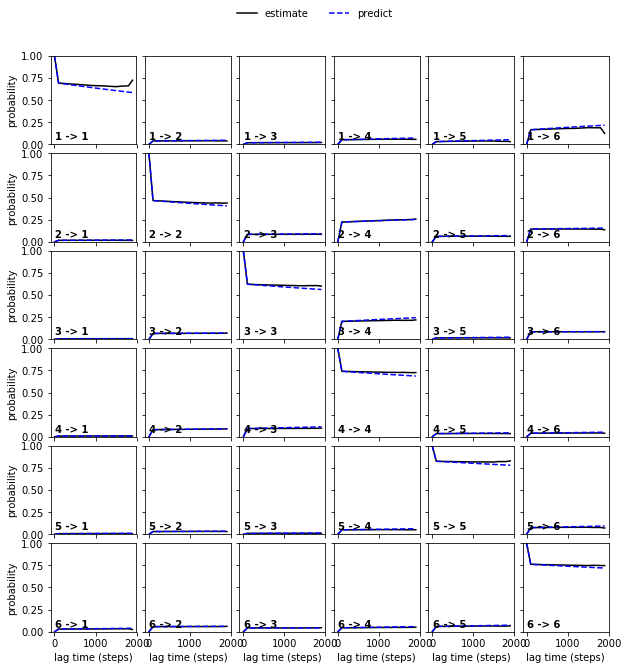

In [13]:
pyemma.plots.plot_cktest(cktest)
plt.show()

In [15]:
p0 = 99 * [0]

In [30]:
p0[5] = 0.2
p0[17] = 0.2
p0[40] = 0.2
p0[69] = 0.2
p0[82] = 0.2

In [52]:
p = msm.propagate(p0, 10)

In [53]:
p[5] + p[17] + p[40] + p[69] + p[82]

0.43819952476323371

In [5]:
######

In [6]:
msm = pyemma.msm.estimate_markov_model(dtrajs, 100)

In [9]:
msm.mfpt(21,96)

251482.43389529095

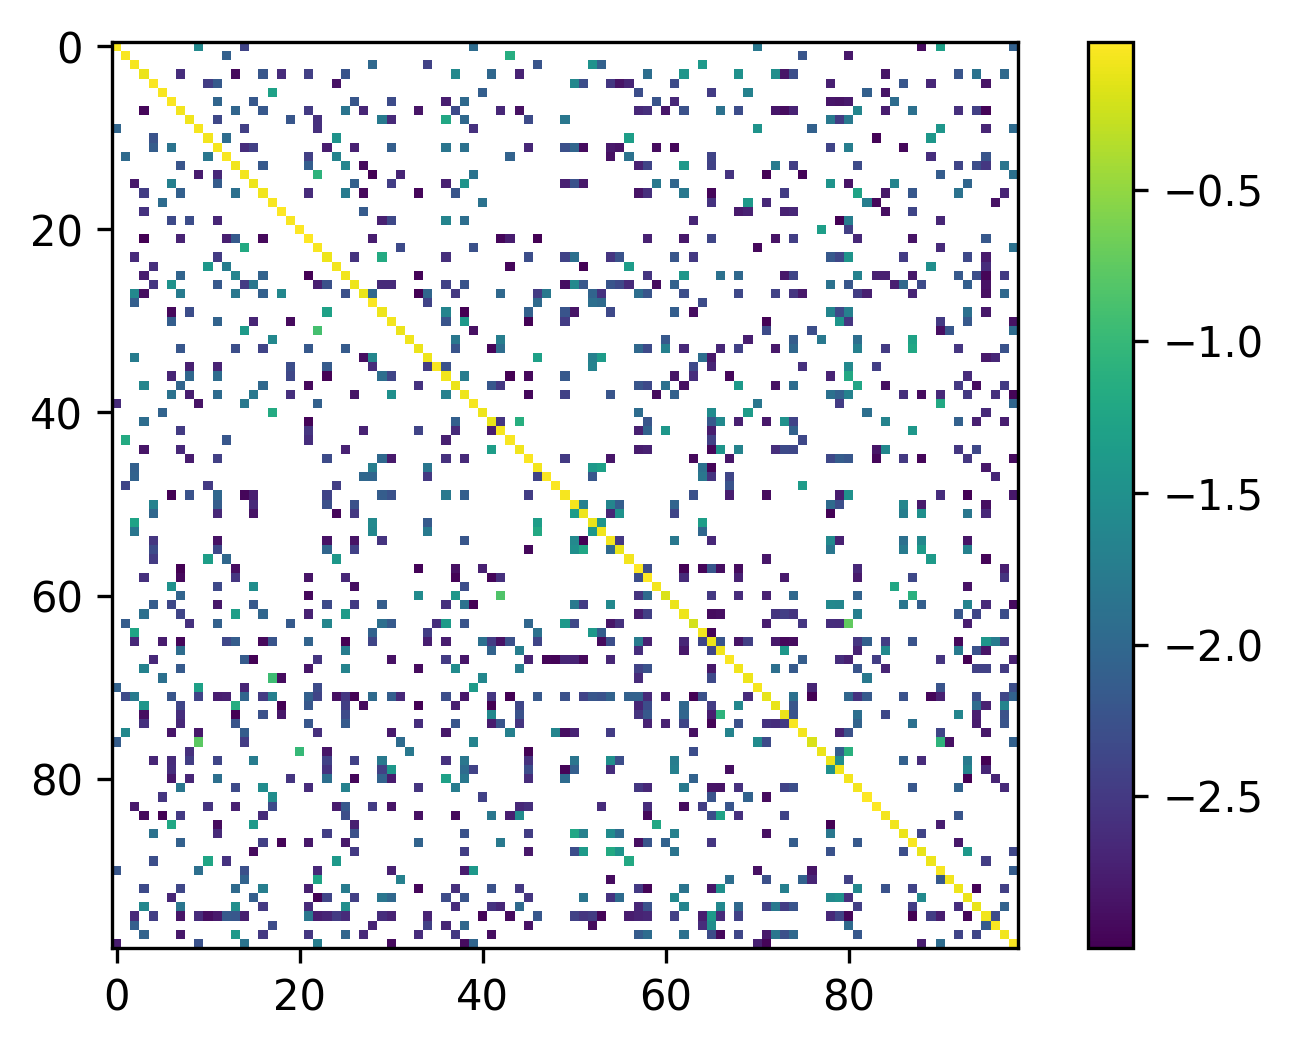

In [40]:
cutoff = -3
matrix_plot = np.zeros((99,99))
for i in range(99):
    for j in range(99):
        if np.log10(msm.P)[i,j] > cutoff:
            matrix_plot[i,j] = np.log10(msm.P)[i,j]
        else:
            matrix_plot[i,j] = np.nan

plt.figure(dpi=300)
plt.imshow(matrix_plot)
plt.colorbar()
plt.show()

In [48]:
matrix_plot[21][95]

-2.181612518219104

In [49]:
matrix_plot[95][21]

-1.8185800104946543

In [50]:
matrix_plot[21]

array([        nan,         nan,         nan, -2.99723234,         nan,
               nan,         nan, -2.69955153,         nan,         nan,
               nan,         nan, -2.7356567 , -2.15062355,         nan,
               nan, -2.9255613 ,         nan,         nan,         nan,
               nan, -0.02281782,         nan,         nan,         nan,
               nan,         nan,         nan, -2.75695575,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, -2.9522977 , -2.76252323,         nan,
               nan, -2.99777104,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, -2.72395785,         nan,
               nan,         nan, -2.81205058,         nan,         nan,
       -2.37248588,         nan,         nan,         nan,      

In [51]:
matrix_plot[95]

array([        nan,         nan, -2.6302025 ,         nan, -2.44920417,
               nan,         nan, -2.82717642,         nan, -2.61951762,
       -2.88834569, -2.7878064 , -2.15837479, -2.18739196, -2.75223585,
               nan,         nan,         nan,         nan,         nan,
               nan, -1.81858001, -2.74995086, -2.69261076, -2.4806113 ,
       -2.63223928,         nan,         nan,         nan, -2.60394006,
       -2.69690018,         nan,         nan,         nan, -2.69759816,
               nan,         nan,         nan,         nan,         nan,
       -2.96341109,         nan,         nan, -2.91043899,         nan,
               nan, -2.18374685,         nan,         nan,         nan,
       -2.42368609, -2.54102417, -2.47481947, -2.95959047,         nan,
               nan, -2.77335119, -2.7047781 , -2.67298098,         nan,
               nan, -2.42052888,         nan,         nan, -2.75470543,
       -1.3913249 , -2.63644248,         nan, -2.42446156,      

In [53]:
msm.stationary_distribution[21]

0.015750706750405262

In [54]:
msm.stationary_distribution[95]

0.0068275916419295495

In [57]:
msm.pi[21] * msm.P[21,95]

0.0001036782188493165

In [58]:
msm.pi[95] * msm.P[95,21]

0.00010367821884931785

In [69]:
fluxes = np.zeros((99,99))

for i in range(99):
    for j in range(99):
        fluxes[i,j] = msm.pi[i] * msm.P[i,j]

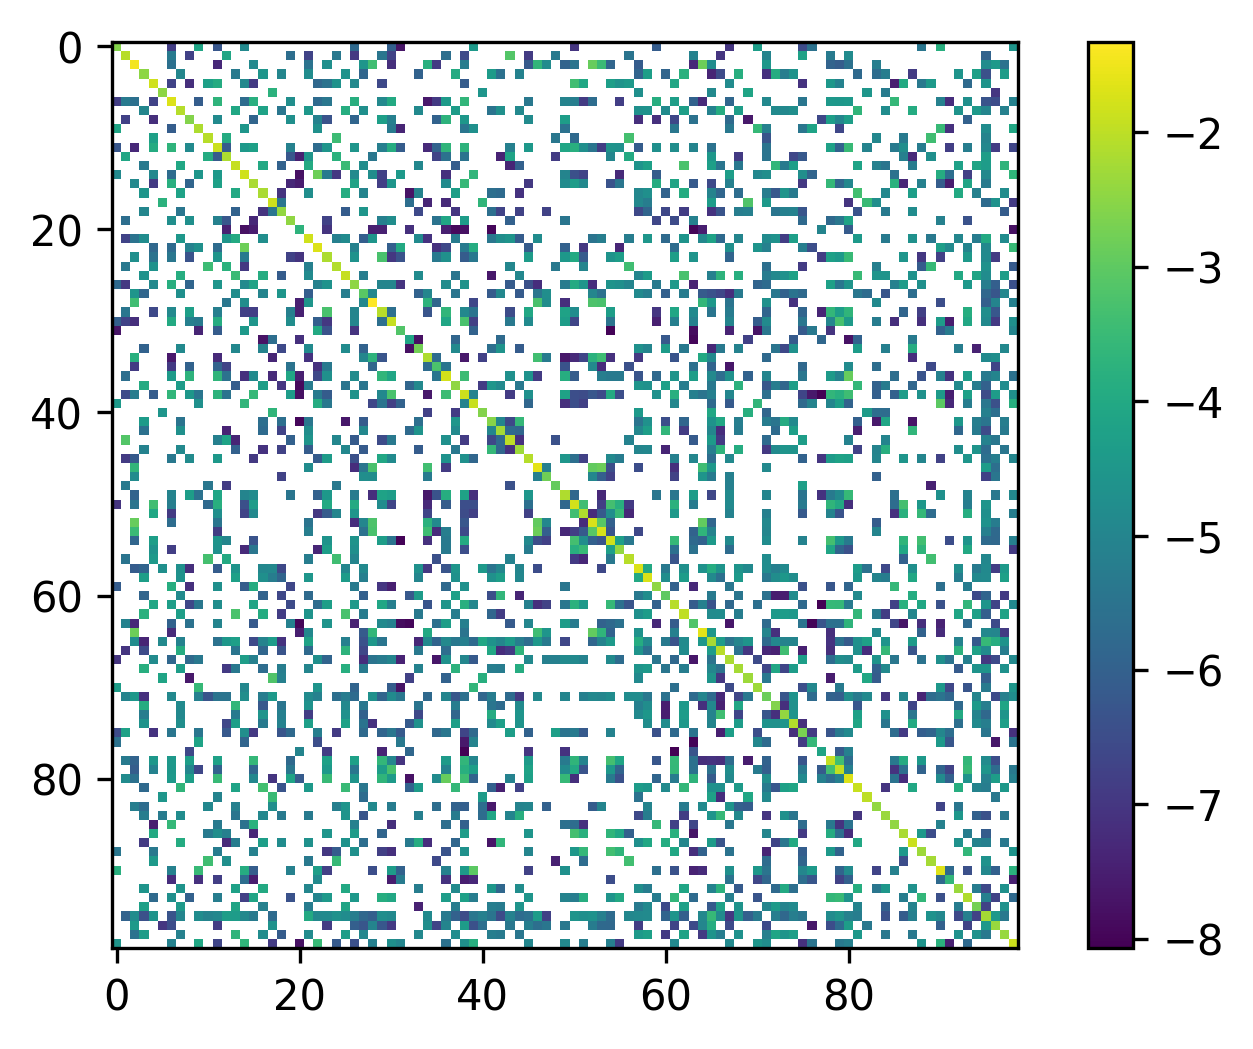

In [70]:
plt.figure(dpi=300)
plt.imshow(np.log10(fluxes))
plt.colorbar()
plt.show()

In [75]:
import seaborn as sns
sns.set_style('ticks')

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


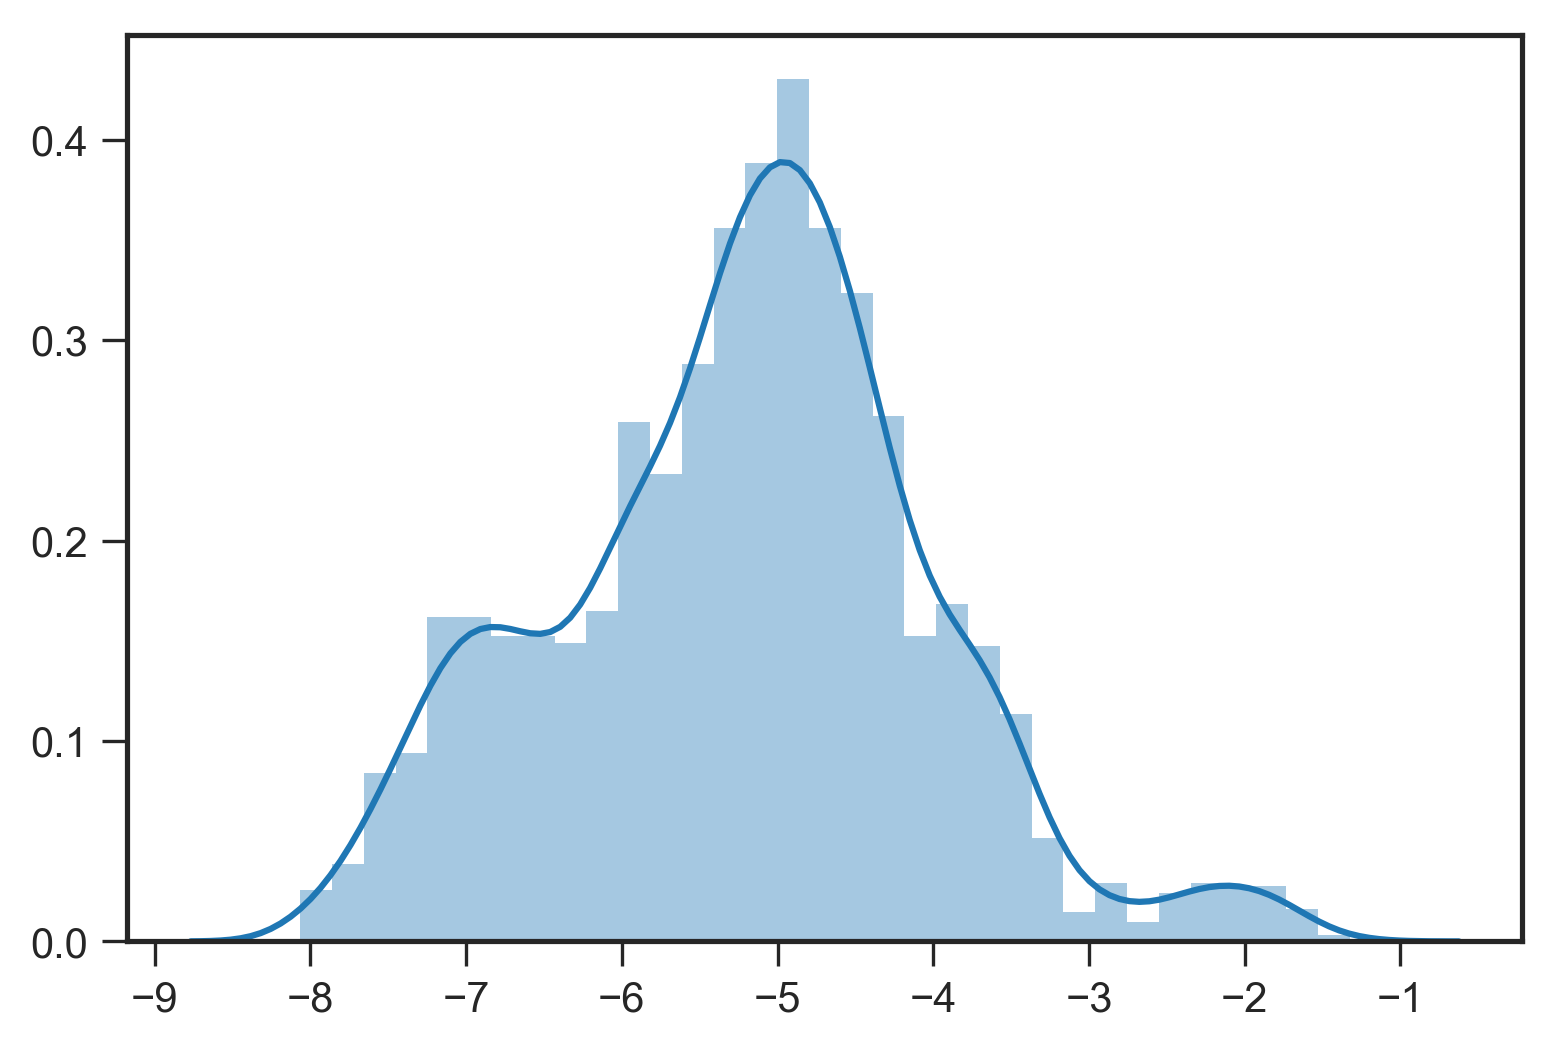

In [82]:
plt.figure(dpi=300)
sns.distplot(np.log10([x for x in np.concatenate(fluxes) if x != 0]))

In [86]:
np.log10(fluxes[21,95])

-3.9843124724163621

In [88]:
# ok so let's see if we have any trajectories where we transitioned between 21 and 96

In [91]:
indexes = []

for index in range(len(dtrajs)):
    if 21 in dtrajs[index] and 96 in dtrajs[index]:
        indexes.append(index)

In [92]:
indexes

[545, 590, 2045, 2472, 3278, 3678, 4128]

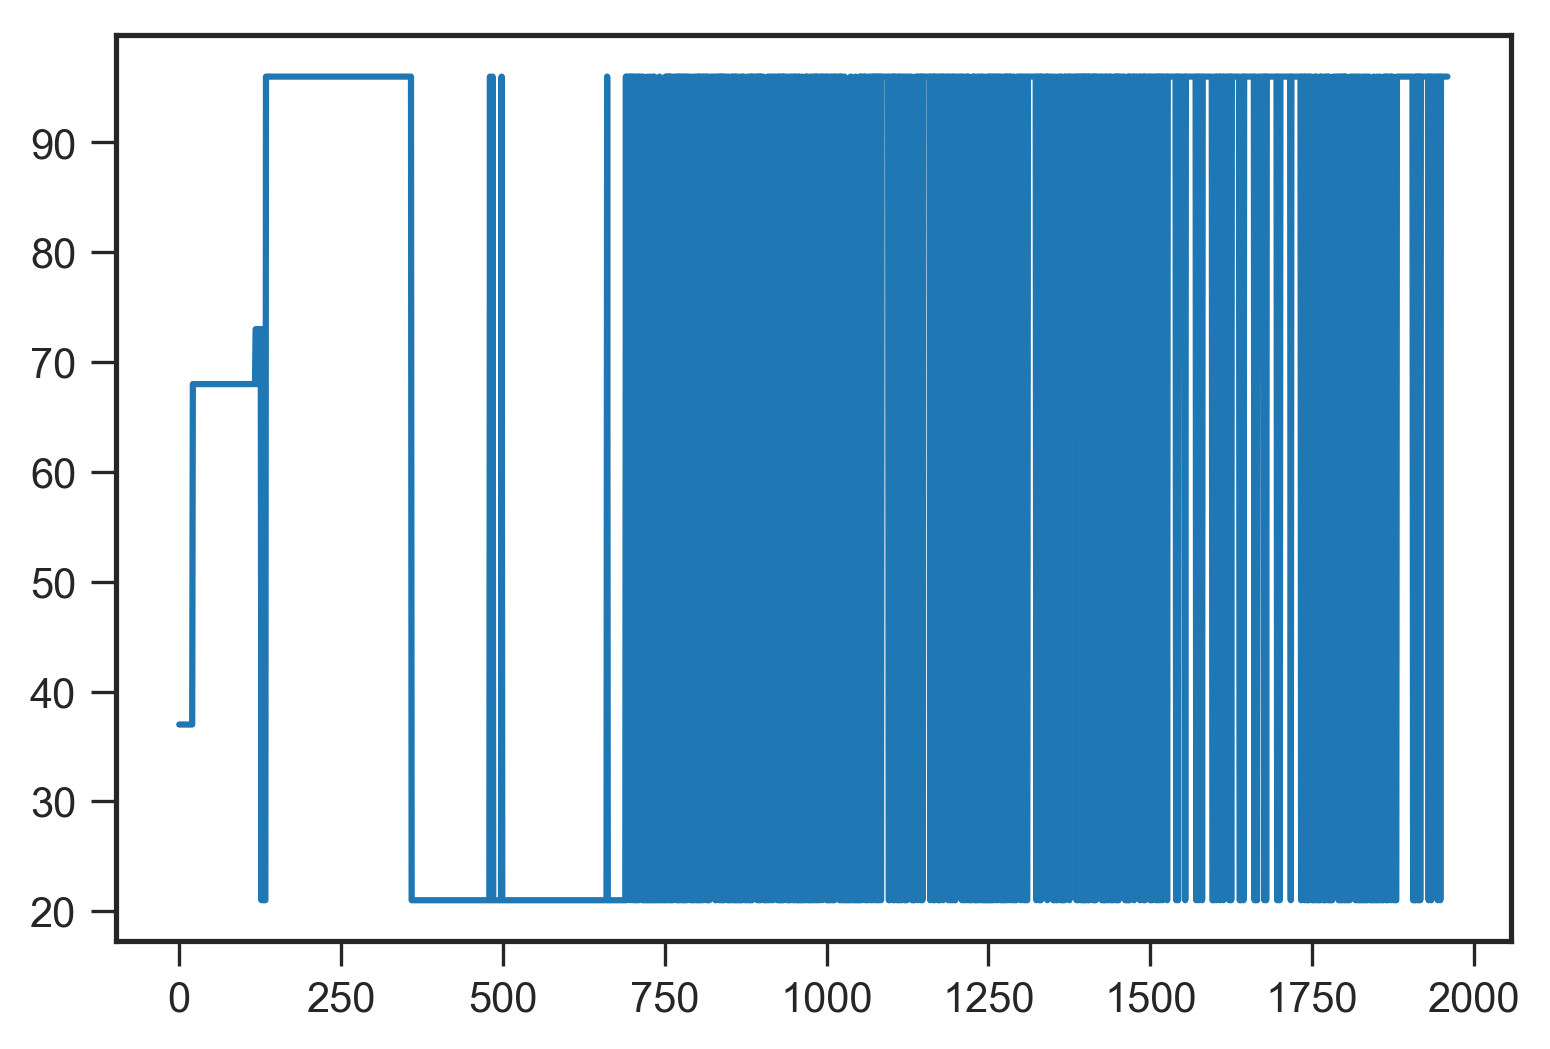

In [124]:
plt.figure(dpi=300)
plt.plot(dtrajs[2472])
plt.show()

In [111]:
dtrajs[2472][750:800]

array([21, 96, 21, 96, 96, 21, 96, 21, 96, 21, 96, 21, 21, 21, 96, 96, 96,
       96, 21, 21, 96, 21, 96, 21, 96, 96, 21, 21, 96, 21, 96, 21, 21, 96,
       21, 96, 96, 96, 96, 96, 21, 21, 21, 96, 21, 21, 21, 96, 96, 21], dtype=int32)

In [112]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm'

In [115]:
kmeans_glob = np.load('../kmeans_glob.npy')

In [116]:
dih_glob = np.load('../dih_glob.npy')

In [120]:
len(dtrajs[2472])

1960

In [119]:
kmeans_glob[2472]

'trajs_95/3524.npy'

In [121]:
dih_glob[3524]

'data_cut_start_noH/11707/run150-clone22.h5'

In [127]:
msm.timescales()

array([ 32583.80527841,  21773.63468935,  11305.82384942,   9416.20405463,
         8875.80376618,   4794.89275649,   3619.67572751,   3553.31294233,
         2635.48338331,   2428.97570599,   2347.13282553,   2185.04801567,
         2165.5182508 ,   2072.92999277,   1976.67257972,   1932.8542912 ,
         1853.45219825,   1557.49917899,   1452.32278577,   1438.19063726,
         1425.48170896,   1399.83576318,   1386.88397465,   1303.38507354,
         1157.4225911 ,   1124.69730257,   1115.72984291,   1075.79021059,
         1061.81489527,   1011.437058  ,    964.64938974,    949.75429227,
          914.6738818 ,    907.5821787 ,    843.74198783,    833.45350901,
          797.94511192,    793.82516838,    759.6667515 ,    753.41146652,
          740.2452381 ,    738.34436755,    681.0736692 ,    679.6597798 ,
          678.2148299 ,    667.47105579,    619.34434812,    616.02200779,
          596.75979628,    594.78625446,    593.89052657,    575.969642  ,
          566.83694269,  